In [6]:
#importing packages
import os
os.environ['USE_PYGEOS'] = '0'
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import fiona
from fiona import Feature, Geometry
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr
import geopandas as gpd
import rasterio as rio
from rasterio.enums import Resampling

import skgstat as skg

In [13]:
import numpy as np
from scipy.stats import skew, kurtosis

# Load image (assuming grayscale)
image = np.random.rand(100, 100)  # Example image

# Flatten array
flat_image = image.flatten()

# Calculate skewness and kurtosis
skewness = skew(flat_image)
kurtosis = kurtosis(flat_image)

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)


Skewness: -0.02534601271274889
Kurtosis: -1.2080690266063148


In [7]:
#stacked Green, Red, Red Edge, and Near Infrared band individual rasters into one multi-band raster
top_path='S:/mc5545/SA_Drone_data/'

In [8]:
raster_path1 = top_path+'burnplot18_lr/reflectance'
raster_filename1 = 'burnplot18_lr_band_stack.tif'

raster_path2 = top_path+'burn2016_lr/reflectance'
raster_filename2 = 'burn2016_lr_band_stack.tif'

raster_path3 = top_path+'burn2017&2016_lr/reflectance'
raster_filename3 = 'burn2017&2016_lr_band_stack.tif'

raster_path4 = top_path+'burn2019_lr/reflectance'
raster_filename4 = 'burn2019_lr_band_stack.tif'

raster_path5 = top_path+'burnplot17_lr/reflectance'
raster_filename5 = 'burnplot17_lr_band_stack.tif'

raster_path6 = top_path+'burn2022_lr/reflectance'
raster_filename6 = 'burn2022_lr_band_stack.tif'

# For small ROI

In [4]:
shapefiles1 = gpd.read_file(Path(top_path,'burnplot18_lr/burnplot18_lr_shape/burnplot18_lr_shp.shp'))
shapefiles2 = gpd.read_file(Path(top_path,'burn2016_lr/burn2016_lr_shape/burn2016_lr_shp.shp'))
shapefiles3 = gpd.read_file(Path(top_path,'burn2017&2016_lr/burn2017_shape/burn2017_shp.shp'))
shapefiles4 = gpd.read_file(Path(top_path,'burn2019_lr/burn2019_lr_shape/burn2019_lr_shp.shp'))
shapefiles5 = gpd.read_file(Path(top_path,'burnplot17_lr/burnplot17_lr_shape/burnplot17_lr_shp.shp'))
shapefiles6 = gpd.read_file(Path(top_path,'burn2022_lr/burn2022_lr_shape/burn2022_lr_shp.shp'))

# For whole scene

In [9]:
shapefiles1 = gpd.read_file(Path(top_path,'burnplot18_lr/burnplot18_lr_shape_all/burnplot18_lr_shp.shp'))
shapefiles2 = gpd.read_file(Path(top_path,'burn2016_lr/burn2016_lr_shape_all/burn2016_shp.shp'))
shapefiles3 = gpd.read_file(Path(top_path,'burn2017&2016_lr/burn2017_shape/burn2017_shp.shp'))
shapefiles4 = gpd.read_file(Path(top_path,'burn2019_lr/burn2019_lr_shape_all/burn2019_lr_shp.shp'))
shapefiles5 = gpd.read_file(Path(top_path,'burnplot17_lr/burnplot17_lr_shape_all/burnplot17_lr_shp.shp'))
shapefiles6 = gpd.read_file(Path(top_path,'burn2022_lr/burn2022_lr_shape_all/burn2022_lr_shp.shp'))

In [10]:
#load raster1
def fynbos_indices(raster_path, raster_filename, shapefiles):
    raster = rxr.open_rasterio(Path(raster_path, raster_filename),masked=True).squeeze()
    geometries = shapefiles.geometry.apply(mapping)
    
    
    # Create an empty list to store the clipped rasters
    clipped_rasters = []
    for i in range(len(shapefiles)):
        # Clip the raster with the current geometry
        p1 = raster.rio.clip([geometries[i]],shapefiles.crs)
        # Convert the clipped raster to a NumPy array
        p1_np = np.asarray(p1)
        # Append the clipped raster array to the list
        clipped_rasters.append(p1_np)
        
        
    # Initialize lists to store mean values for each band
    mean_values_band1 = []
    mean_values_band2 = []
    mean_values_band3 = []
    mean_values_band4 = []
    # Loop through each raster
    for raster in clipped_rasters:
        # Calculate mean for each band and append to the respective list
        mean_values_band1.append(np.nanmean(raster[0]))
        mean_values_band2.append(np.nanmean(raster[1]))
        mean_values_band3.append(np.nanmean(raster[2]))
        mean_values_band4.append(np.nanmean(raster[3]))
        
    # Now, mean_values_band1, mean_values_band2, mean_values_band3, mean_values_band4
    # contain the mean values for each band across all clipped rasters
    # Combine mean values into a single NumPy array
    mean_values = np.vstack((mean_values_band1, mean_values_band2, 
                             mean_values_band3, mean_values_band4))

    
#     Initialize lists to store variance values for each band
#     var_band1 = []
#     var_band2 = []
#     var_band3 = []
#     var_band4 = []
#     # Loop through each raster
#     for raster in clipped_rasters:
#         # Calculate variance for each band and append to the respective list
#         var_band1.append(np.nanvar(raster[0]))
#         var_band2.append(np.nanvar(raster[1]))
#         var_band3.append(np.nanvar(raster[2]))
#         var_band4.append(np.nanvar(raster[3]))
        
#     # Combine variance values into a single NumPy array
#     variance_values = np.vstack((var_band1, var_band2,var_band3, var_band4))
    

    
    # Initialize lists to store standard deviation values for each band
    std_band1 = []
    std_band2 = []
    std_band3 = []
    std_band4 = []
    # Loop through each raster
    for raster in clipped_rasters:
        # Calculate standard deviation for each band and append to the respective list
        std_band1.append(np.nanstd(raster[0]))
        std_band2.append(np.nanstd(raster[1]))
        std_band3.append(np.nanstd(raster[2]))
        std_band4.append(np.nanstd(raster[3]))     
    # Combine standard deviation values into a single NumPy array
    std_values = np.vstack((std_band1, std_band2,std_band3, std_band4))
    
    CV=(std_values/mean_values)
    
    from scipy.stats import skew, kurtosis
    # Initialize lists to store skewness values for each band
    skewness_band1 = []
    skewness_band2 = []
    skewness_band3 = []
    skewness_band4 = []
    
    # Initialize lists to store kurtosis values for each band
    kurtosis_band1 = []
    kurtosis_band2 = []
    kurtosis_band3 = []
    kurtosis_band4 = []
    
    # Loop through each raster
    for raster in clipped_rasters:
        # Calculate skewness for each band and append to the respective list
        skewness_band1.append(skew(raster[0],axis=None, nan_policy='omit'))
        skewness_band2.append(skew(raster[1],axis=None, nan_policy='omit'))
        skewness_band3.append(skew(raster[2],axis=None, nan_policy='omit'))
        skewness_band4.append(skew(raster[3],axis=None, nan_policy='omit'))

        # Calculate kurtosis for each band and append to the respective list
        kurtosis_band1.append(kurtosis(raster[0], axis=None, nan_policy='omit'))
        kurtosis_band2.append(kurtosis(raster[1], axis=None,nan_policy='omit'))
        kurtosis_band3.append(kurtosis(raster[2], axis=None,nan_policy='omit'))
        kurtosis_band4.append(kurtosis(raster[3], axis=None, nan_policy='omit'))
    
    # Combine skewness values into a single NumPy array
    skewness_values = np.vstack((skewness_band1, skewness_band2, skewness_band3, skewness_band4))
    # Combine kurtosis values into a single NumPy array
    kurtosis_values = np.vstack((kurtosis_band1, kurtosis_band2, kurtosis_band3, kurtosis_band4))

        
    # Assuming 'gdf' is your GeoDataFrame
    centroid =shapefiles.geometry.centroid

    
    #order of the bands G=0, R=1, RE=2, NIR=3 for our stack
    # Create an empty list to store the indicies values for each clipped raster (38 total)
    NDVI_values = []
    ReCI_values = []
    NDRE_values = []
    GNDVI_values =[]
    OSAVI_values= []
    GCI_values  = []
    SR_values   = []
    MSR_values  = []
    RDVI_values = []
    NDWI_values = []
    
    DVI_values   =[]
    GDVI_values  =[]
    RVI_values   =[]
    WDRVI_values =[]
    
    GSAVI_values =[]
    IPVI_values  =[]
    MSAVI2_values=[]
    NLI_values   =[]
    SAVI_values  =[]
    TDVI_values  =[]
    BAI_values   =[]
    
    AVI_values   =[]
    CVI_values   =[]
    DSWI4_values =[]
    GRNDVI_values=[]
    MCARI1_values=[]
    NGRDI_values =[]
    NIRv_values  =[]
    NormG_values =[]
    NormNIR_values=[]
    NormR_values =[]
    RGRI_values  =[]
    RI_values    =[]
    SR2_values   =[]
    VIG_values   =[]
    TVI_values   =[]
    TriVI_values =[]
    MTVI1_values =[]
    
            
    MSR_Rededge_values =[] 
    MGRVI_values =[]
    RERVI_values =[]
    sCCCI_values =[]
    EVI2_values =[]
    MTCl_values =[]                                   
    RESR_values =[]
    PSRI_values =[]
    M3Cl_values =[]
    SRrr_values =[]
    REP_values  =[]
    RENDVI_values =[]                                   
    TCARI_values =[]
    MCARI_values =[]
    LCI_values   =[]
                                                  
    EVI_values  =[]
    MEVI_values =[]
    SARE_values =[]
    RTVI_core_values =[]
    REGNDVI_values =[]
    ARI2_values    =[]
    ratio1_values  =[]
    ratio2_values  =[]
    GDVI_sq_values =[]

    # Iterate through the clipped rasters
    for p1_np in clipped_rasters:
        NDVI = (p1_np[3] - p1_np[1]) / (p1_np[3] + p1_np[1])
        ReCI = (p1_np[3] / p1_np[2])-1
        NDRE=  (p1_np[3]-p1_np[2])/(p1_np[3]+p1_np[2])
        GNDVI= (p1_np[3]-p1_np[0])/(p1_np[3]+p1_np[0])
        OSAVI= (p1_np[3]-p1_np[1])/(p1_np[3]+p1_np[1]+0.16)
        GCI=   (p1_np[3]/p1_np[0])-1
        SR=    (p1_np[3] / p1_np[1])
        MSR =  ((p1_np[3] / p1_np[1])-1)/(np.sqrt((p1_np[3] / p1_np[1])+1))
        RDVI=  np.sqrt((p1_np[3]-p1_np[1])/(p1_np[3]+p1_np[1]))
        NDWI=  (p1_np[0] - p1_np[3]) / (p1_np[0] + p1_np[3])

        DVI=(p1_np[3] - p1_np[1])
        GDVI= (p1_np[3] - p1_np[0])
        RVI=p1_np[3]/p1_np[0] #or also called GRVI
        WDRVI=(0.05*p1_np[3] - p1_np[1])/(0.05*p1_np[3] + p1_np[1])
    
        #
        GSAVI=1.5*((p1_np[3] - p1_np[0])/(p1_np[3] + p1_np[0]+0.5))
        IPVI=(p1_np[3])/(p1_np[3]+p1_np[1])
        MSAVI2=(2*p1_np[3]+1-np.sqrt((2*p1_np[3]+1)**2-8*(p1_np[3]-p1_np[1])))/2
        NLI=((p1_np[3])**2-p1_np[1])/((p1_np[3])**2+p1_np[1])
        SAVI=(1.5*(p1_np[3]-p1_np[1]))/(p1_np[3]+p1_np[1]+0.5)
        TDVI=1.5*((p1_np[3]-p1_np[1])/(np.sqrt((p1_np[3])**2)+p1_np[1]+0.5))
        BAI=1/((0.1-p1_np[1])**2+(0.06-p1_np[3])**2) #burn area index
    
        #
        AVI=(p1_np[3]*(1-p1_np[1])*(p1_np[3]-p1_np[1]))**(1/3)
        CVI=(p1_np[3]*p1_np[1])/(p1_np[0])**2
        DSWI4=p1_np[0]/p1_np[1]
        GRNDVI=(p1_np[3]-(p1_np[0]+p1_np[1]))/(p1_np[3]+(p1_np[0]+p1_np[1]))
        MCARI1=1.2*(2.5*(p1_np[3]-p1_np[1])-1.3*(p1_np[3]-p1_np[0]))
        NGRDI=(p1_np[0]-p1_np[1])/(p1_np[0]+p1_np[1])
        NIRv=((p1_np[3]-p1_np[1])/(p1_np[3]+p1_np[1]))*p1_np[3]
        NormG=p1_np[0]/(p1_np[3]+p1_np[0]+p1_np[1])
        NormNIR=p1_np[3]/(p1_np[3]+p1_np[0]+p1_np[1])
        NormR=p1_np[1]/(p1_np[3]+p1_np[0]+p1_np[1])
        RGRI=p1_np[1]/p1_np[0]
        RI=(p1_np[1]-p1_np[0])/(p1_np[1]+p1_np[0])
        SR2=p1_np[3]/p1_np[0]
        VIG=(p1_np[0]-p1_np[1])/(p1_np[0]+p1_np[1])
        TVI=(((p1_np[3]-p1_np[1])/(p1_np[3]+p1_np[1]))+0.5)**0.5
        TriVI=0.5*(120*(p1_np[3]-p1_np[0])-200*(p1_np[1]-p1_np[0]))
        MTVI1=1.2*(1.2*(p1_np[3]-p1_np[0])-2.5*(p1_np[1]-p1_np[0]))        
        #
        MSR_Rededge = ((p1_np[3] / p1_np[2]) - 1) / (np.sqrt((p1_np[3] / p1_np[2]) + 1))
        MGRVI = ((p1_np[0])**2 - (p1_np[1])**2) / ((p1_np[0])**2 + (p1_np[1])**2)
        RERVI=(p1_np[3]/p1_np[2])
        sCCCI=NDRE/NDVI
        EVI2=(p1_np[3]-p1_np[1])/(1+p1_np[3]+2.4*p1_np[1])
        MTCl= (p1_np[3]-p1_np[2])/(p1_np[2]-p1_np[1])                                     
        RESR=(p1_np[3] / p1_np[2])
        PSRI=(p1_np[1]-p1_np[0])/(p1_np[2])
        M3Cl=(p1_np[3]+p1_np[1]-p1_np[2])/(p1_np[3]-p1_np[1]+p1_np[2]) 
        SRrr= (p1_np[2] / p1_np[1]) 
        REP=   p1_np[1]+(p1_np[3])/2 
        RENDVI= (p1_np[2]-p1_np[1])/(p1_np[2]+p1_np[1])                                      
        TCARI = 3*((p1_np[2] - p1_np[1]) - 0.2* (p1_np[2] - p1_np[0]) * (p1_np[2] / p1_np[1]))
        MCARI = ((p1_np[2] - p1_np[1]) - 0.2*(p1_np[2] - p1_np[0])) * (p1_np[2] / p1_np[1])
        LCI= (p1_np[3]-p1_np[2])/(p1_np[3]+p1_np[1])
                                                  
        EVI  = 2.5*(p1_np[3]- p1_np[1])/(p1_np[3]+6*p1_np[1]-7.5*p1_np[0]+1)
        MEVI = 2.5*(p1_np[3]-p1_np[2])/(p1_np[3]+6*p1_np[2]-7.5*p1_np[0]+1)
        SARE = (p1_np[3]-p1_np[2])/(p1_np[3]-p1_np[2]+0.25)+0.25
        RTVI_core = 100*(p1_np[3]-p1_np[2])-10*(p1_np[3]-p1_np[0])
        REGNDVI =(p1_np[2]-p1_np[0])/(p1_np[2]+p1_np[0])
        ARI2 = p1_np[3]*((1/p1_np[0])-(1/p1_np[2]))
        ratio1  = MCARI/OSAVI
        ratio2  = TCARI/OSAVI
        GDVI_sq = (p1_np[3]**2-p1_np[1]**2)/(p1_np[3]**2+p1_np[1]**2)                                     
                                              
                                              
        # Append the indices value to the list
        NDVI_values.append(NDVI)
        ReCI_values.append(ReCI)
        NDRE_values.append(NDRE)
        GNDVI_values.append(GNDVI)
        OSAVI_values.append(OSAVI)
        GCI_values.append(GCI)
        SR_values.append(SR)
        MSR_values.append(MSR)
        RDVI_values.append(RDVI)
        NDWI_values.append(NDWI)
        
        DVI_values.append(DVI)
        GDVI_values.append(GDVI)
        RVI_values.append (RVI)
        WDRVI_values.append(WDRVI)
    
        GSAVI_values.append(GSAVI)
        IPVI_values.append(IPVI)
        MSAVI2_values.append(MSAVI2)
        NLI_values.append(NLI)
        SAVI_values.append(SAVI)
        TDVI_values.append(TDVI)
        BAI_values.append(BAI)
    
        AVI_values.append(AVI)
        CVI_values.append(CVI)
        DSWI4_values.append(DSWI4)
        GRNDVI_values.append(GRNDVI)
        MCARI1_values.append(MCARI1)
        NGRDI_values.append(NGRDI)
        NIRv_values.append(NIRv)
        NormG_values.append(NormG)
        NormNIR_values.append(NormNIR)
        NormR_values.append(NormR)
        RGRI_values.append(RGRI)
        RI_values.append(RI)
        SR2_values.append(SR2)
        VIG_values.append(VIG)
        TVI_values.append(TVI)
        TriVI_values.append(TriVI)
        MTVI1_values.append(MTVI1)
        
        MSR_Rededge_values.append(MSR_Rededge ) 
        MGRVI_values.append(MGRVI)
        RERVI_values.append(RERVI)
        sCCCI_values.append(sCCCI)
        EVI2_values.append(EVI2)
        MTCl_values.append(MTCl)                                   
        RESR_values.append(RESR)
        PSRI_values.append(PSRI)
        M3Cl_values.append(M3Cl)
        SRrr_values.append(SRrr)
        REP_values.append(REP)
        RENDVI_values.append(RENDVI)                                  
        TCARI_values.append(TCARI)
        MCARI_values.append(MCARI)
        LCI_values.append(LCI)
                                                  
        EVI_values.append(EVI)
        MEVI_values.append(MEVI)
        SARE_values.append(SARE)
        RTVI_core_values.append(RTVI_core)
        REGNDVI_values.append(REGNDVI)
        ARI2_values.append(ARI2)
        ratio1_values.append(ratio1)
        ratio2_values.append(ratio2)
        GDVI_sq_values.append(GDVI_sq)
    
    
    # Calculate the means and standard deviations of each indices
    mean_NDVI = [np.nanmean(v) for v in NDVI_values]
    std_NDVI = [np.nanstd(v) for v in NDVI_values]

    mean_ReCI = [np.nanmean(v) for v in ReCI_values]
    std_ReCI = [np.nanstd(v) for v in ReCI_values]
    
    mean_NDRE = [np.nanmean(v) for v in NDRE_values]
    std_NDRE = [np.nanstd(v) for v in NDRE_values]
    
    mean_GNDVI= [np.nanmean(v) for v in GNDVI_values]
    std_GNDVI= [np.nanstd(v) for v in GNDVI_values]   
    
    mean_OSAVI= [np.nanmean(v) for v in OSAVI_values]
    std_OSAVI= [np.nanstd(v) for v in OSAVI_values]
    
    mean_GCI = [np.nanmean(v) for v in GCI_values]
    std_GCI = [np.nanstd(v) for v in GCI_values]
    
    mean_SR = [np.nanmean(v) for v in SR_values]
    std_SR = [np.nanstd(v) for v in SR_values]
    
    mean_MSR= [np.nanmean(v) for v in MSR_values]
    std_MSR=[np.nanstd(v) for v in MSR_values]
        
    mean_RDVI=[np.nanmean(v) for v in RDVI_values]
    std_RDVI= [np.nanstd(v) for v in RDVI_values]
    
    mean_NDWI=[np.nanmean(v) for v in NDWI_values]
    std_NDWI= [np.nanstd(v) for v in NDWI_values]
        
    mean_DVI=[np.nanmean(v) for v in DVI_values]
    mean_GDVI=[np.nanmean(v) for v in GDVI_values]
    mean_RVI=[np.nanmean(v) for v in RVI_values]
    mean_WDRVI=[np.nanmean(v) for v in WDRVI_values]
    

    mean_GSAVI=[np.nanmean(v) for v in GSAVI_values]
    mean_IPVI=[np.nanmean(v) for v in IPVI_values]
    mean_MSAVI2=[np.nanmean(v) for v in MSAVI2_values] 
    mean_NLI=[np.nanmean(v) for v in NLI_values]
    mean_SAVI=[np.nanmean(v) for v in SAVI_values]
    mean_TDVI=[np.nanmean(v) for v in TDVI_values] 
    mean_BAI=[np.nanmean(v) for v in BAI_values] 
    
        
    mean_AVI=[np.nanmean(v) for v in AVI_values]
    mean_CVI=[np.nanmean(v) for v in CVI_values]
    mean_DSWI4=[np.nanmean(v) for v in DSWI4_values] 
    mean_GRNDVI=[np.nanmean(v) for v in GRNDVI_values]
    mean_MCARI1=[np.nanmean(v) for v in MCARI1_values]
    mean_NGRDI=[np.nanmean(v) for v in NGRDI_values] 
    mean_NIRv=[np.nanmean(v) for v in NIRv_values] 
    mean_NormG=[np.nanmean(v) for v in NormG_values]
    mean_NormNIR=[np.nanmean(v) for v in NormNIR_values]
    mean_NormR=[np.nanmean(v) for v in NormR_values] 
    mean_RGRI=[np.nanmean(v) for v in RGRI_values]
    mean_RI=[np.nanmean(v) for v in RI_values]
    mean_SR2=[np.nanmean(v) for v in SR2_values] 
    mean_VIG=[np.nanmean(v) for v in VIG_values] 
    mean_TVI=[np.nanmean(v) for v in TVI_values]
    mean_TriVI=[np.nanmean(v) for v in TriVI_values] 
    mean_MTVI1=[np.nanmean(v) for v in MTVI1_values]  
        
    mean_MSR_Rededge=[np.nanmean(v) for v in MSR_Rededge_values]  
    mean_MGRVI=[np.nanmean(v) for v in MGRVI_values]  
    mean_RERVI=[np.nanmean(v) for v in RERVI_values]  
    mean_sCCCI=[np.nanmean(v) for v in sCCCI_values]  
    mean_EVI2 =[np.nanmean(v) for v in EVI2_values]  
    mean_MTCl =[np.nanmean(v) for v in MTCl_values]  
    mean_RESR =[np.nanmean(v) for v in RESR_values]  
    mean_PSRI =[np.nanmean(v) for v in PSRI_values]  
    mean_M3Cl =[np.nanmean(v) for v in M3Cl_values] 
    mean_SRrr =[np.nanmean(v) for v in SRrr_values]  
    mean_REP  =[np.nanmean(v) for v in REP_values]  
    mean_RENDVI=[np.nanmean(v) for v in RENDVI_values]  
    mean_TCARI=[np.nanmean(v) for v in TCARI_values]  
    mean_MCARI=[np.nanmean(v) for v in MCARI_values]  
    mean_LCI  =[np.nanmean(v) for v in LCI_values]  
    mean_EVI  =[np.nanmean(v) for v in EVI_values]  
    mean_MEVI =[np.nanmean(v) for v in MEVI_values]  
    mean_SARE =[np.nanmean(v) for v in SARE_values]  
    mean_RTVI_core=[np.nanmean(v) for v in RTVI_core_values]  
    mean_REGNDVI=[np.nanmean(v) for v in REGNDVI_values]  
    mean_ARI2 =[np.nanmean(v) for v in ARI2_values] 
    mean_ratio1=[np.nanmean(v) for v in ratio1_values]  
    mean_ratio2=[np.nanmean(v) for v in ratio2_values]
    mean_GDVI_sq=[np.nanmean(v) for v in GDVI_sq_values]
    
    # Extract X and Y coordinates from the centroids
    df = pd.DataFrame({"x": centroid.x, 
                       "y": centroid.y,
                       "mean_Green":mean_values[0],
                       "mean_Red":mean_values[1],
                       "mean_RedEdge":mean_values[2],
                       "mean_NIR":mean_values[3],
                       "variance_Green":variance_values[0],
                       "variance_Red":variance_values[1],
                       "variance_RedEdge":variance_values[2],
                       "variance_NIR":variance_values[3],
                       "std_Green":std_values[0],
                       "std_Red":std_values[1],
                       "std_RedEdge":std_values[2],
                       "std_NIR":std_values[3],
                       "CV_Green":CV[0],
                       "CV_Red":CV[1],
                       "CV_RedEdge":CV[2],
                       "CV_NIR":CV[3],
                       "NDVI":mean_NDVI,
                       "Std_NDVI":std_NDVI,
                       "ReCI":mean_ReCI,
                       "Std_ReCI":std_ReCI,     
                       "NDRE":mean_NDRE,
                       "Std_NDRE":std_NDRE,  
                       "GNDVI":mean_GNDVI,
                       "Std_GNDVI":std_GNDVI,
                       "OSAVI":mean_OSAVI,
                       "Std_OSAVI":std_OSAVI,
                       "GCI":mean_GCI,
                       "Std_GCI":std_GCI,     
                       "SR":mean_SR,
                       "Std_SR":std_SR,
                       "MSR":mean_MSR,
                       "Std_MSR":std_MSR, 
                       "RDVI":mean_RDVI,
                       "Std_RDVI":std_RDVI,
                       "NDWI":mean_NDWI,
                       "Std_NDWI":std_NDWI,
                       
                       "DVI":mean_DVI,
                       "GDVI":mean_GDVI,
                       "RVI":mean_RVI,
                       "WDRVI":mean_WDRVI,
                       
                       "GSAVI":mean_GSAVI,
                       "IPVI":mean_IPVI,
                       "MSAVI2":mean_MSAVI2,
                       "NLI":mean_NLI,
                       "SAVI":mean_SAVI,
                       "TDVI":mean_TDVI,
                       "BAI":mean_BAI,
                       
                       "AVI":mean_AVI,
                       "CVI":mean_CVI,
                       "DSWI4":mean_DSWI4,
                       "GRNDVI":mean_GRNDVI,
                       "MCARI1":mean_MCARI1,
                       "NGRDI":mean_NGRDI,
                       "NIRv":mean_NIRv,                       
                       "NormG":mean_NormG,
                       "NormNIR":mean_NormNIR,
                       "NormR":mean_NormR,
                       "RGRI":mean_RGRI,
                       "RI":mean_RI,
                       "SR2":mean_SR2,
                       "VIG":mean_VIG,
                       "TVI":mean_TVI,
                       "TriVI":mean_TriVI,
                       "MTVI1":mean_MTVI1,
                       
                       "MSR_Rededge":mean_MSR_Rededge,
                       "MGRVI":mean_MGRVI,
                       "RERVI":mean_RERVI,
                       "sCCCI":mean_sCCCI,
                       "EVI2":mean_EVI2,
                       "MTCl":mean_MTCl, 
                       "RESR":mean_RESR, 
                       "PSRI":mean_PSRI,  
                       "M3Cl":mean_M3Cl,
                       "SRrr":mean_SRrr,
                       "REP":mean_REP,   
                       "RENDVI":mean_RENDVI,  
                       "TCARI":mean_TCARI,  
                       "MCARI":mean_MCARI, 
                       "LCI":mean_LCI,    
                       "EVI":mean_EVI,   
                       "MEVI":mean_MEVI,   
                       "SARE":mean_SARE, 
                       "RTVI_core":mean_RTVI_core,
                       "REGNDVI":mean_REGNDVI,
                       "ARI2":mean_ARI2, 
                       "ratio1":mean_ratio1,
                       "ratio2":mean_ratio2,
                       "GDVI_sq":mean_GDVI_sq
                       
                      })
    
    return df


In [ ]:
df1['NDVI']

In [ ]:
print(df1)

In [6]:
df1=fynbos_indices(raster_path1, raster_filename1, shapefiles1)

C:\Users\mc5545\.conda\envs\ag_env\lib\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


In [11]:
df1=fynbos_indices(raster_path1, raster_filename1, shapefiles1)
df2=fynbos_indices(raster_path2, raster_filename2, shapefiles2)
df3=fynbos_indices(raster_path3, raster_filename3, shapefiles3)
df4=fynbos_indices(raster_path4, raster_filename4, shapefiles4)
df5=fynbos_indices(raster_path5, raster_filename5, shapefiles5)
df6=fynbos_indices(raster_path6, raster_filename6, shapefiles6)

C:\Users\mc5545\.conda\envs\ag_env\lib\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)
C:\Users\mc5545\.conda\envs\ag_env\lib\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)
C:\Users\mc5545\.conda\envs\ag_env\lib\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, a

In [12]:
directory_path='S:/mc5545/SA_Drone_data/Indices_csv/'
# Save DataFrame to a CSV file with index
df1.to_csv(f'{directory_path}indices_2006_burnplot18.csv')
df2.to_csv(f'{directory_path}indices_2016_burn2016.csv')
df3.to_csv(f'{directory_path}indices_2017_burn2017.csv')
df4.to_csv(f'{directory_path}indices_2019_burn2019.csv')
df5.to_csv(f'{directory_path}indices_2020_burnplot17.csv')
df6.to_csv(f'{directory_path}indices_2022_burn2022.csv')

# Load DataFrame from the CSV file
#loaded_df = pd.read_csv(f'{directory_path}indices_2006_burnplot18.csv', index_col=0)

# Now, loaded_df contains the data from the CSV file, including the index
#print(loaded_df)

In [24]:
# import matplotlib.pyplot as plt

# plt.hist(df1['NDVI'], bins=10, color='blue', edgecolor='black')
# plt.title('Histogram of Column1')
# plt.xlabel('Column1 Values')
# plt.ylabel('Frequency')
# plt.show()


In [23]:
# import matplotlib.pyplot as plt

# # Assuming df1 to df6 are your DataFrames
# dataframes = [df1, df2, df3, df4, df6]

# # Create subplots
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# # Flatten the axes for easier indexing
# axes = axes.flatten()

# # Plot histograms for each DataFrame
# for i, df in enumerate(dataframes):
#     ax = axes[i]
#     ax.hist(df['NDVI'], bins=20, color='blue', edgecolor='black')
#     ax.set_title(f'Histogram of NDVI - DF{i+1}')
#     ax.set_xlabel('NDVI Values')
#     ax.set_ylabel('Frequency')

# # Adjust layout and show the plots
# plt.tight_layout()
# plt.show()


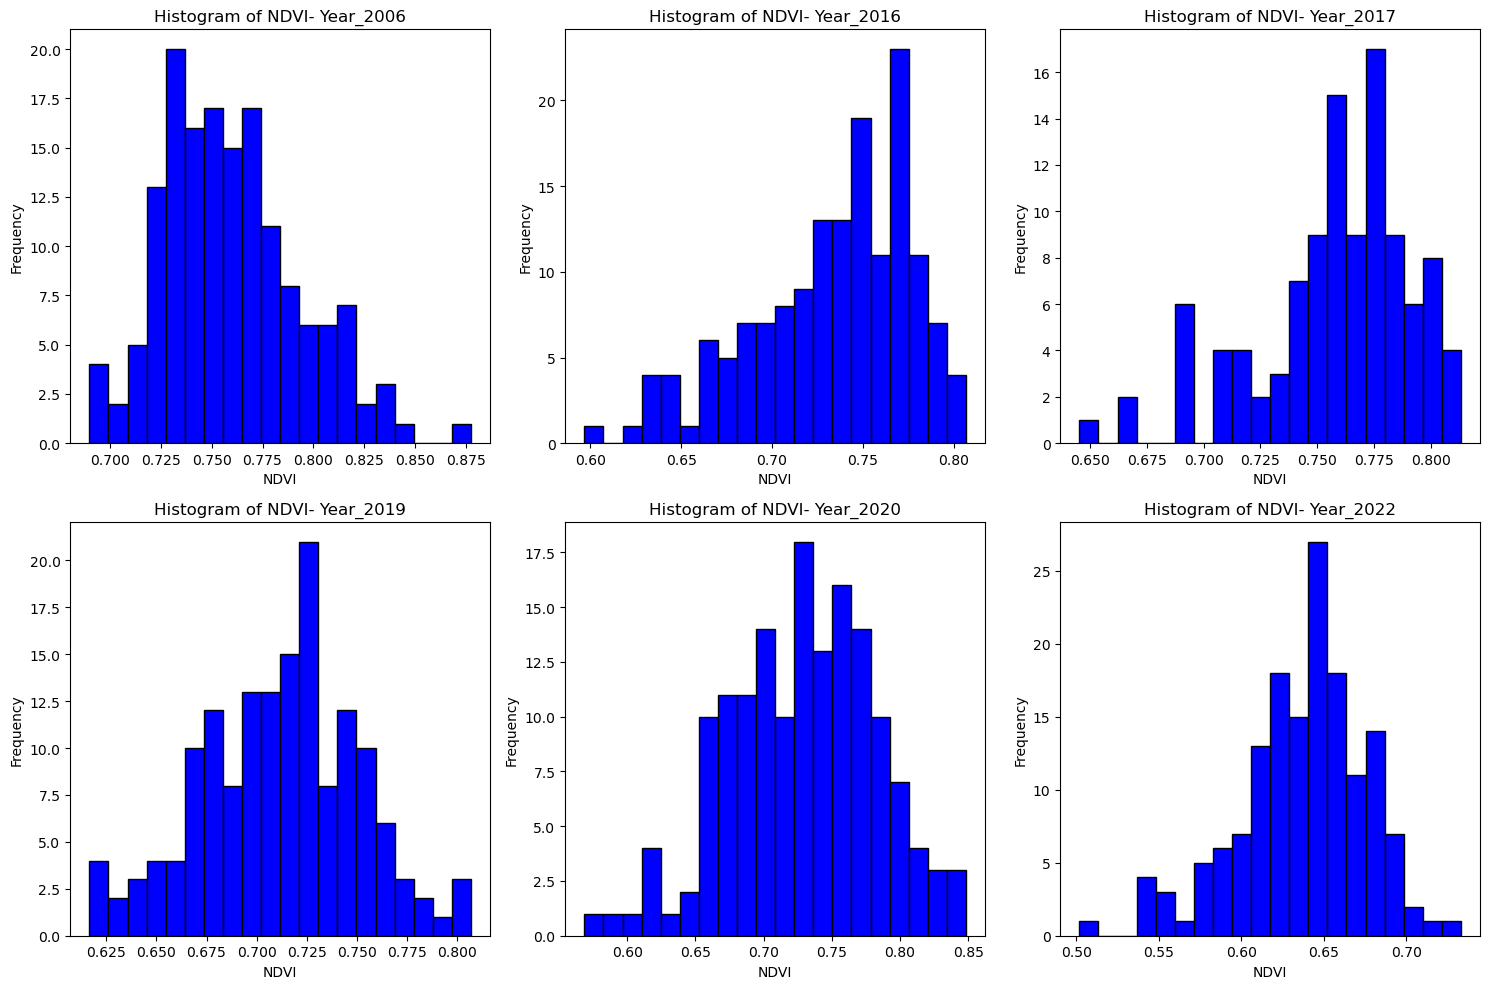

In [9]:
import matplotlib.pyplot as plt

def plot_histograms(dataframes, column_name,years):
    num_dataframes = len(dataframes)
    num_rows = (num_dataframes + 2) // 3  # Ensure at least 1 row
    num_cols = min(num_dataframes, 3)
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

    # Flatten the axes for easier indexing
    axes = axes.flatten()

    for i, (df,year) in enumerate(zip(dataframes,years)):
        ax = axes[i]
        ax.hist(df[column_name], bins=20, color='blue', edgecolor='black')
        ax.set_title(f'Histogram of {column_name}- {year}')
        ax.set_xlabel(column_name)
        ax.set_ylabel('Frequency')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()



# Example usage:
# Assuming dataframes is a list of your 6 DataFrames and 'ndvi' is the common column
dataframes = [df1, df2, df3, df4, df5, df6]

column_name = 'NDVI'
years = ['Year_2006', 'Year_2016', 'Year_2017', 'Year_2019', 'Year_2020', 'Year_2022']

plot_histograms(dataframes, column_name, years)


In [70]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import warnings

# # Suppress warnings
# warnings.filterwarnings("ignore", category=FutureWarning)

# # Assuming df_list is a list of your 6 DataFrames and 'ndvi' is the common column
# column_name = 'NDVI'
# dataframes = [df1, df2, df3, df4, df5, df6]
# years = ['Year_2006', 'Year_2016', 'Year_2017', 'Year_2019', 'Year_2020', 'Year_2022']
# # Create a DataFrame for seaborn
# frames = [pd.DataFrame({'Value': df[column_name], 'Year': year}) for year, df in zip(years, dataframes)]
# data_concat = pd.concat(frames)

# # Set seaborn style
# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth': 2})
# palette = sns.color_palette("Set2", 6)

# # Create a FacetGrid
# g = sns.FacetGrid(data_concat, palette=palette, row="Year", hue="Year", aspect=9, height=1.2)

# # Map the ridge plot
# g.map_dataframe(sns.kdeplot, x="Value", fill=True, alpha=1)
# g.map_dataframe(sns.kdeplot, x="Value", color='black')

# # Define a function to label the plots
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .2, label, color='black', fontsize=13, ha="left", va="center", transform=ax.transAxes)

# # Apply the labels
# g.map(label, "Year")

# # Adjust layout
# g.fig.subplots_adjust(hspace=-.5)
# g.set_titles("")
# g.set(yticks=[], xlabel=f"{column_name.capitalize()} Value")
# g.despine(left=True)

# # Set the main title
# plt.suptitle(f'Ridge Plot of {column_name.capitalize()} for Different Years', y=0.98)

# # Show the plot
# plt.show()




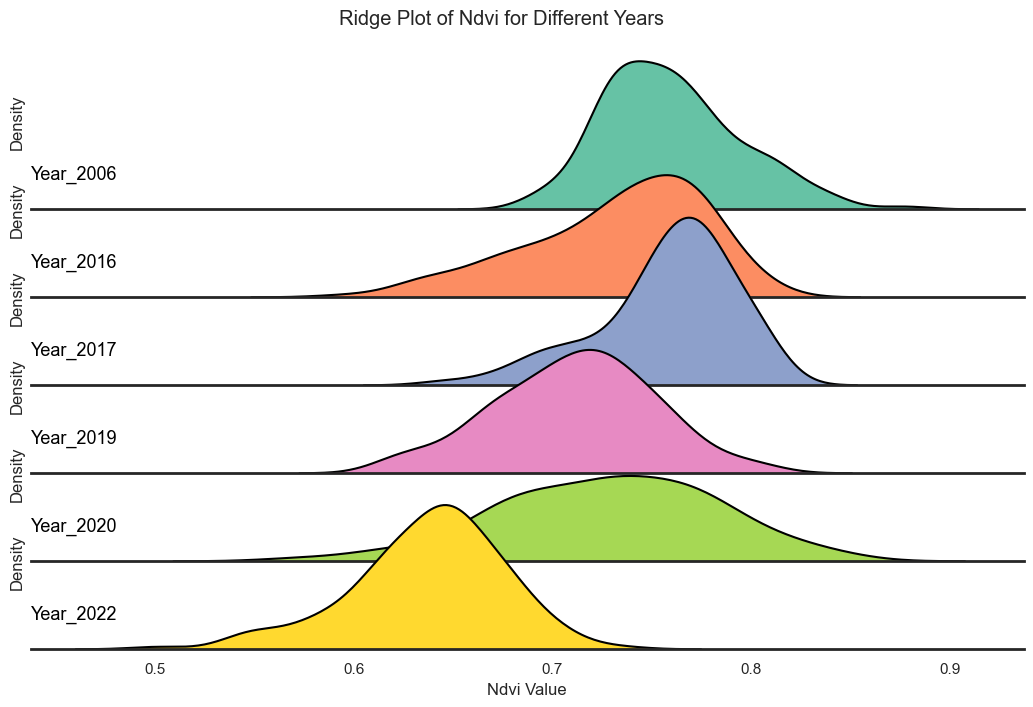

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings



def plot_ridge_histograms(dataframes, column_name, years):
    
    # Suppress warnings
    warnings.filterwarnings("ignore", category=FutureWarning)
    # Create a DataFrame for seaborn
    frames = [pd.DataFrame({'Value': df[column_name], 'Year': year}) for year, df in zip(years, dataframes)]
    data_concat = pd.concat(frames)
    
    # Set seaborn style
    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth': 2})
    palette = sns.color_palette("Set2", 6)
    # Create a FacetGrid
    g = sns.FacetGrid(data_concat, palette=palette, row="Year", hue="Year", aspect=9, height=1.2)
    # Map the ridge plot
    g.map_dataframe(sns.kdeplot, x="Value", fill=True, alpha=1)
    g.map_dataframe(sns.kdeplot, x="Value", color='black')
    
    # Define a function to label the plots
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, color='black', fontsize=13, ha="left", va="center", transform=ax.transAxes)
    # Apply the labels
    g.map(label, "Year")
    # Adjust layout
    g.fig.subplots_adjust(hspace=-.5)
    g.set_titles("")
    g.set(yticks=[], xlabel=f"{column_name.capitalize()} Value")
    g.despine(left=True)
    
    # Set the main title
    plt.suptitle(f'Ridge Plot of {column_name.capitalize()} for Different Years', y=0.98)
    
    # Show the plot
    plt.show()

# Assuming dataframes is a list of your 6 DataFrames and 'NDVI' is the column

# Example usage
column_name = 'NDVI'
dataframes = [df1, df2, df3, df4, df5,df6]
years = ['Year_2006', 'Year_2016', 'Year_2017', 'Year_2019', 'Year_2020', 'Year_2022']
plot_ridge_histograms(dataframes, 'NDVI', years)

# Kruskal-Wallis Test:

Null Hypothesis: The distributions of all groups are the same.

Alternative Hypothesis: At least one group's distribution is different

If the p-value is below a significance level (e.g., 0.05), you reject the null hypothesis and conclude that at least one group has a different distribution.

In [11]:
from scipy.stats import kruskal
dataframes = [df1, df2, df3, df4, df5, df6]

# Assuming dataframes is your list of dataframes
ndvi_values = [df['NDVI'].dropna().values for df in dataframes]

# Perform Kruskal-Wallis test
stat, p_value = kruskal(*ndvi_values)
print(f'Kruskal-Wallis Test - Statistic: {stat}, p-value: {p_value}')


Kruskal-Wallis Test - Statistic: 398.6610410940839, p-value: 5.765585043143552e-84


# Analysis of Variance (ANOVA):

Null Hypothesis: The means of all groups are the same.

Alternative Hypothesis: At least one group's mean is different

Again, if the p-value is below your chosen significance level, you reject the null hypothesis.

In [12]:
from scipy.stats import f_oneway

# Perform one-way ANOVA
stat, p_value = f_oneway(*ndvi_values)
print(f'One-way ANOVA - Statistic: {stat}, p-value: {p_value}')


One-way ANOVA - Statistic: 172.2791778568968, p-value: 2.3503539302780403e-127


In [13]:
#pip install scikit-posthocs

In hypothesis testing, a lower p-value indicates stronger evidence against the null hypothesis. If you have set a significance level (e.g., 0.05), you would typically compare each p-value to this threshold. If a p-value is less than the significance level, you would reject the null hypothesis for that particular pair, suggesting a significant difference between the group

In [14]:
#https://pypi.org/project/scikit-posthocs/

#Non parametric
from scikit_posthocs import posthoc_mannwhitney
#from scikit_posthocs import posthoc_wilcoxon #got error, different groups need to have same sample numbers
#from scikit_posthocs import posthoc_dunn
#from scikit_posthocs import posthoc_conover
#from scikit_posthocs import posthoc_dscf
#from scikit_posthocs import posthoc_nemenyi
#from scikit_posthocs import posthoc_npm_test

#Parametric
#from scikit_posthocs import posthoc_scheffe
#from scikit_posthocs import posthoc_tamhane
#from scikit_posthocs import posthoc_ttest
#from scikit_posthocs import posthoc_tukey
#from scikit_posthocs import posthoc_tukey_hsd #got error

# Assuming df_list is your list of dataframes
posthoc_results1 = posthoc_mannwhitney(ndvi_values)

print(posthoc_results1)


              1             2             3             4             5  \
1  1.000000e+00  5.240838e-06  4.366459e-01  8.500870e-23  1.081549e-07   
2  5.240838e-06  1.000000e+00  1.382641e-06  9.196695e-07  3.105248e-01   
3  4.366459e-01  1.382641e-06  1.000000e+00  2.206416e-18  6.575522e-07   
4  8.500870e-23  9.196695e-07  2.206416e-18  1.000000e+00  1.676968e-03   
5  1.081549e-07  3.105248e-01  6.575522e-07  1.676968e-03  1.000000e+00   
6  1.913946e-51  1.206111e-40  9.936789e-41  7.442108e-36  1.452163e-36   

              6  
1  1.913946e-51  
2  1.206111e-40  
3  9.936789e-41  
4  7.442108e-36  
5  1.452163e-36  
6  1.000000e+00  


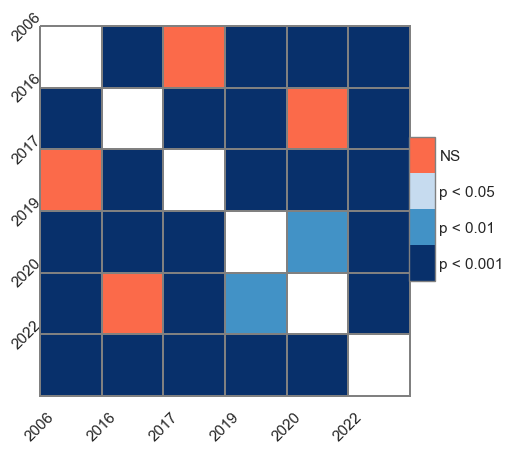

In [15]:
import scikit_posthocs as sp
years = ['2006', '2016', '2017', '2019', '2020', '2022']
# Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 
                'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
ax,cbar=sp.sign_plot(posthoc_results1, **heatmap_args)

# Set x-ticks and y-ticks
ax.set_xticks(range(len(years)))
ax.set_xticklabels(years, rotation=45,ha='center')

ax.set_yticks(range(len(years)))
ax.set_yticklabels(years,rotation=45,ha='center')

# Show the plot
plt.show()

In [16]:
# Check lengths of arrays in ndvi_values
lengths = [len(arr) for arr in ndvi_values]
print(lengths)

[154, 154, 106, 154, 154, 154]


# 2. Red-Edge Chlorophyll Vegetation Index (RECl)

The ReCI vegetation index is responsive to chlorophyll content in leaves that is nourished by nitrogen. ReCI shows the photosynthetic activity of the canopy cover.

Formula: ReCI = (NIR / RED) – 1

Key fact: Because chlorophyll content directly depends on nitrogen level in plants, responsible for their “greenness”, this vegetation index in remote sensing helps detect areas with yellow or shed foliage.

When to use: ReCI values are most useful at the stage of active vegetation development but are not suitable for the season of harvesting.

 A. A. Gitelson, A. Vina, V. Ciganda, D. C. Rundquist, and T. J. Arkebauer,
“Remote estimation of canopy chlorophyll content in crops,” Geophys.
Res. Lett., vol. 32, no. 8, 2005, Art. no. L08403.

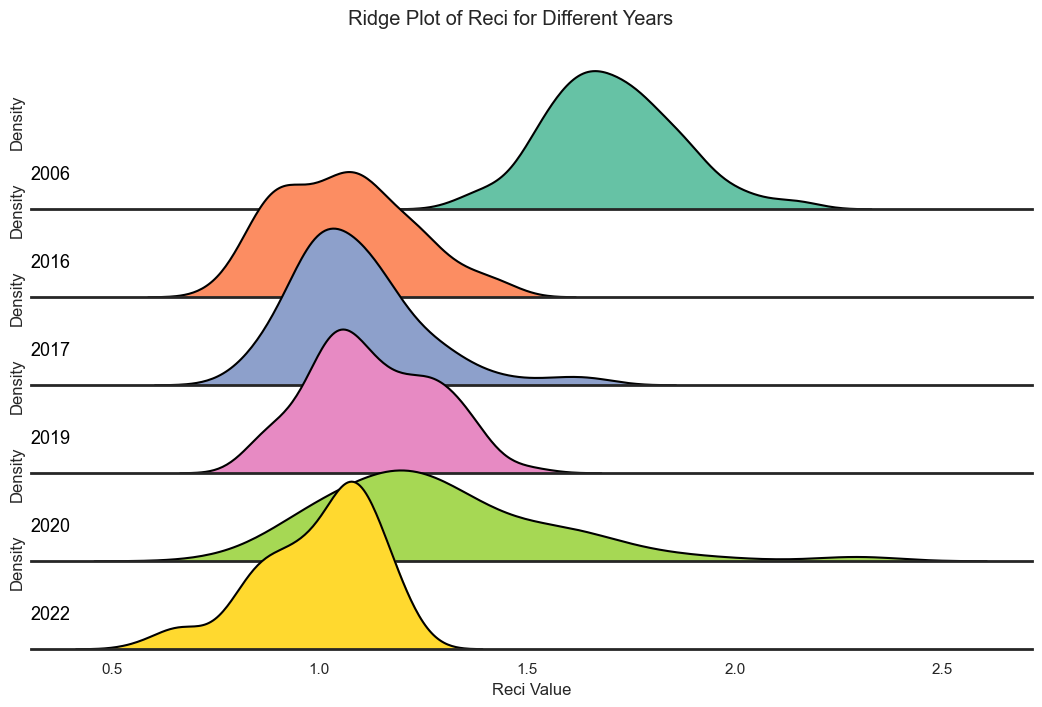

In [17]:
plot_ridge_histograms(dataframes, 'ReCI', years)

Kruskal-Wallis Test - Statistic: 446.26730704223564, p-value: 3.136268180967254e-94
One-way ANOVA - Statistic: 313.63110225894064, p-value: 7.38672353296183e-192
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  9.698879e-52  3.758307e-41  1.248739e-51  5.764143e-35   
2  9.698879e-52  1.000000e+00  2.424430e-01  2.266400e-04  5.421221e-15   
3  3.758307e-41  2.424430e-01  1.000000e+00  1.272535e-02  1.331691e-10   
4  1.248739e-51  2.266400e-04  1.272535e-02  1.000000e+00  2.367894e-07   
5  5.764143e-35  5.421221e-15  1.331691e-10  2.367894e-07  1.000000e+00   
6  5.303067e-52  5.163198e-03  2.680961e-04  6.832557e-11  5.842419e-24   

              6  
1  5.303067e-52  
2  5.163198e-03  
3  2.680961e-04  
4  6.832557e-11  
5  5.842419e-24  
6  1.000000e+00  


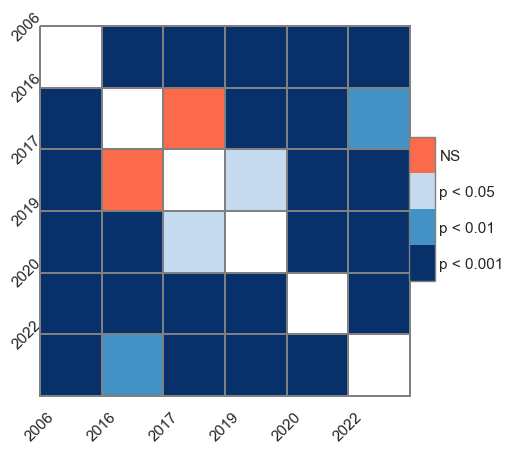

In [18]:
#https://pypi.org/project/scikit-posthocs/


def statistical_test(dataframes,column_name):
    
    # Assuming dataframes is your list of dataframes
    VI_values = [df[column_name].dropna().values for df in dataframes]
    
    from scipy.stats import kruskal
    # Perform Kruskal-Wallis test
    stat, p_value = kruskal(*VI_values)
    print(f'Kruskal-Wallis Test - Statistic: {stat}, p-value: {p_value}')
    
    from scipy.stats import f_oneway
    # Perform one-way ANOVA
    stat, p_value = f_oneway(*VI_values)
    print(f'One-way ANOVA - Statistic: {stat}, p-value: {p_value}')
    
    #Non parametric
    from scikit_posthocs import posthoc_mannwhitney
    # Assuming df_list is your list of dataframes
    posthoc_results1 = posthoc_mannwhitney(VI_values)
    print(f'posthoc_mannwhitney test:{posthoc_results1}')
    
    import scikit_posthocs as sp
    years = ['2006', '2016', '2017', '2019', '2020', '2022']
    # Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
    cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']66
    heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 
                    'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
    ax,cbar=sp.sign_plot(posthoc_results1, **heatmap_args)
    # Set x-ticks and y-ticks
    ax.set_xticks(range(len(years)))
    ax.set_xticklabels(years, rotation=45,ha='center')

    ax.set_yticks(range(len(years)))
    ax.set_yticklabels(years,rotation=45,ha='center')
    # Show the plot
    plt.show()

    
dataframes = [df1, df2, df3, df4, df5, df6]
column_name='ReCI'
statistical_test(dataframes, 'ReCI')

# 3.Normalized Difference Red Edge Vegetation Index (NDRE)
**Formula:** NDRE = (NIR – RED EDGE) / (NIR + RED EDGE)

**Key fact:** The given vegetation index applies for high-density canopy cover.

**When to use:** NDRE is typically used to monitor crops that have reached the maturity stage.

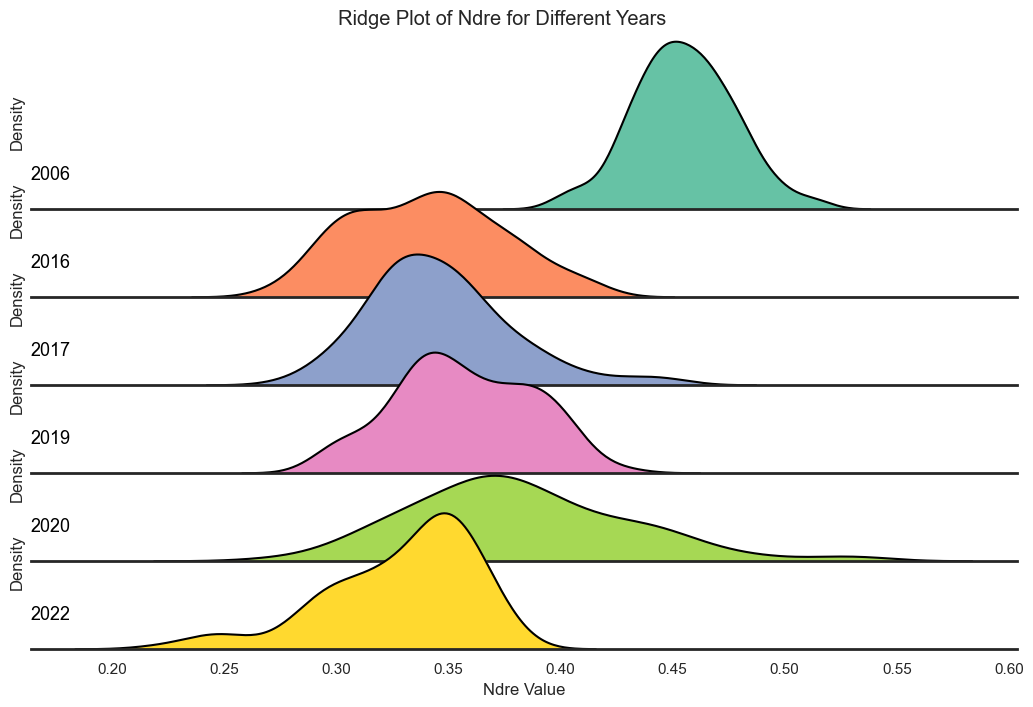

In [46]:
plot_ridge_histograms(dataframes, 'NDRE', years)

Kruskal-Wallis Test - Statistic: 442.2673701647486, p-value: 2.2863859030014626e-93
One-way ANOVA - Statistic: 276.29982032052106, p-value: 7.662616152336322e-177
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  9.512053e-52  2.674023e-41  1.607318e-51  1.186133e-35   
2  9.512053e-52  1.000000e+00  2.669286e-01  2.433070e-05  1.385100e-14   
3  2.674023e-41  2.669286e-01  1.000000e+00  1.814471e-03  1.605707e-10   
4  1.607318e-51  2.433070e-05  1.814471e-03  1.000000e+00  5.209027e-06   
5  1.186133e-35  1.385100e-14  1.605707e-10  5.209027e-06  1.000000e+00   
6  5.303067e-52  2.814661e-02  2.286720e-03  6.774473e-11  3.716963e-22   

              6  
1  5.303067e-52  
2  2.814661e-02  
3  2.286720e-03  
4  6.774473e-11  
5  3.716963e-22  
6  1.000000e+00  


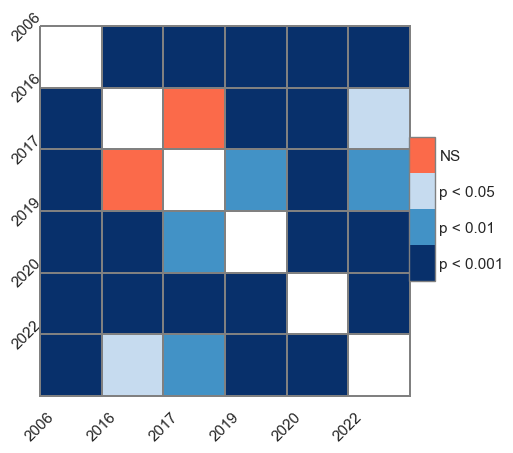

In [47]:
statistical_test(dataframes, 'GCI')

# 4. Green Normalized Difference Vegetation Index (GNDVI)
Formula: GNDVI = (NIR – GREEN) / (NIR + GREEN)

Key fact: GNDVI measures chlorophyll content more accurately than NDVI.

https://www.auravant.com/en/articles/precision-agriculture/vegetation-indices-and-their-interpretation-ndvi-gndvi-msavi2-ndre-and-ndwi/

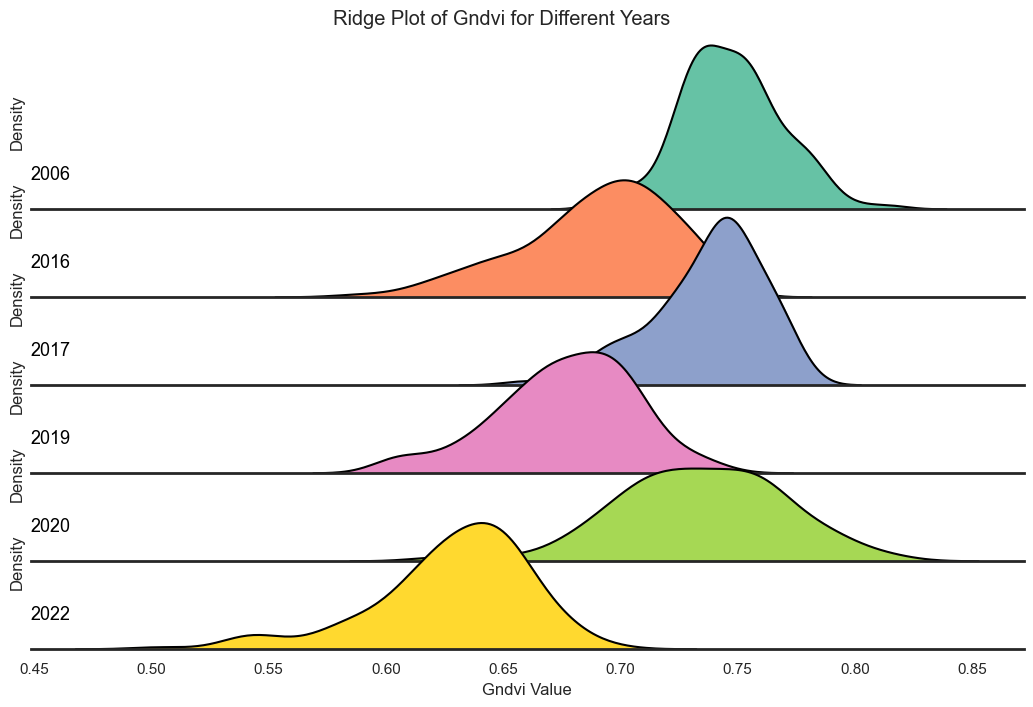

In [48]:
plot_ridge_histograms(dataframes, 'GNDVI', years)

Kruskal-Wallis Test - Statistic: 597.0476280267764, p-value: 8.78552070655392e-127
One-way ANOVA - Statistic: 348.6194292412663, p-value: 6.326587878465813e-205
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  1.684204e-41  1.346509e-02  4.154796e-48  7.874821e-04   
2  1.684204e-41  1.000000e+00  1.039818e-26  2.474847e-05  8.831056e-23   
3  1.346509e-02  1.039818e-26  1.000000e+00  2.142551e-34  4.018697e-01   
4  4.154796e-48  2.474847e-05  2.142551e-34  1.000000e+00  6.330395e-34   
5  7.874821e-04  8.831056e-23  4.018697e-01  6.330395e-34  1.000000e+00   
6  5.513826e-52  2.563030e-36  2.017071e-42  5.303901e-30  2.502066e-49   

              6  
1  5.513826e-52  
2  2.563030e-36  
3  2.017071e-42  
4  5.303901e-30  
5  2.502066e-49  
6  1.000000e+00  


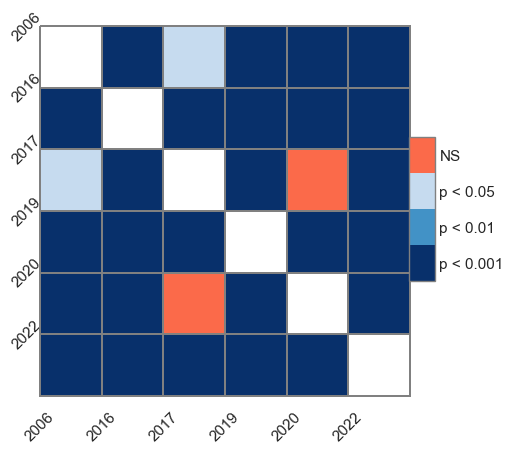

In [49]:
statistical_test(dataframes, 'GNDVI')

# 5. Optimized Soil Adjusted Vegetation Index (OSAVI)
Formula: OSAVI = (NIR – RED) / (NIR + RED + 0.16)

Key fact: The adjustment allows greater soil variation in OSAVI compared to SAVI when canopy cover is low. OSAVI has a better sensitivity to canopy cover exceeding 50%.

Where to use: to monitor areas with low-density vegetation with bare soil areas through the canopy.

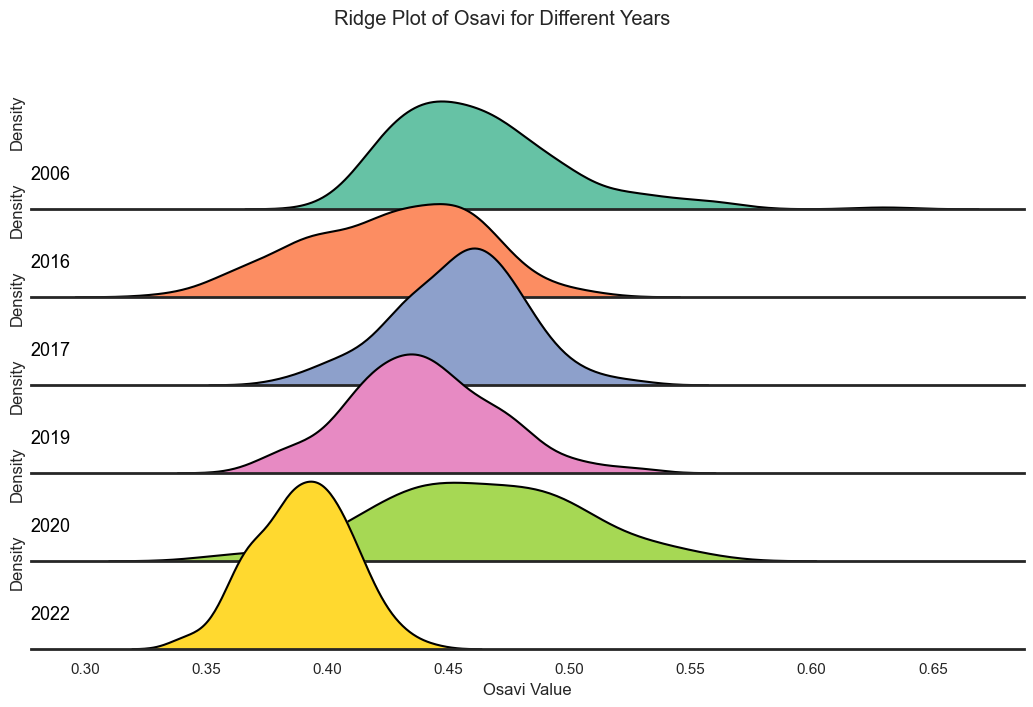

In [50]:
plot_ridge_histograms(dataframes, 'OSAVI', years)

Kruskal-Wallis Test - Statistic: 354.41285951102327, p-value: 1.963267026701142e-74
One-way ANOVA - Statistic: 111.61524371844625, p-value: 3.9831683120307154e-91
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  3.966673e-14  2.884654e-01  1.369492e-08  7.234717e-01   
2  3.966673e-14  1.000000e+00  4.649217e-10  8.659841e-03  1.084577e-12   
3  2.884654e-01  4.649217e-10  1.000000e+00  1.356001e-05  1.187753e-01   
4  1.369492e-08  8.659841e-03  1.356001e-05  1.000000e+00  1.460781e-07   
5  7.234717e-01  1.084577e-12  1.187753e-01  1.460781e-07  1.000000e+00   
6  8.788448e-50  1.246922e-20  6.247544e-38  3.506920e-37  1.517541e-41   

              6  
1  8.788448e-50  
2  1.246922e-20  
3  6.247544e-38  
4  3.506920e-37  
5  1.517541e-41  
6  1.000000e+00  


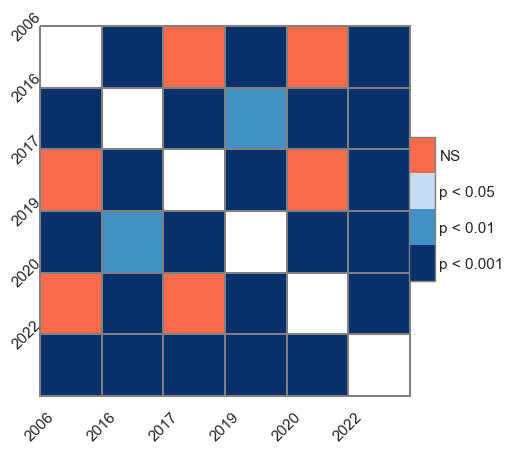

In [51]:
statistical_test(dataframes, 'OSAVI')

# 6.Green Chlorophyll Vegetation Index (GCI)
In remote sensing, the GCI vegetation index is used to estimate the content of leaf chlorophyll in various species of plants. The chlorophyll content reflects the physiological state of vegetation; it decreases in stressed plants and can therefore be used as a measurement of vegetation health.

Formula: GCI = (NIR / GREEN) – 1

Key fact: Better prediction of chlorophyll amount with the GCI vegetation index can be achieved by using satellite sensors that have broad NIR and green wavelengths.

When to use: to monitor the impact of seasonality, environmental stresses, or applied pesticides on vegetation health

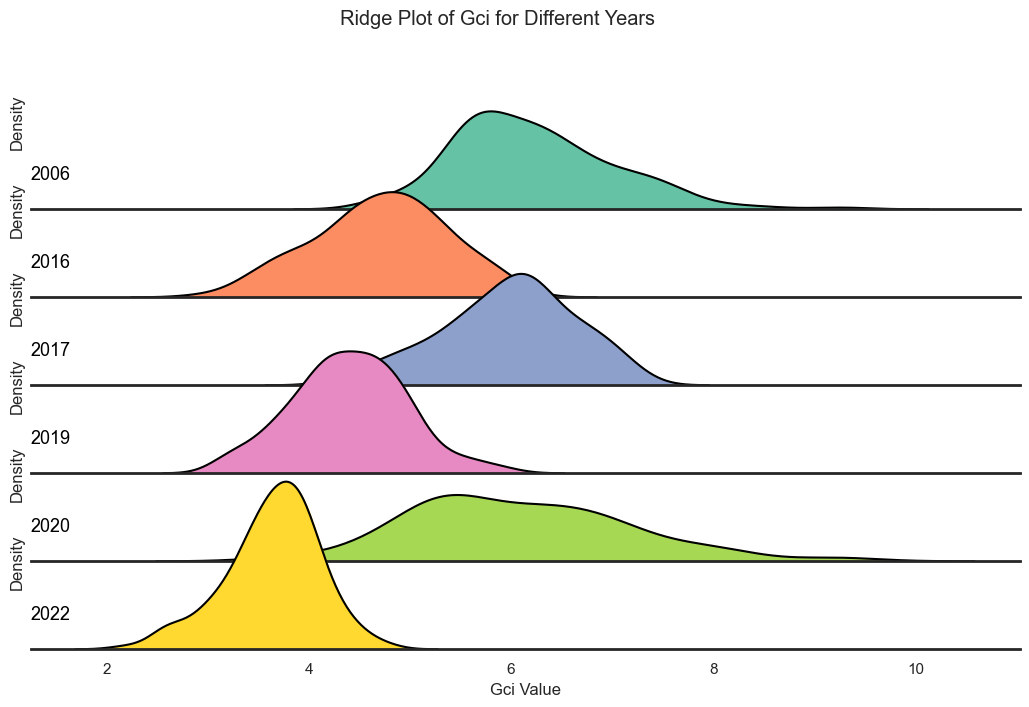

In [52]:
plot_ridge_histograms(dataframes, 'GCI', years)

Kruskal-Wallis Test - Statistic: 614.275099545508, p-value: 1.6647131085702308e-130
One-way ANOVA - Statistic: 322.49281080627446, p-value: 2.968019996197568e-195
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  2.110369e-41  5.582904e-02  2.551254e-48  8.557657e-02   
2  2.110369e-41  1.000000e+00  1.737190e-29  7.805456e-06  2.489292e-29   
3  5.582904e-02  1.737190e-29  1.000000e+00  1.330130e-36  7.709162e-01   
4  2.551254e-48  7.805456e-06  1.330130e-36  1.000000e+00  1.337095e-39   
5  8.557657e-02  2.489292e-29  7.709162e-01  1.337095e-39  1.000000e+00   
6  5.513957e-52  2.430772e-34  1.460802e-42  6.462289e-27  3.380385e-50   

              6  
1  5.513957e-52  
2  2.430772e-34  
3  1.460802e-42  
4  6.462289e-27  
5  3.380385e-50  
6  1.000000e+00  


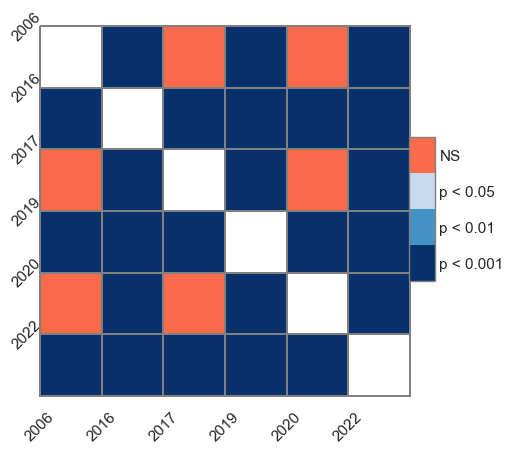

In [53]:
statistical_test(dataframes, 'GCI')

# 7. Simple Ratio (SR)
This is the simplest VI which is a ratio between the reflectance recorded in the Near Infra-Red (NIR) and Red bands. This is a quick way to distinguish green leaves from other objects in the scene and estimate the relative biomass present in the image. Also, this value may be very useful in distinguishing stressed vegetation from non-stressed areas.

https://www.hiphen-plant.com/vegetation-index/3582/#:~:text=Simple%20Ratio%20(SR),biomass%20present%20in%20the%20image.

Simple Ratio = ρNIR / ρRed = ρ850 / ρ675

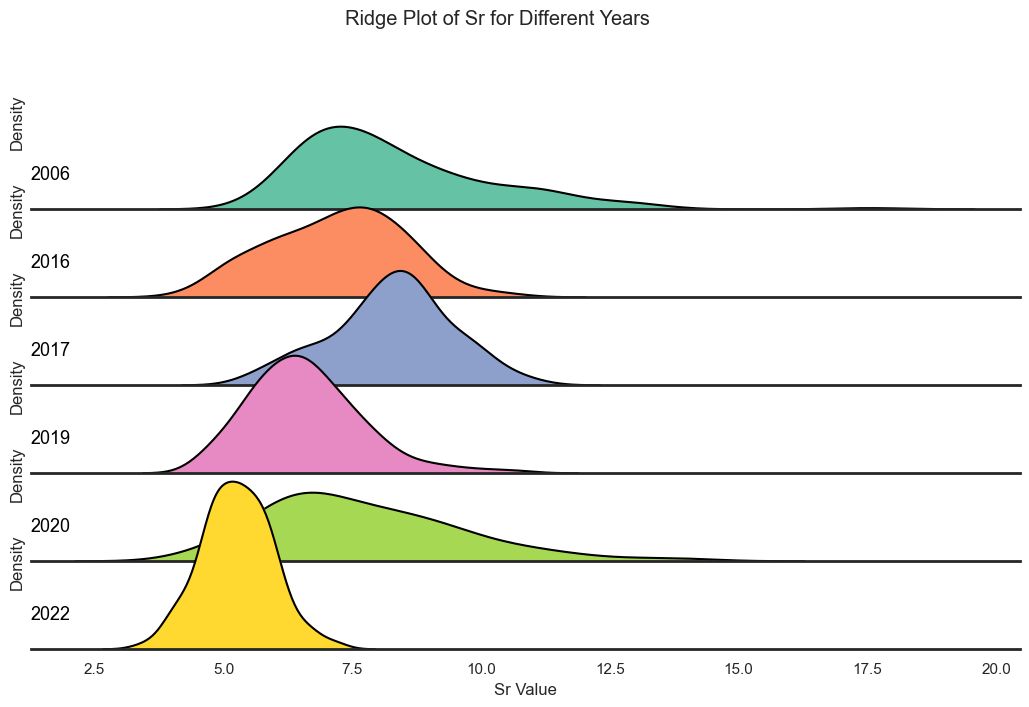

In [54]:
plot_ridge_histograms(dataframes, 'SR', years)

Kruskal-Wallis Test - Statistic: 379.04964703121095, p-value: 9.698634534941217e-80
One-way ANOVA - Statistic: 100.22158722268179, p-value: 1.768304970834348e-83
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  8.843446e-07  1.862937e-01  5.088739e-21  2.173807e-03   
2  8.843446e-07  1.000000e+00  2.957396e-10  3.473234e-06  7.881609e-02   
3  1.862937e-01  2.957396e-10  1.000000e+00  2.253365e-22  2.842798e-04   
4  5.088739e-21  3.473234e-06  2.253365e-22  1.000000e+00  2.406473e-08   
5  2.173807e-03  7.881609e-02  2.842798e-04  2.406473e-08  1.000000e+00   
6  2.030489e-49  7.286837e-34  1.952134e-40  1.580155e-27  1.793762e-36   

              6  
1  2.030489e-49  
2  7.286837e-34  
3  1.952134e-40  
4  1.580155e-27  
5  1.793762e-36  
6  1.000000e+00  


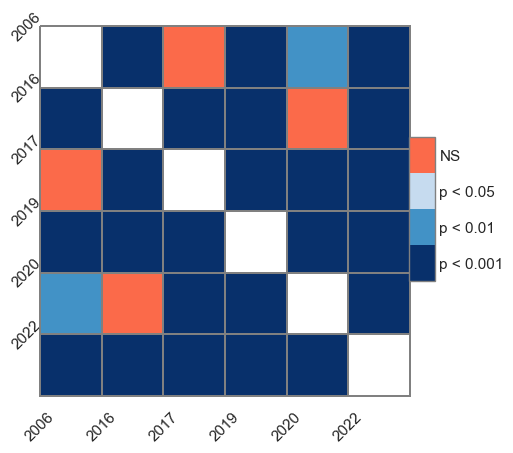

In [55]:
statistical_test(dataframes, 'SR')

# 8. Modified simple ratio vegetation index (MSR)

MSR aims at alleviating the saturation drawback of NDVI. It aims to linearize the relationships between the index and biophysical parameters. 

MSR = ((ρNIR/ρred) - 1)/((ρNIR/ρred)^1/2 + 1)

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3859895/

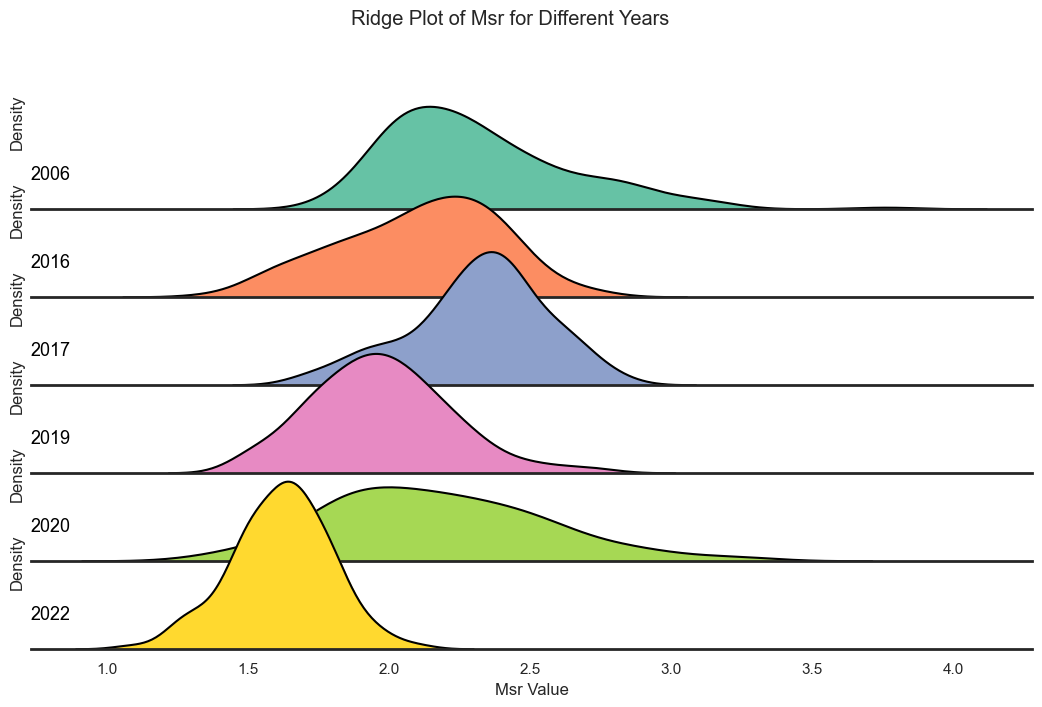

In [56]:
plot_ridge_histograms(dataframes, 'MSR', years)

Kruskal-Wallis Test - Statistic: 389.46085202202676, p-value: 5.539953008308322e-82
One-way ANOVA - Statistic: 125.8347592174388, p-value: 2.9354290135737076e-100
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  2.092322e-06  2.424430e-01  1.321009e-21  1.723697e-04   
2  2.092322e-06  1.000000e+00  6.466121e-09  2.040058e-06  3.894785e-01   
3  2.424430e-01  6.466121e-09  1.000000e+00  4.130050e-21  5.298163e-05   
4  1.321009e-21  2.040058e-06  4.130050e-21  1.000000e+00  2.001686e-06   
5  1.723697e-04  3.894785e-01  5.298163e-05  2.001686e-06  1.000000e+00   
6  8.811866e-51  4.199950e-37  8.110609e-41  1.157876e-31  3.933459e-37   

              6  
1  8.811866e-51  
2  4.199950e-37  
3  8.110609e-41  
4  1.157876e-31  
5  3.933459e-37  
6  1.000000e+00  


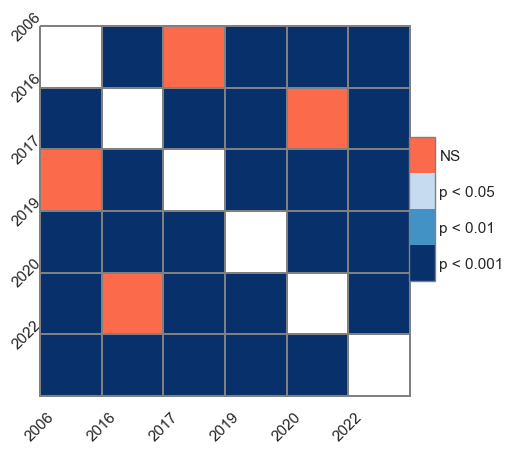

In [57]:
statistical_test(dataframes, 'MSR')

# 9. Renormalized difference vegetation index (RDVI)

RDVI = (ρNIR - ρred)/(ρNIR + ρred)1/2

It aims to linearize the relationships between the index and biophysical parameters.

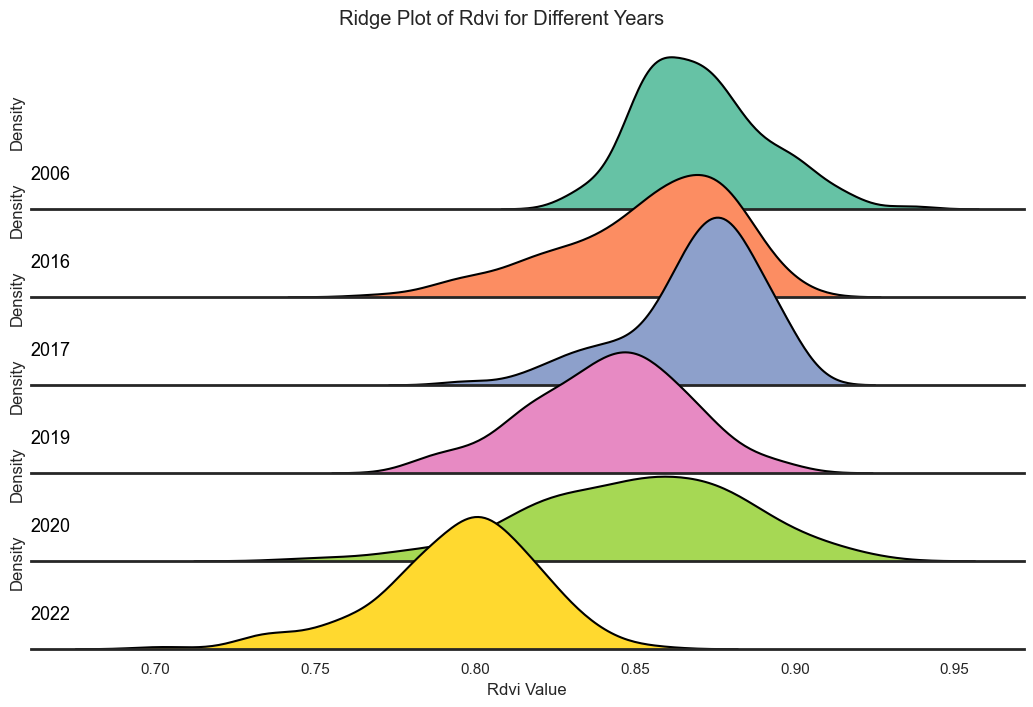

In [58]:
plot_ridge_histograms(dataframes, 'RDVI', years)

Kruskal-Wallis Test - Statistic: 399.83120623696095, p-value: 3.2258565094662485e-84
One-way ANOVA - Statistic: 177.19033578188447, p-value: 5.244334844038134e-130
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  4.695724e-06  4.993605e-01  4.005961e-23  1.299598e-08   
2  4.695724e-06  1.000000e+00  2.667255e-06  8.671757e-07  1.868493e-01   
3  4.993605e-01  2.667255e-06  1.000000e+00  4.049189e-18  2.728093e-07   
4  4.005961e-23  8.671757e-07  4.049189e-18  1.000000e+00  4.526934e-03   
5  1.299598e-08  1.868493e-01  2.728093e-07  4.526934e-03  1.000000e+00   
6  1.638815e-51  5.463821e-41  1.302216e-40  2.647490e-36  8.464477e-36   

              6  
1  1.638815e-51  
2  5.463821e-41  
3  1.302216e-40  
4  2.647490e-36  
5  8.464477e-36  
6  1.000000e+00  


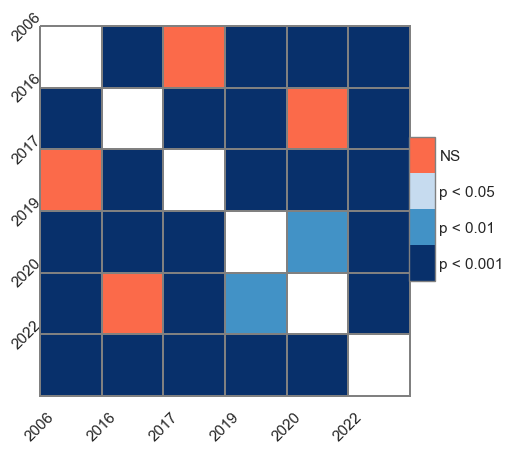

In [59]:
statistical_test(dataframes, 'RDVI')

https://eos.com/blog/vegetation-indices/#:~:text=Red%2DEdge%20Chlorophyll%20Vegetation%20Index%20(RECl)&text=ReCI%20shows%20the%20photosynthetic%20activity%20of%20the%20canopy%20cover.&text=Key%20fact%3A%20Because%20chlorophyll%20content,with%20yellow%20or%20shed%20foliage.

# 10.Normalized Difference Water Index (NDWI)
The NDWI was initially elaborated to outline open water bodies and assess their turbidity, mitigating the reflectance of soil and land vegetation cover. NDWI is retrieved with a near-infrared and visible green band combination.

Formula: NDWI = (GREEN – NIR) / (GREEN + NIR)

Key facts: The NDWI index is often confused with NDMI (Normalized Difference Moisture Index). NDWI uses SWIR (Short Wave Infrared) and NIR channels. NIR reflectance allows analyzing dry matter content in vegetation foliage and internal leaf structure, while SWIR reflectance shows the changes in plant water content and mesophyll structure. When combined, NIR and SWIR bands give a better idea of plant water content because the water in the internal leaf structure impacts the spectral reflectance in SWIR.

When to use: detection of flooded agricultural lands; allocation of flooding on the field; detection irrigated farmland; allocation of wetlands.

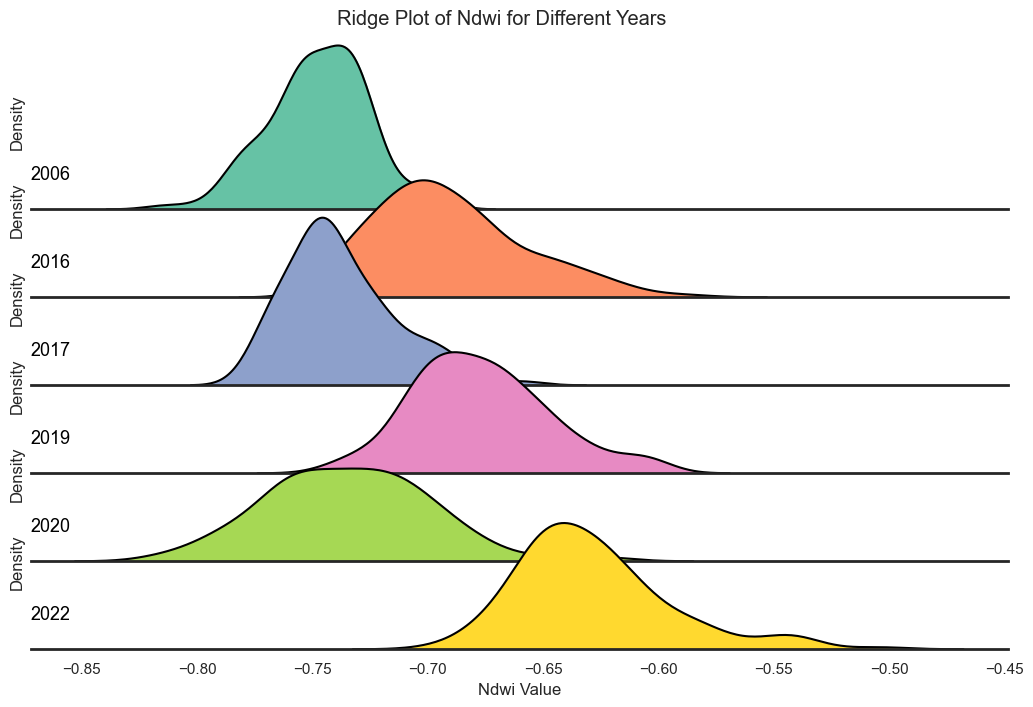

In [60]:
plot_ridge_histograms(dataframes, 'NDWI', years)

Kruskal-Wallis Test - Statistic: 597.0476280267768, p-value: 8.785520706551912e-127
One-way ANOVA - Statistic: 348.6194292412663, p-value: 6.326587878465813e-205
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  1.684204e-41  1.346509e-02  4.154796e-48  7.874821e-04   
2  1.684204e-41  1.000000e+00  1.039818e-26  2.474847e-05  8.831056e-23   
3  1.346509e-02  1.039818e-26  1.000000e+00  2.142551e-34  4.018697e-01   
4  4.154796e-48  2.474847e-05  2.142551e-34  1.000000e+00  6.330395e-34   
5  7.874821e-04  8.831056e-23  4.018697e-01  6.330395e-34  1.000000e+00   
6  5.513826e-52  2.563030e-36  2.017071e-42  5.303901e-30  2.502066e-49   

              6  
1  5.513826e-52  
2  2.563030e-36  
3  2.017071e-42  
4  5.303901e-30  
5  2.502066e-49  
6  1.000000e+00  


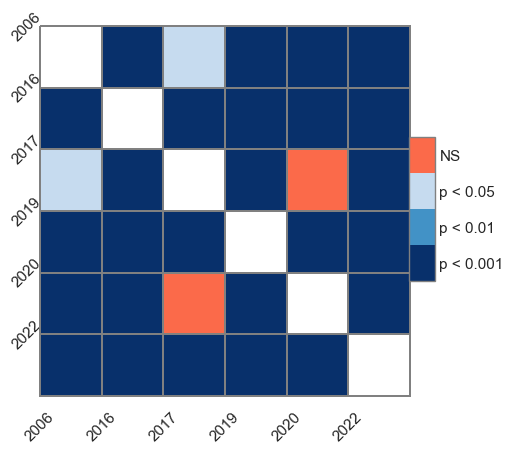

In [61]:
statistical_test(dataframes, 'NDWI')

# Coefficient of Variation
Coefficient of variation defines standard deviation divided by mean.

First-order texture measures such as coefficient of variation in satellite reflectance data are good proxy for landscape diversity (quantified using measures of number of land-cover types, evenness, and topographic index)(r^2 = 0.67, p <0.0001) (Rey-Benayas and Pope 1995)


In [ ]:

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming dataframes is your list of dataframes
# CV_Green = [df['CV_Green'].dropna().values for df in dataframes]

# # Combine data into a single DataFrame for seaborn
# df_combined = pd.DataFrame({'Year': ['Year_2006']*len(CV_Green[0]) +
#                                     ['Year_2016']*len(CV_Green[1]) +
#                                     ['Year_2017']*len(CV_Green[2]) +
#                                     ['Year_2019']*len(CV_Green[3]) +
#                                     ['Year_2020']*len(CV_Green[4]) +
#                                     ['Year_2022']*len(CV_Green[5]),
#                             'CV_Green': np.concatenate(CV_Green)})

# # Create a boxplot
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='Year', y='CV_Green', data=df_combined)
# plt.title('Boxplot of CV_Green for Each Year')
# plt.show()

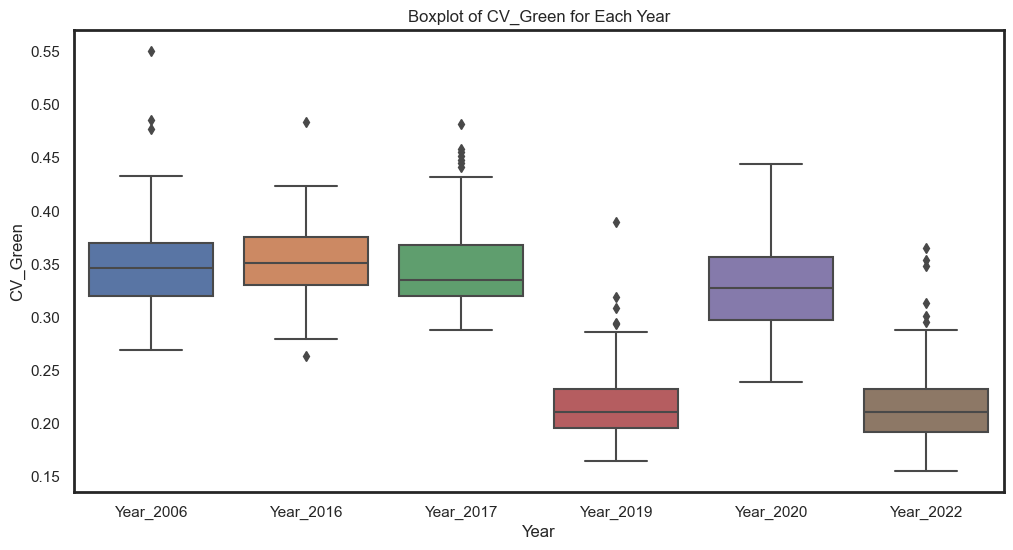

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def create_boxplots(dataframes, column_name):
    # Extract column values for each dataframe
    column_values = [df[column_name].dropna().values for df in dataframes]
    
    # Combine data into a single DataFrame for seaborn
    df_combined = pd.DataFrame({'Year': ['Year_2006']*len(column_values[0]) +
                                        ['Year_2016']*len(column_values[1]) +
                                        ['Year_2017']*len(column_values[2]) +
                                        ['Year_2019']*len(column_values[3]) +
                                        ['Year_2020']*len(column_values[4]) +
                                        ['Year_2022']*len(column_values[5]),
                                column_name: np.concatenate(column_values)})

    # Create a boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Year', y=column_name, data=df_combined)
    plt.title(f'Boxplot of {column_name} for Each Year')
    plt.show()
    
# Example usage
dataframes = [df1, df2, df3, df4, df5, df6]
create_boxplots(dataframes, 'CV_Green')


Kruskal-Wallis Test - Statistic: 575.8146088436029, p-value: 3.395861134396923e-122
One-way ANOVA - Statistic: 451.6528176483688, p-value: 7.213419336848835e-239
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  1.968683e-01  6.754180e-01  4.093520e-50  3.322367e-04   
2  1.968683e-01  1.000000e+00  8.646740e-02  2.304051e-50  1.927010e-06   
3  6.754180e-01  8.646740e-02  1.000000e+00  2.555254e-41  2.598555e-03   
4  4.093520e-50  2.304051e-50  2.555254e-41  1.000000e+00  3.783179e-48   
5  3.322367e-04  1.927010e-06  2.598555e-03  3.783179e-48  1.000000e+00   
6  5.140484e-49  1.744124e-49  2.336298e-40  6.500913e-01  9.628526e-47   

              6  
1  5.140484e-49  
2  1.744124e-49  
3  2.336298e-40  
4  6.500913e-01  
5  9.628526e-47  
6  1.000000e+00  


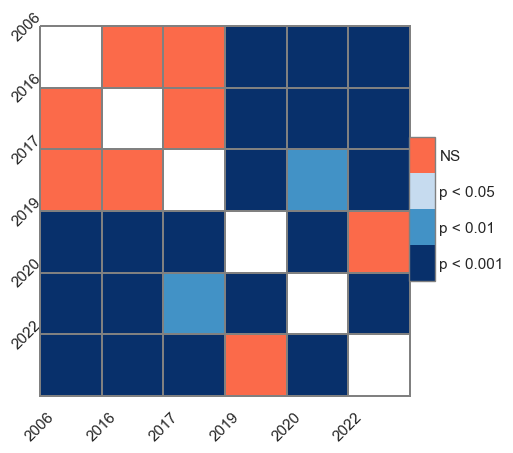

In [67]:
statistical_test(dataframes, 'CV_Green')

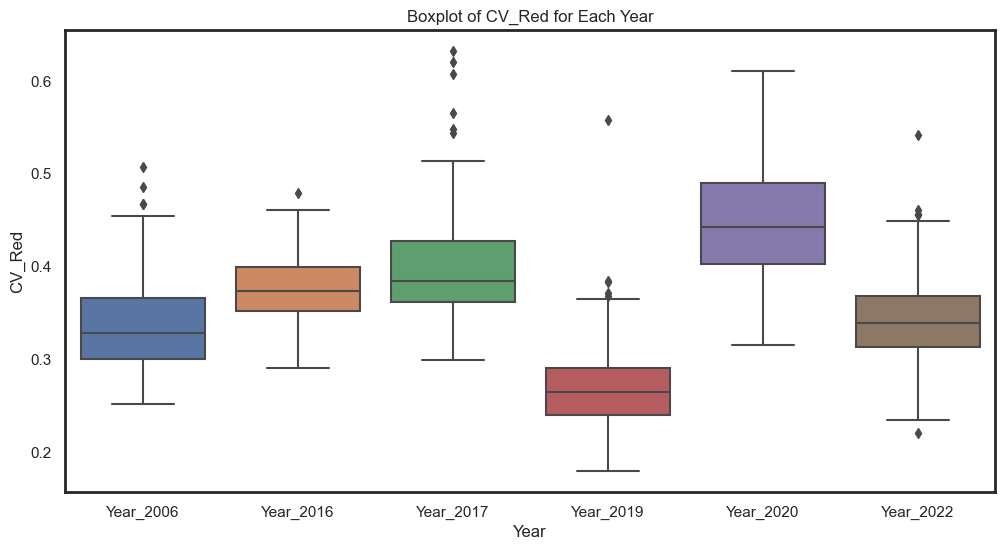

In [68]:
# Example usage
dataframes = [df1, df2, df3, df4, df5, df6]
create_boxplots(dataframes, 'CV_Red')

Kruskal-Wallis Test - Statistic: 507.39939647079564, p-value: 2.0185055550592736e-107
One-way ANOVA - Statistic: 214.78331654204447, p-value: 3.687433805970925e-149
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  2.127130e-14  5.352856e-17  3.965548e-28  2.917683e-36   
2  2.127130e-14  1.000000e+00  2.997560e-03  4.323356e-45  2.404958e-25   
3  5.352856e-17  2.997560e-03  1.000000e+00  2.291893e-38  4.825292e-11   
4  3.965548e-28  4.323356e-45  2.291893e-38  1.000000e+00  1.311178e-49   
5  2.917683e-36  2.404958e-25  4.825292e-11  1.311178e-49  1.000000e+00   
6  1.371967e-01  2.145159e-13  5.202357e-17  1.625293e-31  7.960247e-38   

              6  
1  1.371967e-01  
2  2.145159e-13  
3  5.202357e-17  
4  1.625293e-31  
5  7.960247e-38  
6  1.000000e+00  


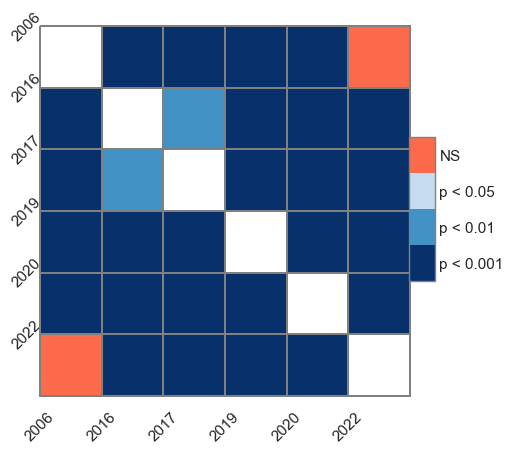

In [69]:
statistical_test(dataframes, 'CV_Red')

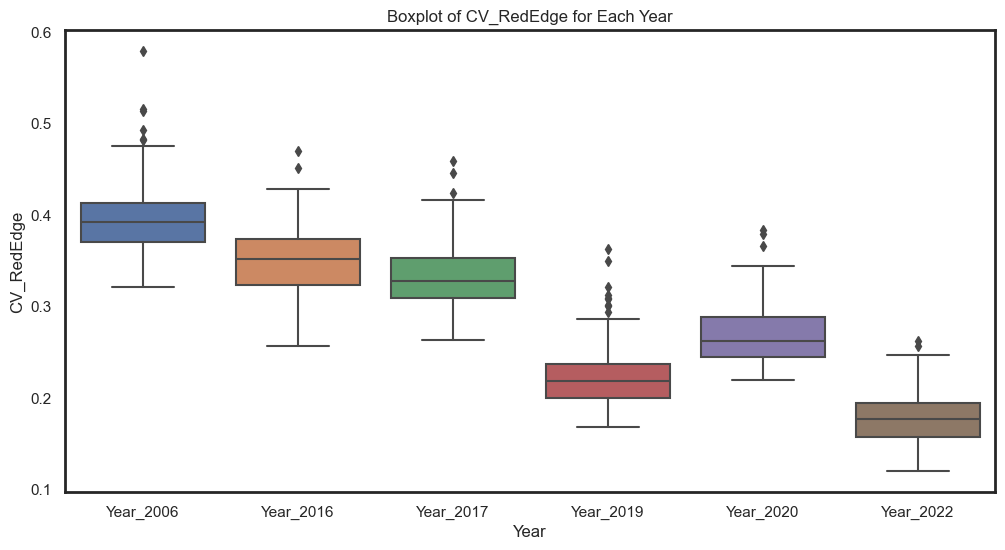

In [70]:
# Example usage
dataframes = [df1, df2, df3, df4, df5, df6]
create_boxplots(dataframes, 'CV_RedEdge')

Kruskal-Wallis Test - Statistic: 730.7637817291347, p-value: 1.0937725555784196e-155
One-way ANOVA - Statistic: 799.7922499295222, p-value: 2.3e-322
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  1.945400e-20  1.838126e-27  1.201143e-51  2.175187e-50   
2  1.945400e-20  1.000000e+00  3.745790e-05  1.478955e-48  1.638438e-39   
3  1.838126e-27  3.745790e-05  1.000000e+00  8.543913e-39  6.302613e-28   
4  1.201143e-51  1.478955e-48  8.543913e-39  1.000000e+00  2.218665e-25   
5  2.175187e-50  1.638438e-39  6.302613e-28  2.218665e-25  1.000000e+00   
6  5.303067e-52  5.513957e-52  1.057326e-42  3.864900e-27  8.891034e-49   

              6  
1  5.303067e-52  
2  5.513957e-52  
3  1.057326e-42  
4  3.864900e-27  
5  8.891034e-49  
6  1.000000e+00  


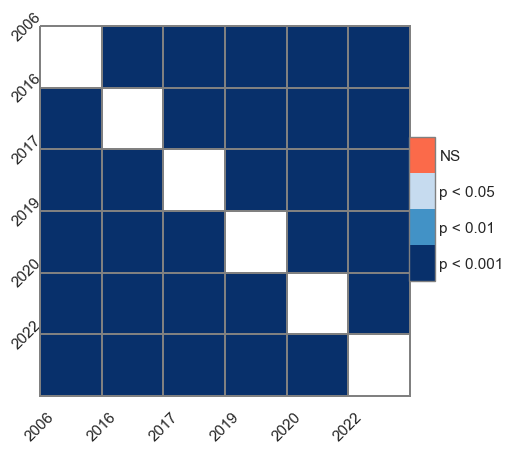

In [71]:
statistical_test(dataframes, 'CV_RedEdge')

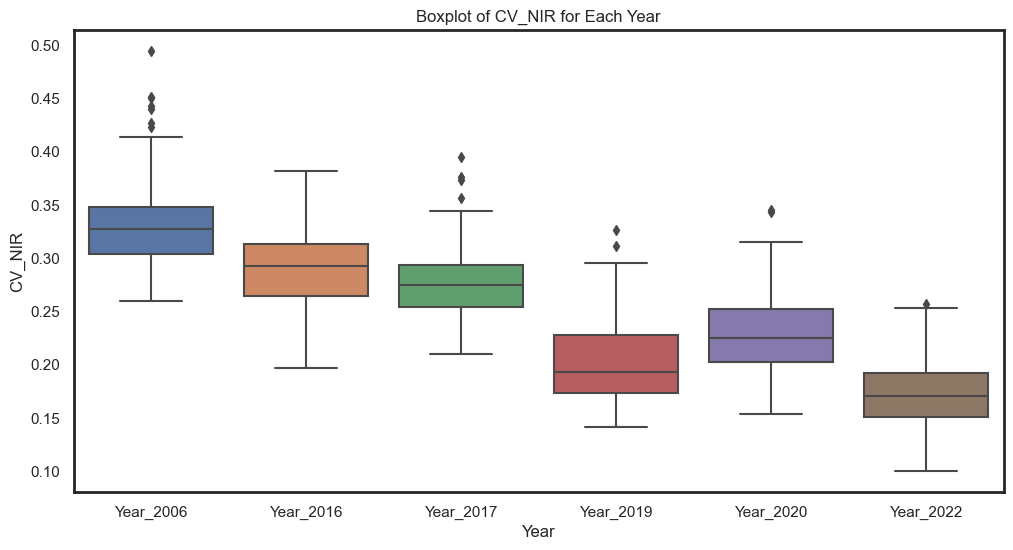

In [72]:
# Example usage
dataframes = [df1, df2, df3, df4, df5, df6]
create_boxplots(dataframes, 'CV_NIR')

Kruskal-Wallis Test - Statistic: 627.1115002118058, p-value: 2.8014304653400057e-133
One-way ANOVA - Statistic: 400.63184203834084, p-value: 8.05485991200066e-223
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  1.283333e-18  9.981666e-24  8.299756e-50  1.743566e-45   
2  1.283333e-18  1.000000e+00  5.718808e-04  3.370473e-40  3.800291e-28   
3  9.981666e-24  5.718808e-04  1.000000e+00  3.602982e-30  3.989890e-18   
4  8.299756e-50  3.370473e-40  3.602982e-30  1.000000e+00  3.648261e-11   
5  1.743566e-45  3.800291e-28  3.989890e-18  3.648261e-11  1.000000e+00   
6  5.303067e-52  1.727630e-50  1.351107e-41  2.988556e-11  3.842942e-33   

              6  
1  5.303067e-52  
2  1.727630e-50  
3  1.351107e-41  
4  2.988556e-11  
5  3.842942e-33  
6  1.000000e+00  


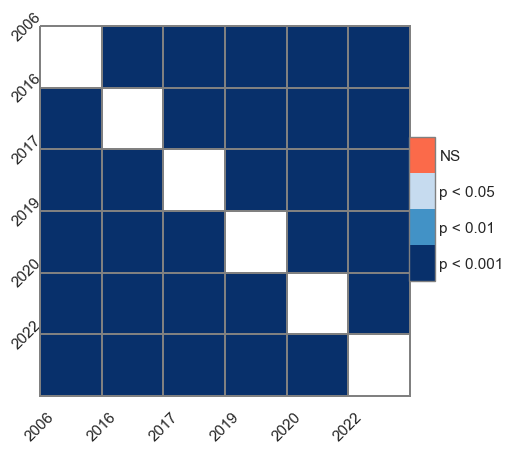

In [73]:
statistical_test(dataframes, 'CV_NIR')

# 11.Difference Vegetation Index (DVI)

DVI=𝑁𝐼𝑅-𝑅𝑒𝑑 

Biomass, leaf water content, chlorophyll content (Tucker, 1979) 

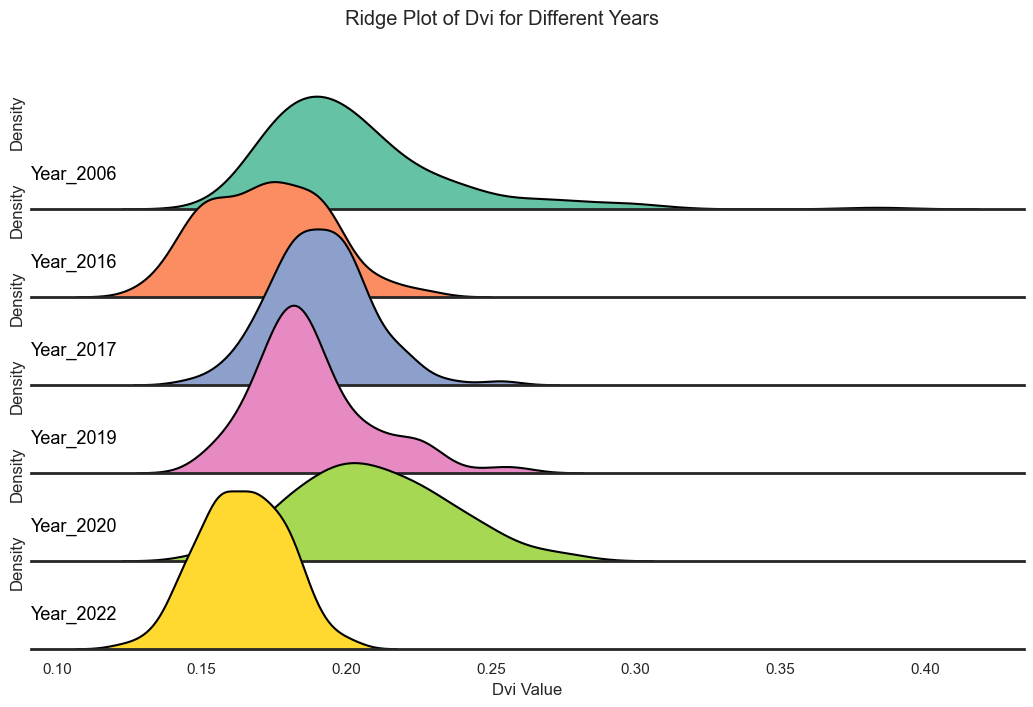

In [12]:
plot_ridge_histograms(dataframes, 'DVI', years)

Kruskal-Wallis Test - Statistic: 334.14130638898723, p-value: 4.536747576331534e-70
One-way ANOVA - Statistic: 87.89994832074387, p-value: 7.546044139953705e-75
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  8.785420e-21  7.950731e-03  2.811199e-06  1.633518e-03   
2  8.785420e-21  1.000000e+00  2.800258e-12  4.150900e-09  9.385056e-29   
3  7.950731e-03  2.800258e-12  1.000000e+00  4.254320e-02  3.027463e-09   
4  2.811199e-06  4.150900e-09  4.254320e-02  1.000000e+00  9.741947e-14   
5  1.633518e-03  9.385056e-29  3.027463e-09  9.741947e-14  1.000000e+00   
6  1.945455e-36  3.101289e-04  3.940889e-26  1.891839e-24  2.313885e-40   

              6  
1  1.945455e-36  
2  3.101289e-04  
3  3.940889e-26  
4  1.891839e-24  
5  2.313885e-40  
6  1.000000e+00  


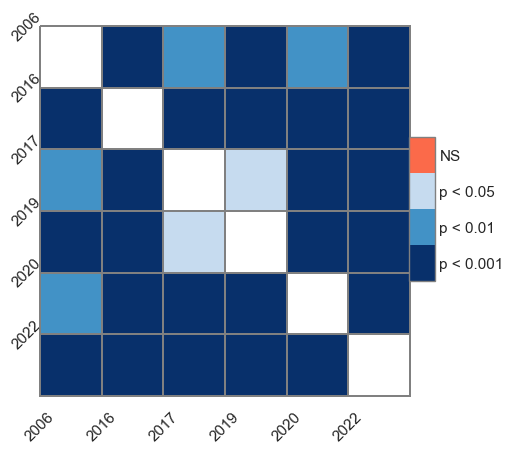

In [74]:
statistical_test(dataframes, 'DVI')

# 12. Green Difference Vegetation Index (GDVI)
GDVI=𝑁𝐼𝑅-𝐺𝑟𝑒𝑒𝑛 

Biomass, leaf water content, chlorophyll content (Tucker, 1979) 

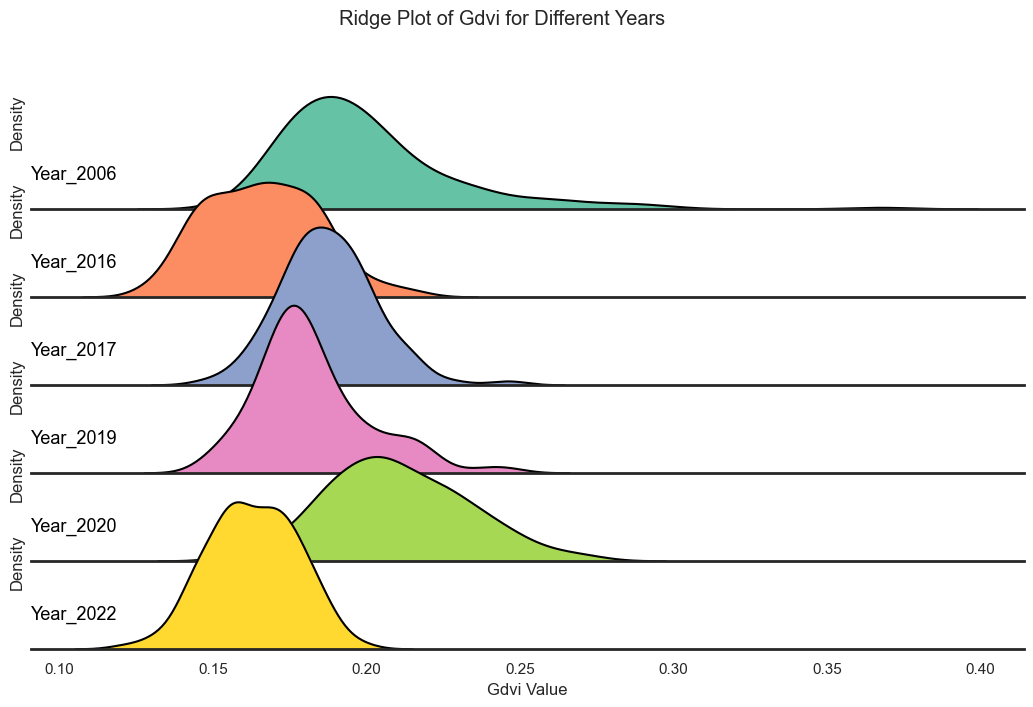

In [13]:
plot_ridge_histograms(dataframes, 'GDVI', years)

Kruskal-Wallis Test - Statistic: 412.66110198901333, p-value: 5.535320738636372e-87
One-way ANOVA - Statistic: 123.70443177370612, p-value: 6.431084415777262e-99
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  2.599947e-29  7.051963e-04  7.315101e-11  1.146981e-06   
2  2.599947e-29  1.000000e+00  9.482249e-18  8.560174e-12  2.394451e-40   
3  7.051963e-04  9.482249e-18  1.000000e+00  1.037546e-03  5.492240e-16   
4  7.315101e-11  8.560174e-12  1.037546e-03  1.000000e+00  1.794652e-24   
5  1.146981e-06  2.394451e-40  5.492240e-16  1.794652e-24  1.000000e+00   
6  1.164257e-37  1.885641e-01  2.247375e-25  4.836503e-19  1.650894e-45   

              6  
1  1.164257e-37  
2  1.885641e-01  
3  2.247375e-25  
4  4.836503e-19  
5  1.650894e-45  
6  1.000000e+00  


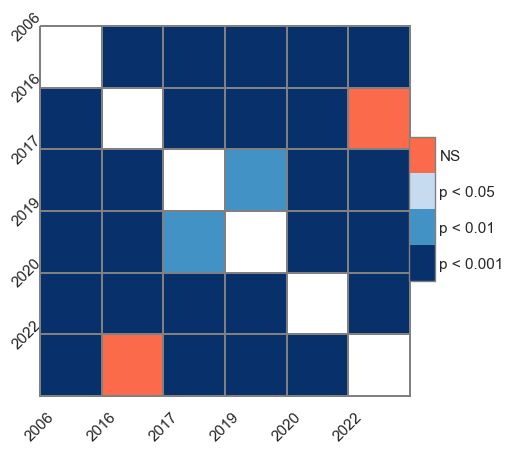

In [75]:
statistical_test(dataframes, 'GDVI')

# 13. Ratio Vegetation Index / Green Ratio Vegetation Index 	

RVI=GRVI =𝑁𝐼𝑅/𝐺𝑟𝑒𝑒𝑛 

Monitoring N status in rice (Xue et al., 2004); 

Optimum nitrogen requirement of corn (Sripada et al., 2006)


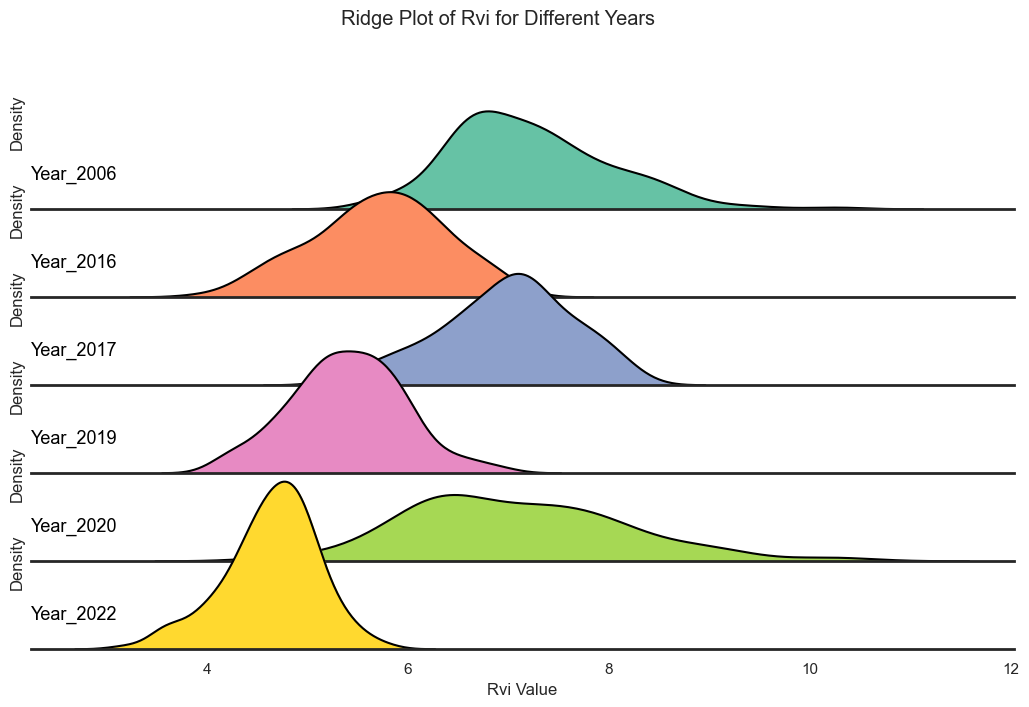

In [14]:
plot_ridge_histograms(dataframes, 'RVI', years)

Kruskal-Wallis Test - Statistic: 614.275099545508, p-value: 1.6647131085702308e-130
One-way ANOVA - Statistic: 322.4928220870763, p-value: 2.9679907159302774e-195
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  2.110369e-41  5.582904e-02  2.551254e-48  8.557657e-02   
2  2.110369e-41  1.000000e+00  1.737190e-29  7.805456e-06  2.489292e-29   
3  5.582904e-02  1.737190e-29  1.000000e+00  1.330130e-36  7.709162e-01   
4  2.551254e-48  7.805456e-06  1.330130e-36  1.000000e+00  1.337095e-39   
5  8.557657e-02  2.489292e-29  7.709162e-01  1.337095e-39  1.000000e+00   
6  5.513957e-52  2.430772e-34  1.460802e-42  6.462289e-27  3.380385e-50   

              6  
1  5.513957e-52  
2  2.430772e-34  
3  1.460802e-42  
4  6.462289e-27  
5  3.380385e-50  
6  1.000000e+00  


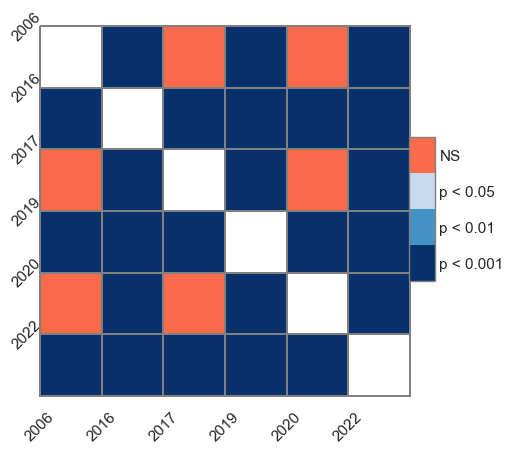

In [76]:
statistical_test(dataframes, 'RVI')

# 14. Wide-range Dynamic Vegetation Index 

$WDRVI = \frac{{0.05 \cdot NIR - Red}}{{0.05 \cdot NIR + Red}}$

Sugar beet LAI, fresh root weight and fresh weight of leaves (Cao et al., 2020) 


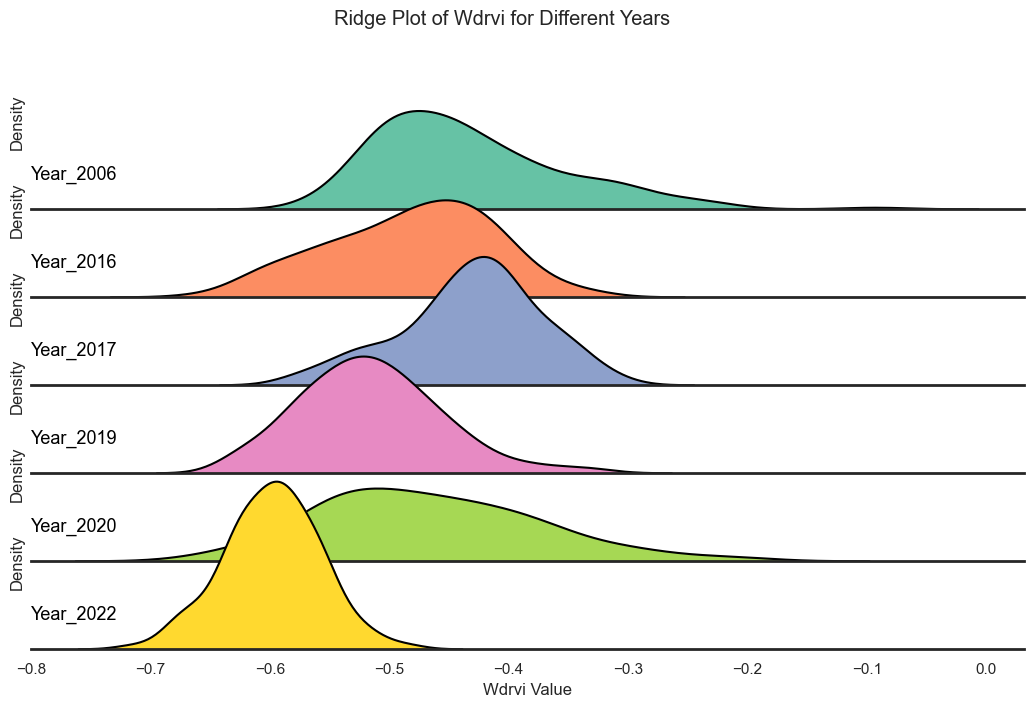

In [15]:
plot_ridge_histograms(dataframes, 'WDRVI', years)

Kruskal-Wallis Test - Statistic: 387.9421267604239, p-value: 1.1769576682978674e-81
One-way ANOVA - Statistic: 123.0121647840536, p-value: 1.76185056155096e-98
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  2.624269e-06  2.042281e-01  2.974063e-21  3.338710e-04   
2  2.624269e-06  1.000000e+00  5.289514e-09  2.105588e-06  3.210184e-01   
3  2.042281e-01  5.289514e-09  1.000000e+00  2.511766e-21  6.606125e-05   
4  2.974063e-21  2.105588e-06  2.511766e-21  1.000000e+00  9.563511e-07   
5  3.338710e-04  3.210184e-01  6.606125e-05  9.563511e-07  1.000000e+00   
6  1.222336e-50  1.274955e-36  7.579386e-41  3.794788e-31  2.696842e-37   

              6  
1  1.222336e-50  
2  1.274955e-36  
3  7.579386e-41  
4  3.794788e-31  
5  2.696842e-37  
6  1.000000e+00  


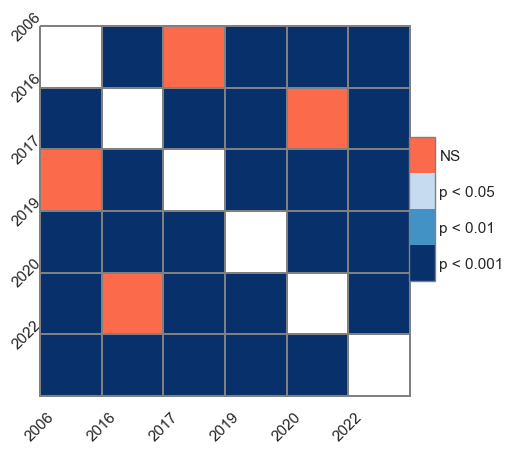

In [77]:
statistical_test(dataframes, 'WDRVI')

# 15. Green Soil Adjusted Vegetation Index (GSAVI)
This index was originally designed with color-infrared photography to predict nitrogren requirements for corn. It is similar to SAVI, but it substitutes the green band for red.

$ GSAVI = 1.5 \cdot \frac{{NIR - Green}}{{NIR + Green + 0.5}} $

Reference: Sripada, R., et al. "Determining In-Season Nitrogen Requirements for Corn Using Aerial Color-Infrared Photography." Ph.D. dissertation, North Carolina State University, 2005.

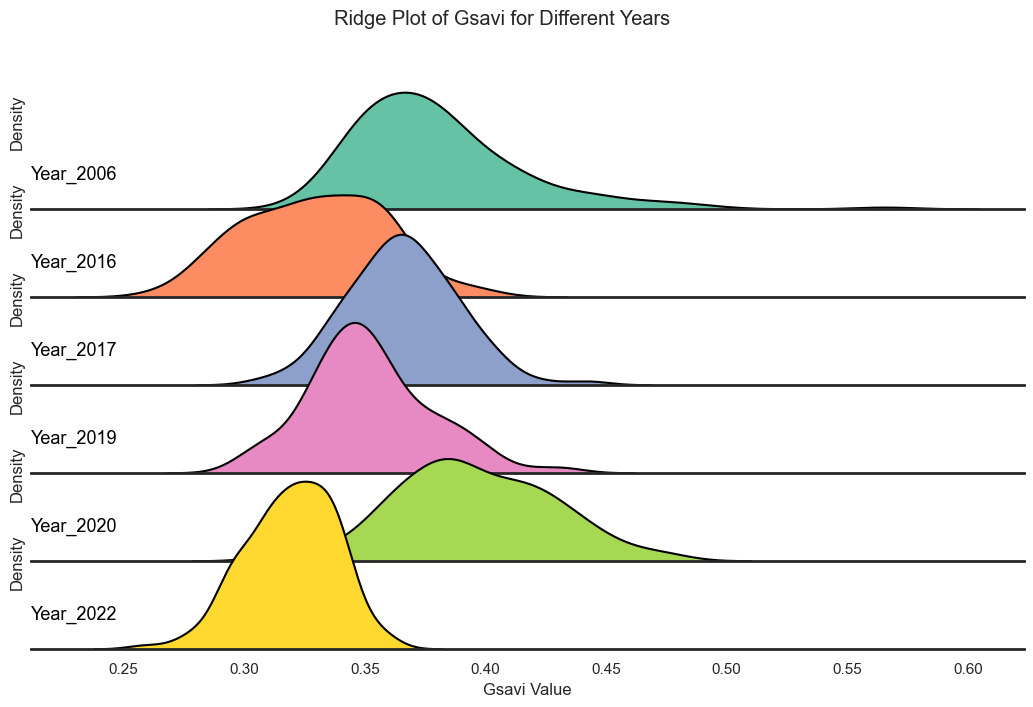

In [16]:
plot_ridge_histograms(dataframes, 'GSAVI', years)

Kruskal-Wallis Test - Statistic: 473.12110695529964, p-value: 5.047602692888189e-100
One-way ANOVA - Statistic: 165.74331860575487, p-value: 9.083073610597367e-124
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  3.077158e-31  3.323659e-03  1.144839e-14  8.559085e-07   
2  3.077158e-31  1.000000e+00  2.552689e-20  4.369964e-10  1.759250e-40   
3  3.323659e-03  2.552689e-20  1.000000e+00  1.807938e-06  9.058319e-14   
4  1.144839e-14  4.369964e-10  1.807938e-06  1.000000e+00  2.615483e-27   
5  8.559085e-07  1.759250e-40  9.058319e-14  2.615483e-27  1.000000e+00   
6  1.594279e-47  6.474816e-04  8.608879e-35  3.092427e-27  2.195277e-48   

              6  
1  1.594279e-47  
2  6.474816e-04  
3  8.608879e-35  
4  3.092427e-27  
5  2.195277e-48  
6  1.000000e+00  


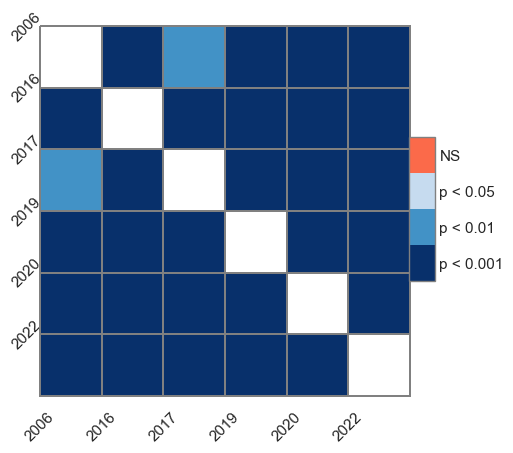

In [78]:
statistical_test(dataframes, 'GSAVI')

# 16. Infrared Percentage Vegetation Index (IPVI)

This index is functionally the same as NDVI, but it is computationally faster. Values range from 0 to 1.

IPVI=NIR/(NIR+Red)

Reference: Crippen, R. "Calculating the Vegetation Index Faster." Remote Sensing of Environment 34 (1990): 71-73.


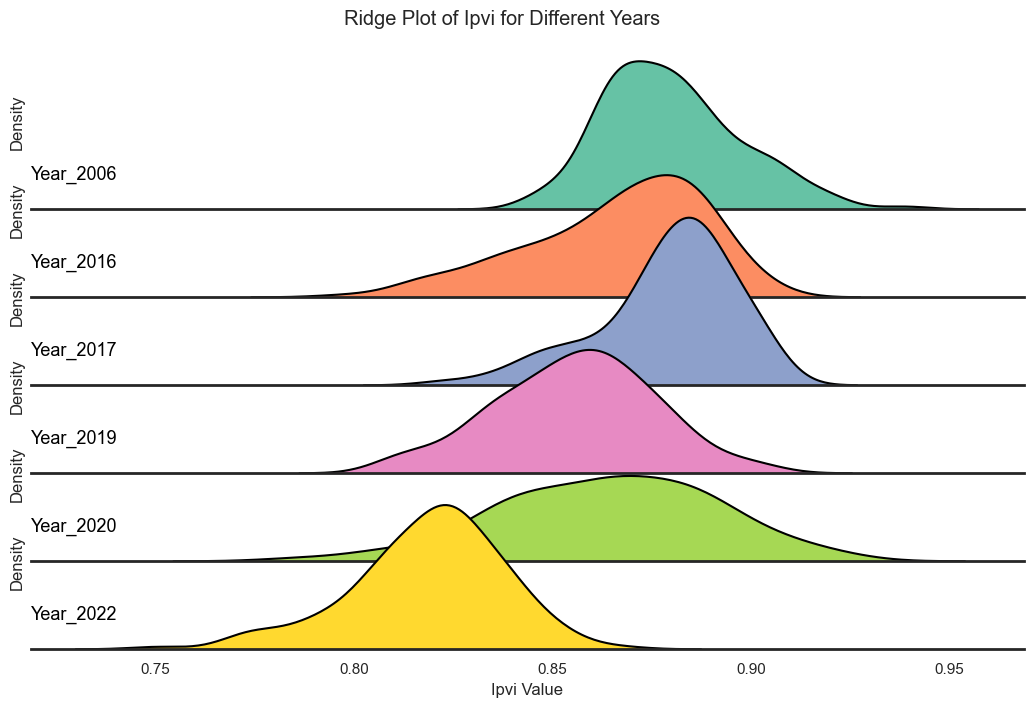

In [17]:
plot_ridge_histograms(dataframes, 'IPVI', years)

Kruskal-Wallis Test - Statistic: 398.6610410940839, p-value: 5.765585043143552e-84
One-way ANOVA - Statistic: 172.27923841890527, p-value: 2.350175745033753e-127
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  5.240838e-06  4.366459e-01  8.500870e-23  1.081549e-07   
2  5.240838e-06  1.000000e+00  1.382641e-06  9.196695e-07  3.105248e-01   
3  4.366459e-01  1.382641e-06  1.000000e+00  2.206416e-18  6.575522e-07   
4  8.500870e-23  9.196695e-07  2.206416e-18  1.000000e+00  1.676968e-03   
5  1.081549e-07  3.105248e-01  6.575522e-07  1.676968e-03  1.000000e+00   
6  1.913946e-51  1.206111e-40  9.936789e-41  7.442108e-36  1.452163e-36   

              6  
1  1.913946e-51  
2  1.206111e-40  
3  9.936789e-41  
4  7.442108e-36  
5  1.452163e-36  
6  1.000000e+00  


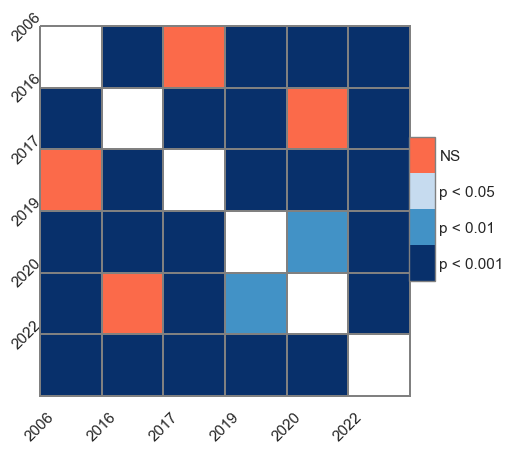

In [79]:
statistical_test(dataframes, 'IPVI')

# 17. Modified Soil Adjusted Vegetation Index 2 (MSAVI2)
This index is a simpler version of the MSAVI index proposed by Qi, et al (1994), which improves upon the Soil Adjusted Vegetation Index (SAVI). It reduces soil noise and increases the dynamic range of the vegetation signal. MSAVI2 is based on an inductive method that does not use a constant L value (as with SAVI) to highlight healthy vegetation.


$ MSAVI2 = \frac{{2 \cdot NIR + 1 - \sqrt{{(2 \cdot NIR + 1)^2 - 8 \cdot (NIR - Red)}}}}{2} $


Reference: Qi, J., A. Chehbouni, A. Huete, Y. Kerr, and S. Sorooshian. "A Modified Soil Adjusted Vegetation Index." Remote Sensing of Environment 48 (1994): 119-126.

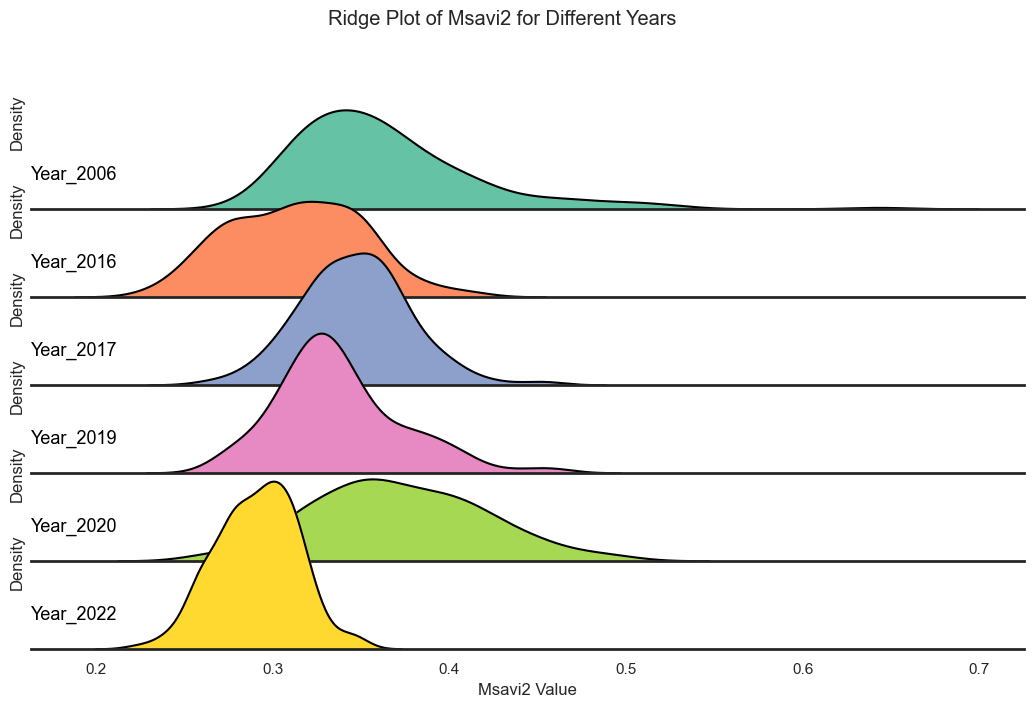

In [18]:
plot_ridge_histograms(dataframes, 'MSAVI2', years)

Kruskal-Wallis Test - Statistic: 347.1264829977363, p-value: 7.273447144168619e-73
One-way ANOVA - Statistic: 92.22081499901758, p-value: 6.409327527172174e-78
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  1.157993e-18  3.844079e-02  8.392718e-07  2.136634e-02   
2  1.157993e-18  1.000000e+00  6.056494e-12  6.756506e-07  1.951178e-23   
3  3.844079e-02  6.056494e-12  1.000000e+00  4.273649e-03  8.392490e-06   
4  8.392718e-07  6.756506e-07  4.273649e-03  1.000000e+00  1.221397e-11   
5  2.136634e-02  1.951178e-23  8.392490e-06  1.221397e-11  1.000000e+00   
6  7.733109e-43  2.912180e-08  2.084863e-32  9.147987e-31  1.320572e-41   

              6  
1  7.733109e-43  
2  2.912180e-08  
3  2.084863e-32  
4  9.147987e-31  
5  1.320572e-41  
6  1.000000e+00  


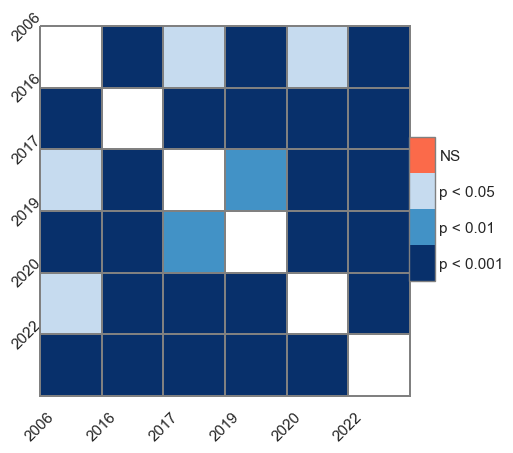

In [80]:
statistical_test(dataframes, 'MSAVI2')

# 18. Non-Linear Index (NLI)
This index assumes that the relationship between many vegetation indices and surface biophysical parameters is non-linear. It linearizes relationships with surface parameters that tend to be non-linear.

NLI=(NIR^2-Red)/(NIR^2+Red)

Reference: Goel, N., and W. Qin. "Influences of Canopy Architecture on Relationships Between Various Vegetation Indices and LAI and Fpar: A Computer Simulation." Remote Sensing Reviews 10 (1994): 309-347.

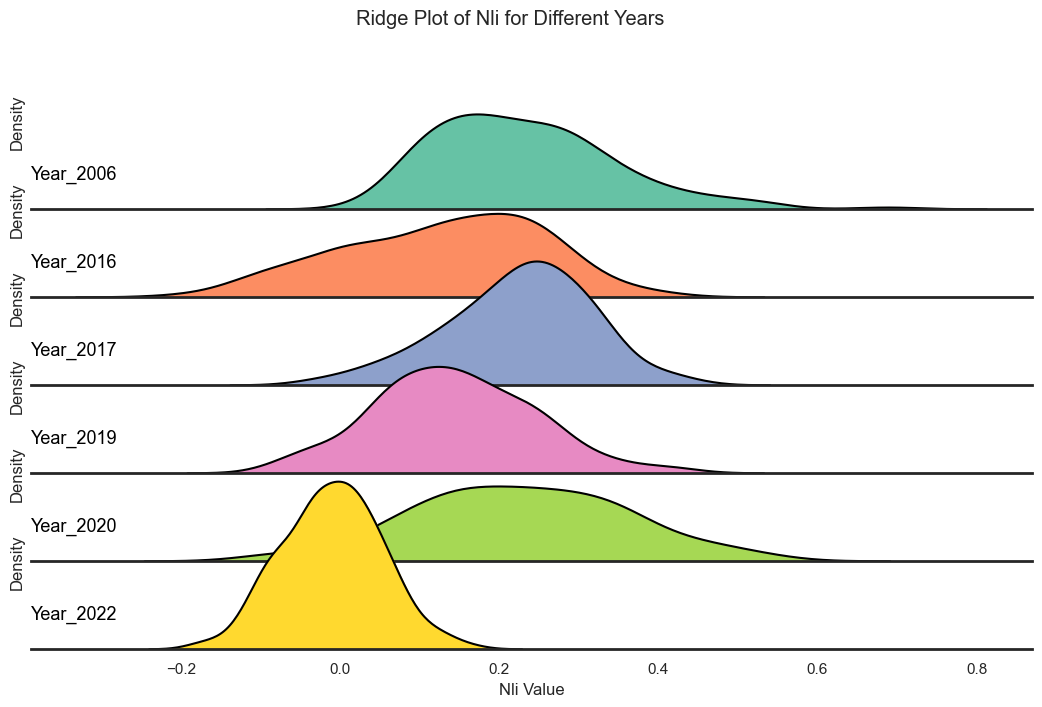

In [19]:
plot_ridge_histograms(dataframes, 'NLI', years)

Kruskal-Wallis Test - Statistic: 356.4158010461383, p-value: 7.272718219131658e-75
One-way ANOVA - Statistic: 114.93247598246965, p-value: 2.6927941458880576e-93
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  1.108600e-10  8.188057e-01  2.221940e-11  9.423631e-01   
2  1.108600e-10  1.000000e+00  5.342746e-10  5.896303e-01  2.369634e-09   
3  8.188057e-01  5.342746e-10  1.000000e+00  1.192450e-10  9.324588e-01   
4  2.221940e-11  5.896303e-01  1.192450e-10  1.000000e+00  4.150900e-09   
5  9.423631e-01  2.369634e-09  9.324588e-01  4.150900e-09  1.000000e+00   
6  7.689999e-50  1.182169e-22  4.038681e-39  4.687810e-35  1.649243e-42   

              6  
1  7.689999e-50  
2  1.182169e-22  
3  4.038681e-39  
4  4.687810e-35  
5  1.649243e-42  
6  1.000000e+00  


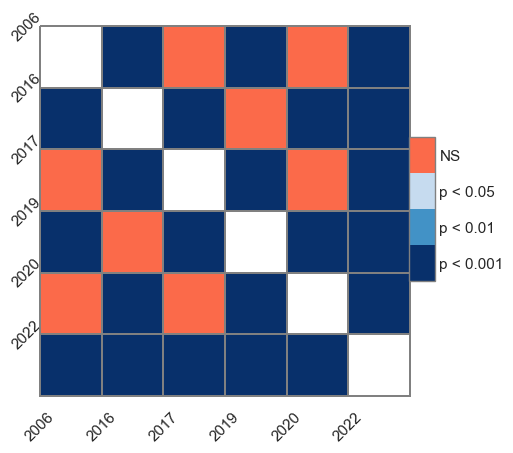

In [81]:
statistical_test(dataframes, 'NLI')

# 19. Soil Adjusted Vegetation Index (SAVI)
This index is similar to NDVI, but it suppresses the effects of soil pixels. It uses a canopy background adjustment factor, L, which is a function of vegetation density and often requires prior knowledge of vegetation amounts. Huete (1988) suggests an optimal value of L=0.5 to account for first-order soil background variations. This index is best used in areas with relatively sparse vegetation where soil is visible through the canopy.

$ SAVI = \frac{{1.5 \cdot (NIR - Red)}}{{NIR + Red + 0.5}} \$

Reference: Huete, A. "A Soil-Adjusted Vegetation Index (SAVI)." Remote Sensing of Environment 25 (1988)

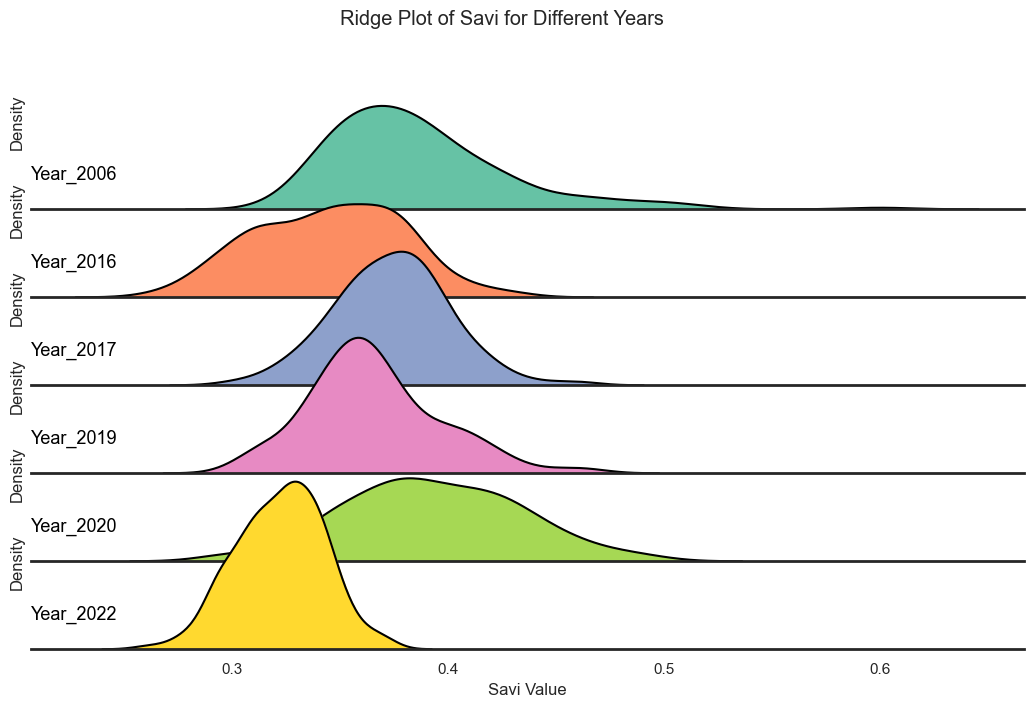

In [20]:
plot_ridge_histograms(dataframes, 'SAVI', years)

Kruskal-Wallis Test - Statistic: 349.1496837859513, p-value: 2.6679150022457125e-73
One-way ANOVA - Statistic: 97.69690367514296, p-value: 9.647227513338863e-82
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  1.833199e-17  8.048151e-02  3.144943e-06  2.584668e-02   
2  1.833199e-17  1.000000e+00  2.496585e-11  1.686158e-06  9.576840e-22   
3  8.048151e-02  2.496585e-11  1.000000e+00  4.625067e-03  4.791633e-05   
4  3.144943e-06  1.686158e-06  4.625067e-03  1.000000e+00  1.196069e-10   
5  2.584668e-02  9.576840e-22  4.791633e-05  1.196069e-10  1.000000e+00   
6  9.241345e-45  3.648757e-10  9.609832e-34  6.799682e-33  5.925247e-42   

              6  
1  9.241345e-45  
2  3.648757e-10  
3  9.609832e-34  
4  6.799682e-33  
5  5.925247e-42  
6  1.000000e+00  


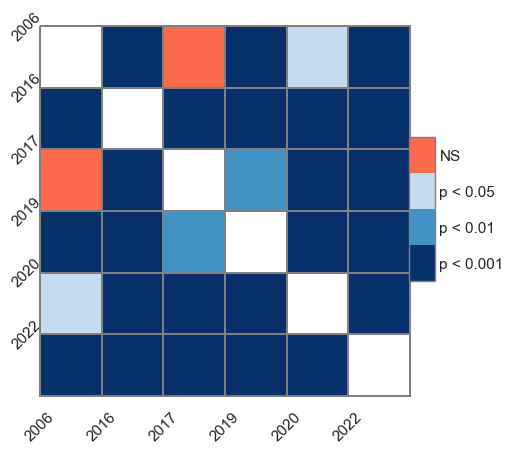

In [82]:
statistical_test(dataframes, 'SAVI')

# 20. Transformed Difference Vegetation Index (TDVI)

$ TDVI = 1.5 \cdot \frac{{NIR - Red}}{{\sqrt{NIR^2 + Red + 0.5}}} \$

This index is useful for monitoring vegetation cover in urban environments. It does not saturate like NDVI and SAVI.

Reference: Bannari, A., H. Asalhi, and P. Teillet. "Transformed Difference Vegetation Index (TDVI) for Vegetation Cover Mapping" In Proceedings of the Geoscience and Remote Sensing Symposium, IGARSS '02, IEEE International, Volume 5 (2002).



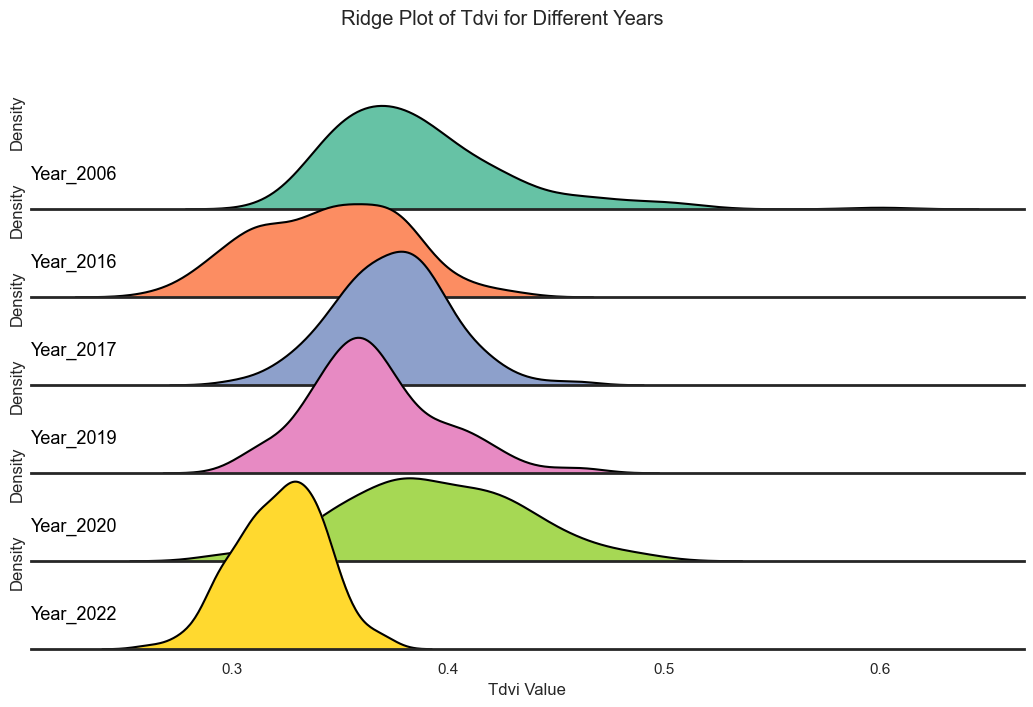

In [21]:
plot_ridge_histograms(dataframes, 'TDVI', years)

Kruskal-Wallis Test - Statistic: 349.1496837859513, p-value: 2.6679150022457125e-73
One-way ANOVA - Statistic: 97.69689956024057, p-value: 9.64729068317016e-82
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  1.833199e-17  8.048151e-02  3.144943e-06  2.584668e-02   
2  1.833199e-17  1.000000e+00  2.496585e-11  1.686158e-06  9.576840e-22   
3  8.048151e-02  2.496585e-11  1.000000e+00  4.625067e-03  4.791633e-05   
4  3.144943e-06  1.686158e-06  4.625067e-03  1.000000e+00  1.196069e-10   
5  2.584668e-02  9.576840e-22  4.791633e-05  1.196069e-10  1.000000e+00   
6  9.241345e-45  3.648757e-10  9.609832e-34  6.799682e-33  5.925247e-42   

              6  
1  9.241345e-45  
2  3.648757e-10  
3  9.609832e-34  
4  6.799682e-33  
5  5.925247e-42  
6  1.000000e+00  


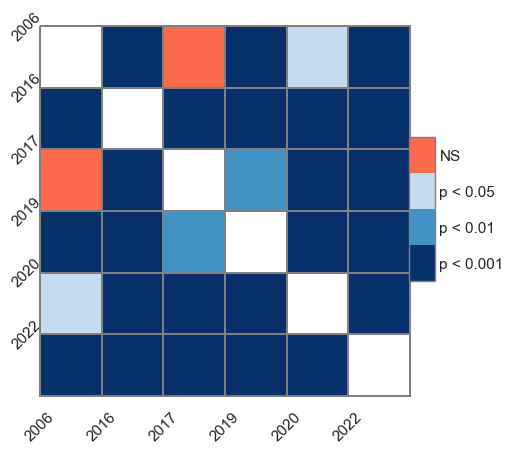

In [83]:
statistical_test(dataframes, 'TDVI')

# 21.Burn Area Index (BAI)

This index highlights burned land in the red to near-infrared spectrum, by emphasizing the charcoal signal in post-fire images. The index is computed from the spectral distance from each pixel to a reference spectral point, where recently burned areas converge. Brighter pixels indicate burned areas.

$BAI = \frac{1}{{(0.1 - Red)^2 + (0.06 - NIR)^2}} $

The data must be calibrated to reflectance before applying the index.

References: Chuvieco, E., M. Pilar Martin, and A. Palacios. “Assessment of Different Spectral Indices in the Red-Near-Infrared Spectral Domain for Burned Land Discrimination.” Remote Sensing of Environment 112 (2002): 2381-2396.
Martín, M. Cartografía e inventario de incendios forestales en la Península Iberica a partir de imágenes NOAA AVHRR. Doctoral thesis, Universidad de Alcalá, Alcalá de Henares (1998).


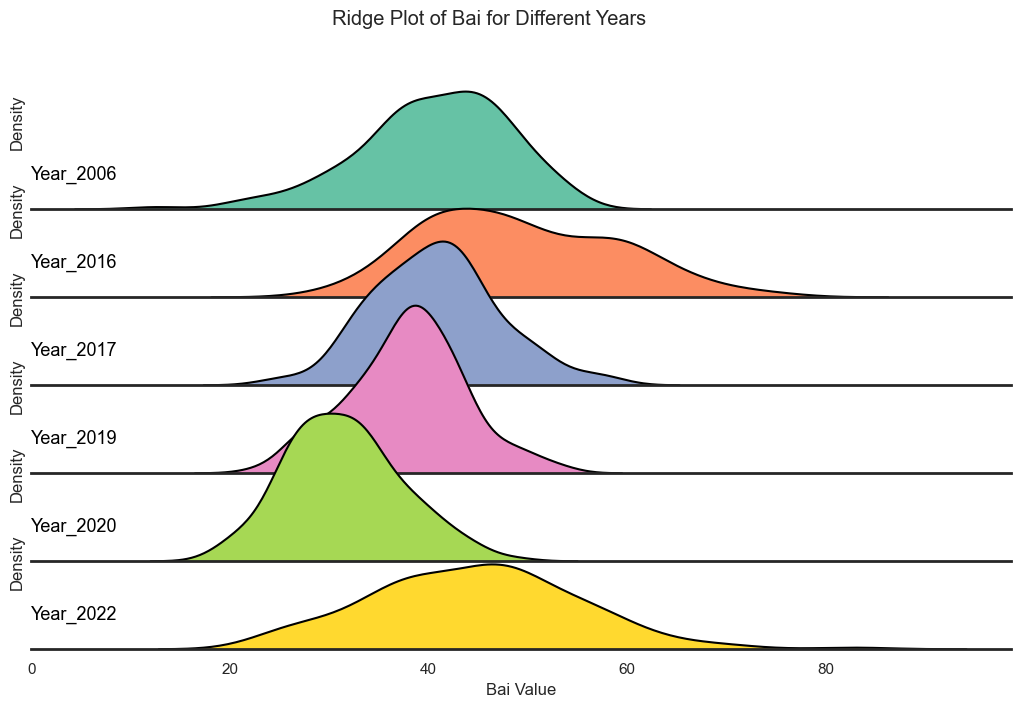

In [11]:
plot_ridge_histograms(dataframes, 'BAI', years)

Kruskal-Wallis Test - Statistic: 302.21524585049383, p-value: 3.3449565683016885e-63
One-way ANOVA - Statistic: 90.06900473929844, p-value: 2.137856033645557e-76
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  2.271741e-13  5.999631e-01  6.177150e-05  4.618775e-24   
2  2.271741e-13  1.000000e+00  1.630373e-12  2.606740e-25  8.298651e-43   
3  5.999631e-01  1.630373e-12  1.000000e+00  3.896671e-04  4.963736e-23   
4  6.177150e-05  2.606740e-25  3.896671e-04  1.000000e+00  1.204192e-17   
5  4.618775e-24  8.298651e-43  4.963736e-23  1.204192e-17  1.000000e+00   
6  4.802793e-04  1.908614e-04  6.275070e-04  1.591636e-10  2.061331e-28   

              6  
1  4.802793e-04  
2  1.908614e-04  
3  6.275070e-04  
4  1.591636e-10  
5  2.061331e-28  
6  1.000000e+00  


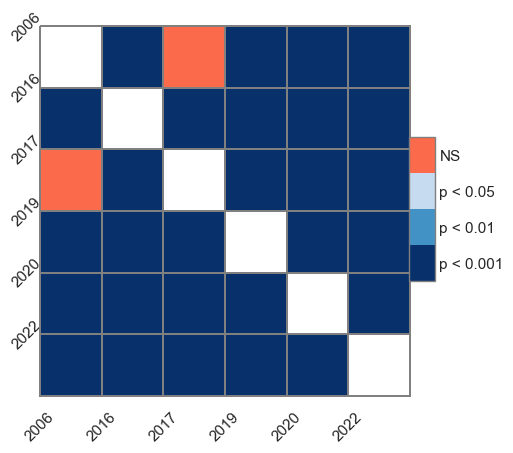

In [84]:
statistical_test(dataframes, 'BAI')

# 22. Advanced Vegetation Index (AVI)

$AVI = \sqrt[3]{{NIR \cdot (1 - Red) \cdot (NIR - Red)}}$

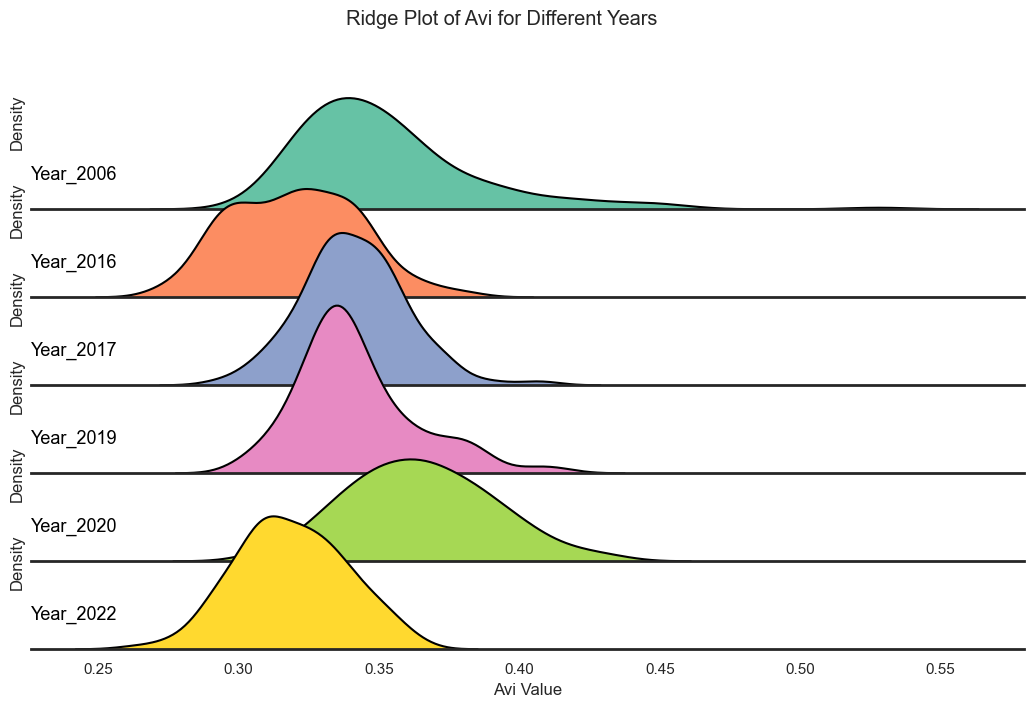

In [22]:
plot_ridge_histograms(dataframes, 'AVI', years)

Kruskal-Wallis Test - Statistic: 307.3436701602077, p-value: 2.640325385760351e-64
One-way ANOVA - Statistic: 85.73081551408663, p-value: 2.74236663014563e-73
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  1.356621e-20  1.591721e-02  3.914543e-03  6.801225e-07   
2  1.356621e-20  1.000000e+00  1.119552e-12  4.875508e-14  1.467668e-34   
3  1.591721e-02  1.119552e-12  1.000000e+00  6.754180e-01  8.499543e-14   
4  3.914543e-03  4.875508e-14  6.754180e-01  1.000000e+00  1.773835e-15   
5  6.801225e-07  1.467668e-34  8.499543e-14  1.773835e-15  1.000000e+00   
6  1.658071e-24  7.301957e-01  1.152171e-15  4.509615e-18  9.392145e-38   

              6  
1  1.658071e-24  
2  7.301957e-01  
3  1.152171e-15  
4  4.509615e-18  
5  9.392145e-38  
6  1.000000e+00  


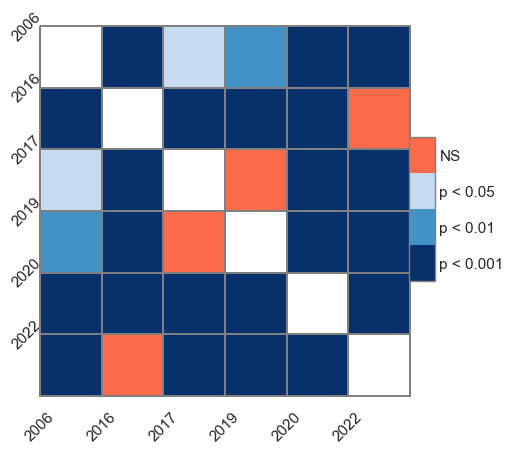

In [85]:
statistical_test(dataframes, 'AVI')

# 23. Chlorophyll Vegetation Index (CVI)

CVI=(NIR*Red)/Green^2

The CVI was developed based on two assumptions: 

Green SR is very sensitive to chlorophyll concentration

Red/Green SR represents the relative density of vegetation and soil

The CVI has a typical range of 0 to infinity, with higher values indicating higher chlorophyll content. The CVI range score ranges from 0 to 10, with 10 indicating the best functional vision. The scores are further divided into three phases: 

Phase I: 0–3

Phase II: 4–7

Phase III: 8–10

Reference: Comparing narrow and broad-band vegetation indices to estimate leaf chlorophyll content in planophile crop canopies. M. Vincini & E. Frazzi 

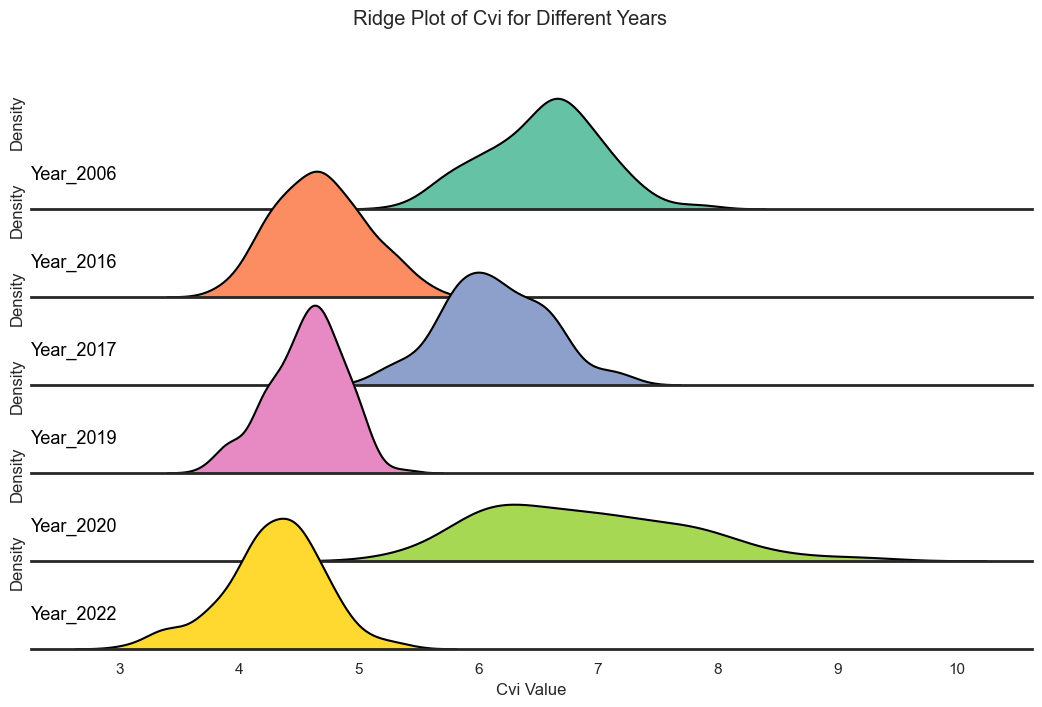

In [23]:
plot_ridge_histograms(dataframes, 'CVI', years)

Kruskal-Wallis Test - Statistic: 687.2516402696078, p-value: 2.8027822931837864e-146
One-way ANOVA - Statistic: 755.2885367464912, p-value: 1.5655795809e-313
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  6.078435e-52  4.880029e-11  5.303067e-52  1.489471e-03   
2  6.078435e-52  1.000000e+00  6.213845e-42  1.555574e-02  1.008356e-51   
3  4.880029e-11  6.213845e-42  1.000000e+00  1.186787e-42  1.308688e-13   
4  5.303067e-52  1.555574e-02  1.186787e-42  1.000000e+00  5.407488e-52   
5  1.489471e-03  1.008356e-51  1.308688e-13  5.407488e-52  1.000000e+00   
6  5.303067e-52  1.984048e-14  1.271911e-42  3.801697e-10  5.513957e-52   

              6  
1  5.303067e-52  
2  1.984048e-14  
3  1.271911e-42  
4  3.801697e-10  
5  5.513957e-52  
6  1.000000e+00  


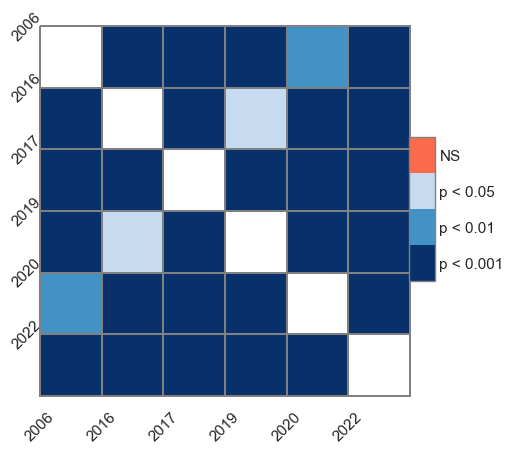

In [86]:
statistical_test(dataframes, 'CVI')

# 24. Disease-Water Stress Index 4 (DSWI4)

DSWI4=Green/Red


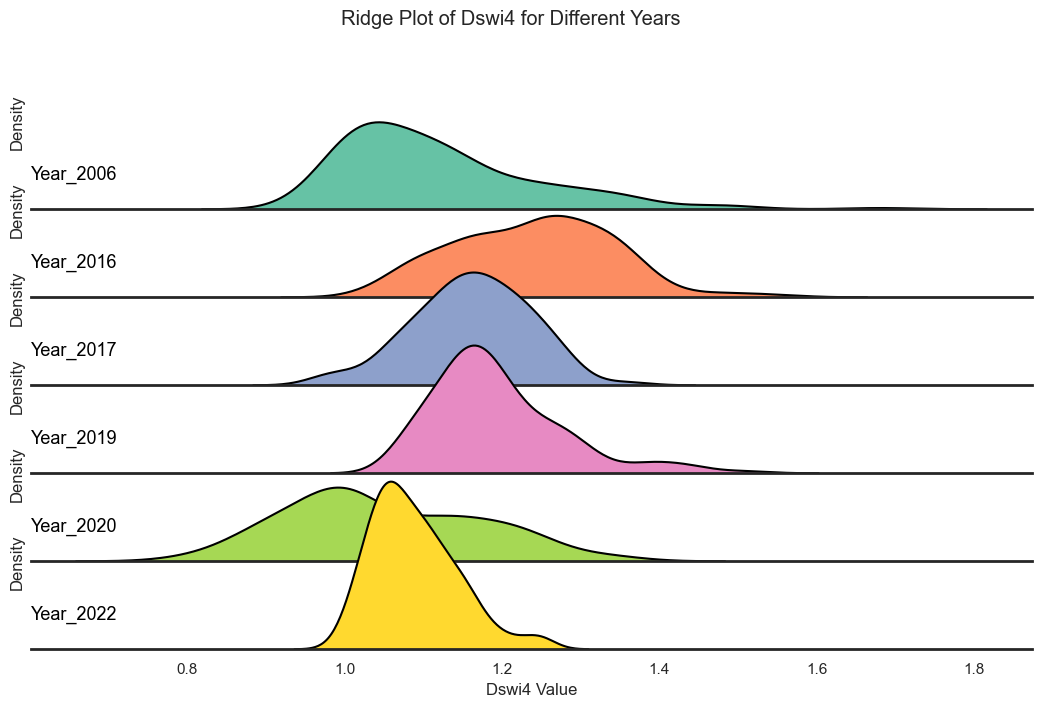

In [24]:
plot_ridge_histograms(dataframes, 'DSWI4', years)

Kruskal-Wallis Test - Statistic: 293.5558070662014, p-value: 2.4319347757451566e-61
One-way ANOVA - Statistic: 79.63377257216214, p-value: 7.823574211236633e-69
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  1.699257e-19  3.090670e-06  3.081271e-13  1.110451e-06   
2  1.699257e-19  1.000000e+00  2.624848e-10  4.471284e-06  1.470818e-30   
3  3.090670e-06  2.624848e-10  1.000000e+00  2.006033e-02  1.028635e-13   
4  3.081271e-13  4.471284e-06  2.006033e-02  1.000000e+00  2.786089e-22   
5  1.110451e-06  1.470818e-30  1.028635e-13  2.786089e-22  1.000000e+00   
6  5.335810e-01  6.240622e-35  1.356885e-15  3.783178e-30  3.136312e-05   

              6  
1  5.335810e-01  
2  6.240622e-35  
3  1.356885e-15  
4  3.783178e-30  
5  3.136312e-05  
6  1.000000e+00  


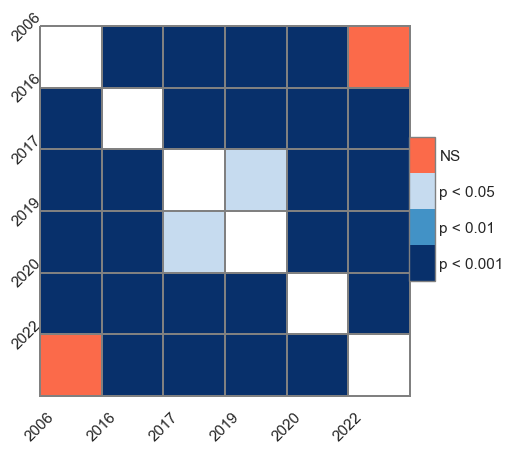

In [87]:
statistical_test(dataframes, 'DSWI4')

# 25. Green-Red Normalized Difference Vegetation Index (GRNDVI)

GRNDVI=(NIR-(Green+Red))/(NIR+(Green+Red))

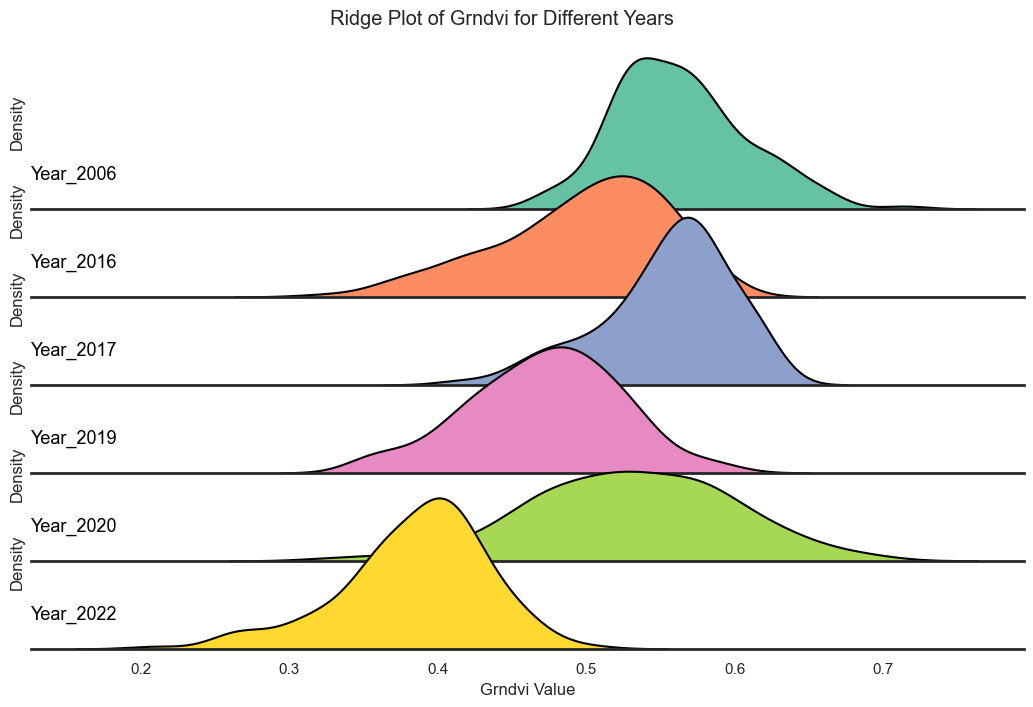

In [25]:
plot_ridge_histograms(dataframes, 'GRNDVI', years)

Kruskal-Wallis Test - Statistic: 485.1690250910492, p-value: 1.268311280986837e-102
One-way ANOVA - Statistic: 232.2652074163489, p-value: 1.9036231097402917e-157
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  1.669865e-21  6.791019e-01  1.787551e-37  7.307556e-06   
2  1.669865e-21  1.000000e+00  9.386198e-16  2.674032e-06  3.189490e-05   
3  6.791019e-01  9.386198e-16  1.000000e+00  2.065023e-26  1.134047e-03   
4  1.787551e-37  2.674032e-06  2.065023e-26  1.000000e+00  7.422751e-15   
5  7.307556e-06  3.189490e-05  1.134047e-03  7.422751e-15  1.000000e+00   
6  6.832229e-52  4.665070e-39  6.967161e-42  2.378386e-33  5.181855e-45   

              6  
1  6.832229e-52  
2  4.665070e-39  
3  6.967161e-42  
4  2.378386e-33  
5  5.181855e-45  
6  1.000000e+00  


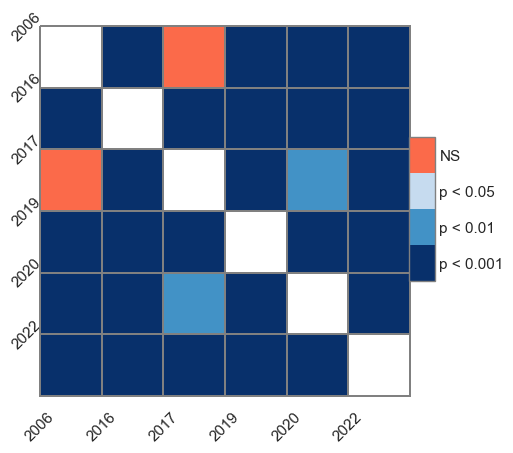

In [88]:
statistical_test(dataframes, 'GRNDVI')

# 26. Modified Chlorophyll Absorption in Reflectance Index 1 (MCARI1)
MCARI1=1.2*(2.5*(NIR-Red)-1.3*(NIR-Green))

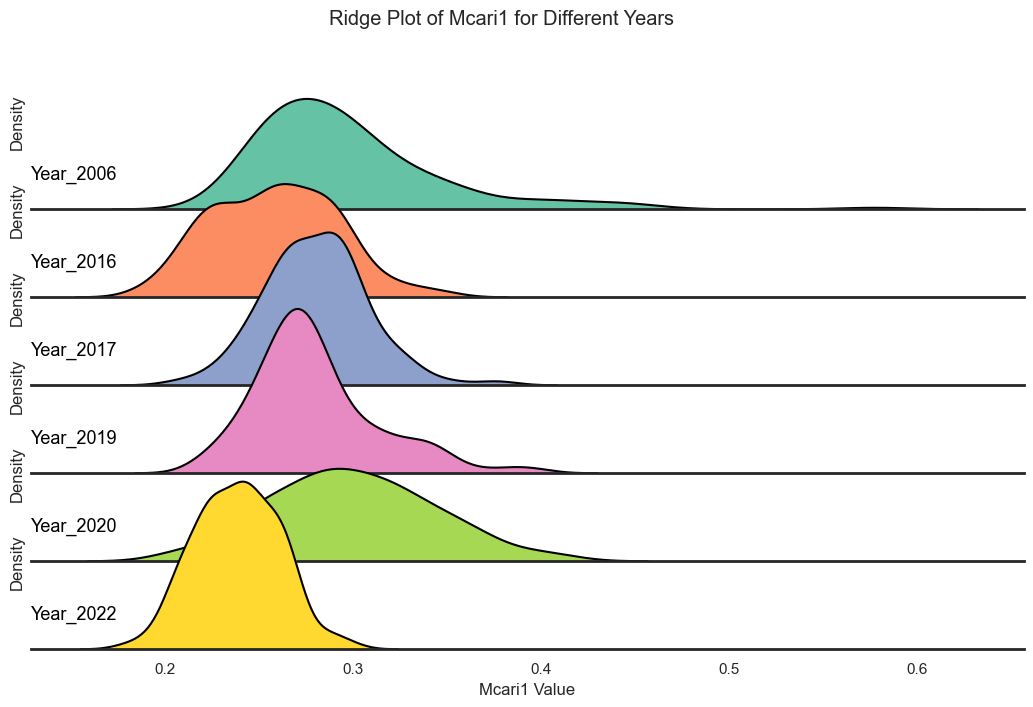

In [26]:
plot_ridge_histograms(dataframes, 'MCARI1', years)

Kruskal-Wallis Test - Statistic: 268.41408831022545, p-value: 6.130458486711739e-56
One-way ANOVA - Statistic: 63.645856425440535, p-value: 1.2333057313995501e-56
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  2.337755e-13  3.766198e-02  3.008532e-03  1.064675e-01   
2  2.337755e-13  1.000000e+00  8.191764e-08  7.409160e-07  1.995024e-16   
3  3.766198e-02  8.191764e-08  1.000000e+00  3.299448e-01  1.076957e-04   
4  3.008532e-03  7.409160e-07  3.299448e-01  1.000000e+00  5.846248e-06   
5  1.064675e-01  1.995024e-16  1.076957e-04  5.846248e-06  1.000000e+00   
6  2.770571e-35  4.070345e-08  3.235943e-26  3.230816e-29  1.492713e-33   

              6  
1  2.770571e-35  
2  4.070345e-08  
3  3.235943e-26  
4  3.230816e-29  
5  1.492713e-33  
6  1.000000e+00  


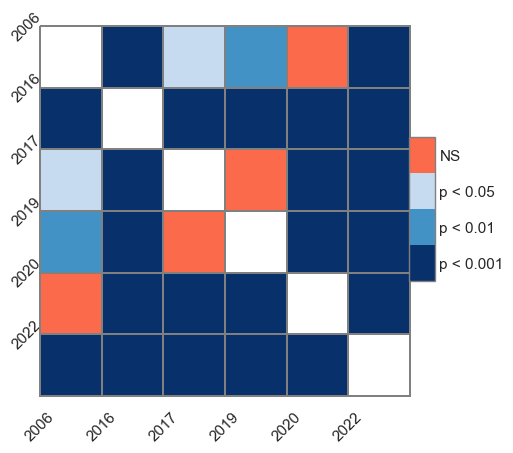

In [89]:
statistical_test(dataframes, 'MCARI1')

# 27.Normalized Green Red Difference Index (NGRDI)
NGRDI=(Green-Red)/(Green+Red)

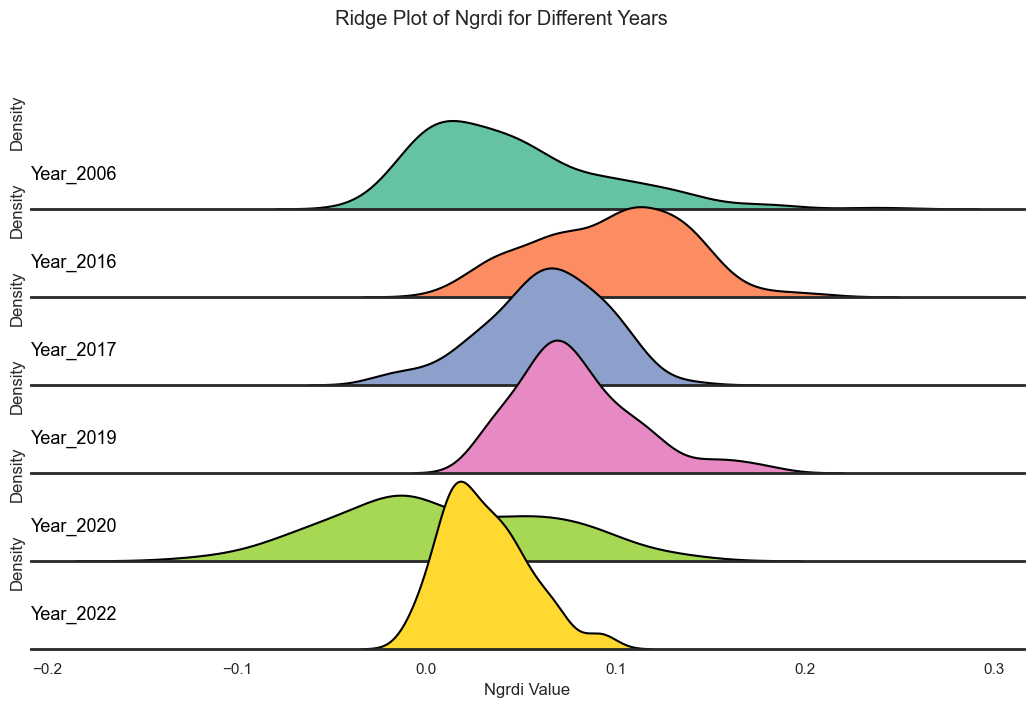

In [27]:
plot_ridge_histograms(dataframes, 'NGRDI', years)

Kruskal-Wallis Test - Statistic: 324.73894460881274, p-value: 4.78586449414572e-68
One-way ANOVA - Statistic: 97.79534882813265, p-value: 8.248610755024855e-82
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  2.797417e-21  7.005586e-06  1.228163e-14  1.589915e-08   
2  2.797417e-21  1.000000e+00  7.224606e-12  4.991475e-06  1.707305e-32   
3  7.005586e-06  7.224606e-12  1.000000e+00  1.554333e-03  1.503529e-14   
4  1.228163e-14  4.991475e-06  1.554333e-03  1.000000e+00  5.893754e-25   
5  1.589915e-08  1.707305e-32  1.503529e-14  5.893754e-25  1.000000e+00   
6  1.541894e-01  1.107981e-37  3.430449e-16  3.226110e-34  2.050592e-05   

              6  
1  1.541894e-01  
2  1.107981e-37  
3  3.430449e-16  
4  3.226110e-34  
5  2.050592e-05  
6  1.000000e+00  


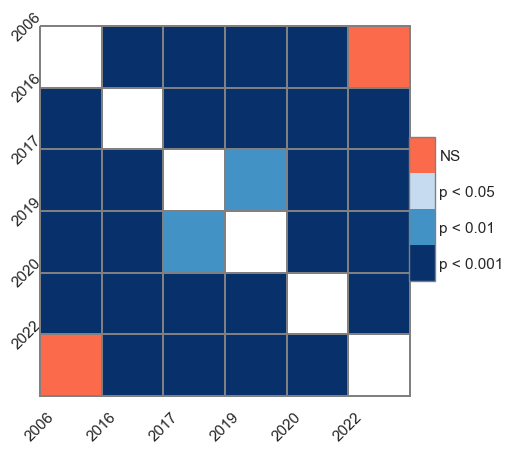

In [90]:
statistical_test(dataframes, 'NGRDI')

# 28. Near-Infrared Reflectance of Vegetation (NIRv)

NIRv=((NIR-Red)/(NIR+Red))*NIR

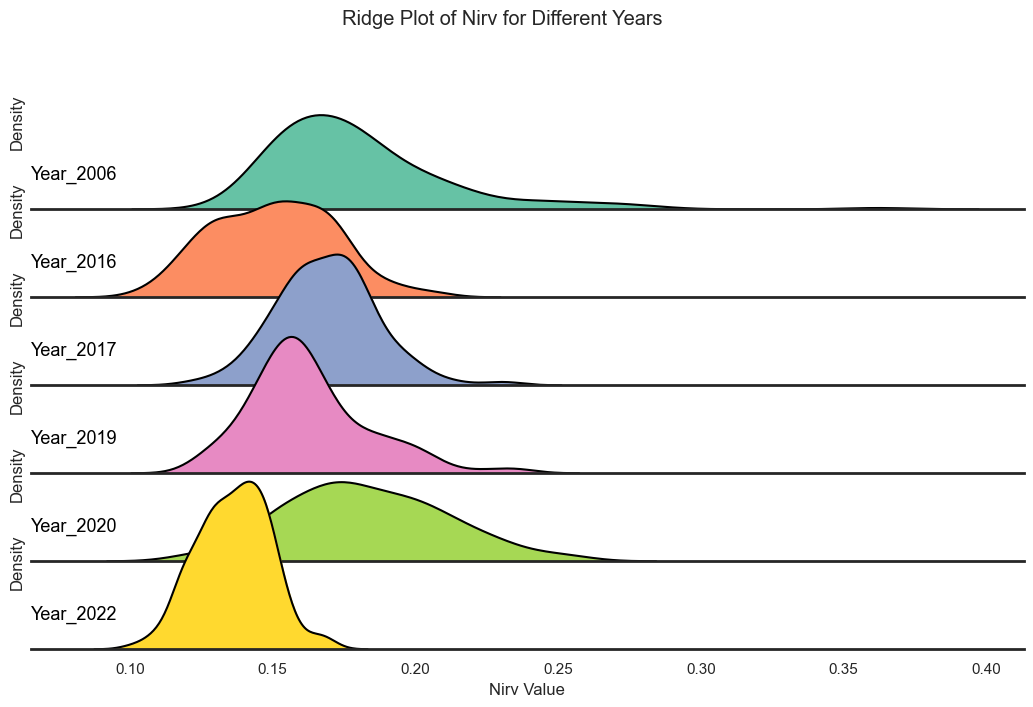

In [28]:
plot_ridge_histograms(dataframes, 'NIRv', years)

Kruskal-Wallis Test - Statistic: 355.73664498509925, p-value: 1.0184461442001717e-74
One-way ANOVA - Statistic: 91.95148111181928, p-value: 9.926559053228416e-78
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  2.411659e-19  1.628712e-02  1.110080e-08  8.057493e-02   
2  2.411659e-19  1.000000e+00  7.571699e-12  1.715868e-05  1.447359e-22   
3  1.628712e-02  7.571699e-12  1.000000e+00  6.236474e-04  2.072947e-05   
4  1.110080e-08  1.715868e-05  6.236474e-04  1.000000e+00  5.619098e-12   
5  8.057493e-02  1.447359e-22  2.072947e-05  5.619098e-12  1.000000e+00   
6  8.913603e-45  3.993498e-10  1.667809e-33  1.427876e-30  5.622833e-42   

              6  
1  8.913603e-45  
2  3.993498e-10  
3  1.667809e-33  
4  1.427876e-30  
5  5.622833e-42  
6  1.000000e+00  


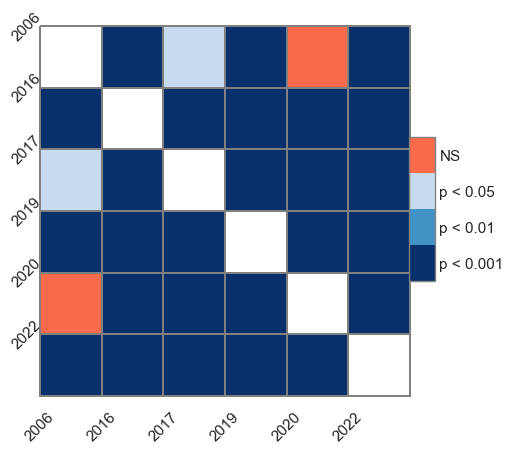

In [91]:
statistical_test(dataframes, 'NIRv')

# 29.Normalized Green (NormG)
NormG=Green/(NIR+Green+Red)

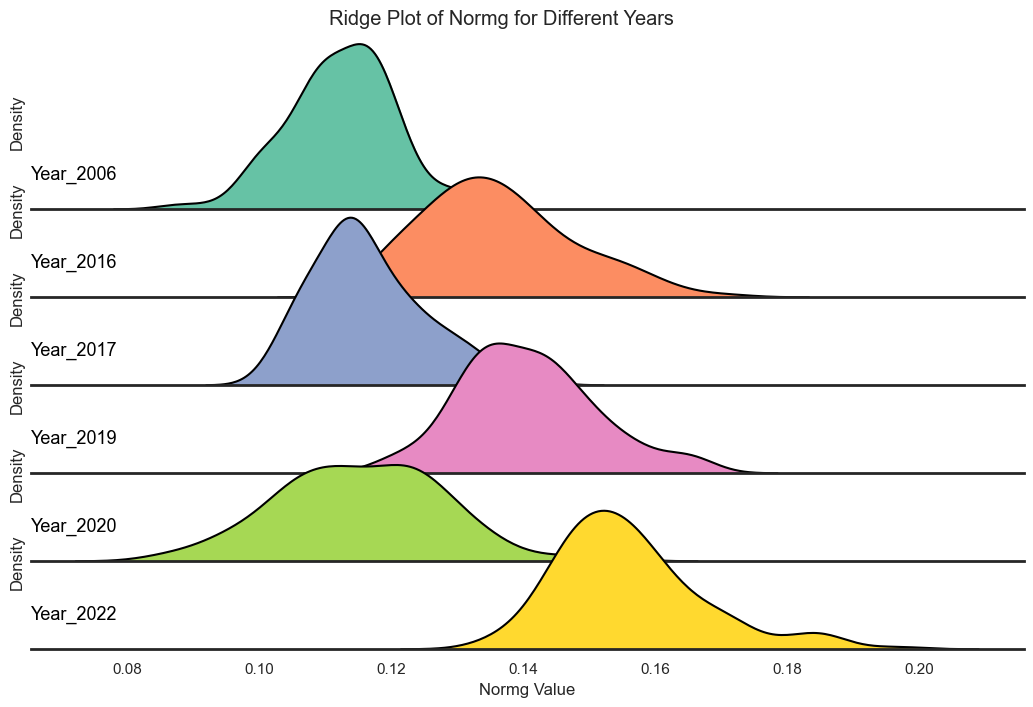

In [29]:
plot_ridge_histograms(dataframes, 'NormG', years)

Kruskal-Wallis Test - Statistic: 634.8432426575182, p-value: 5.97600082798732e-135
One-way ANOVA - Statistic: 411.2819620588381, p-value: 2.765971911147804e-226
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  4.596872e-46  2.286720e-03  4.335332e-50  1.656869e-02   
2  4.596872e-46  1.000000e+00  3.696048e-31  9.783895e-05  5.740002e-33   
3  2.286720e-03  3.696048e-31  1.000000e+00  1.969283e-37  5.597638e-01   
4  4.335332e-50  9.783895e-05  1.969283e-37  1.000000e+00  1.415653e-41   
5  1.656869e-02  5.740002e-33  5.597638e-01  1.415653e-41  1.000000e+00   
6  5.303067e-52  9.209986e-34  1.427486e-42  4.828325e-27  1.630885e-50   

              6  
1  5.303067e-52  
2  9.209986e-34  
3  1.427486e-42  
4  4.828325e-27  
5  1.630885e-50  
6  1.000000e+00  


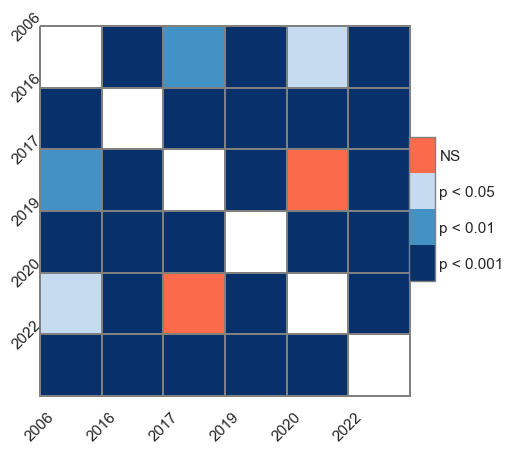

In [92]:
statistical_test(dataframes, 'NormG')

# 30. Normalized NIR (NormNIR)

NormNIR=NIR/(NIR+Green+Red)

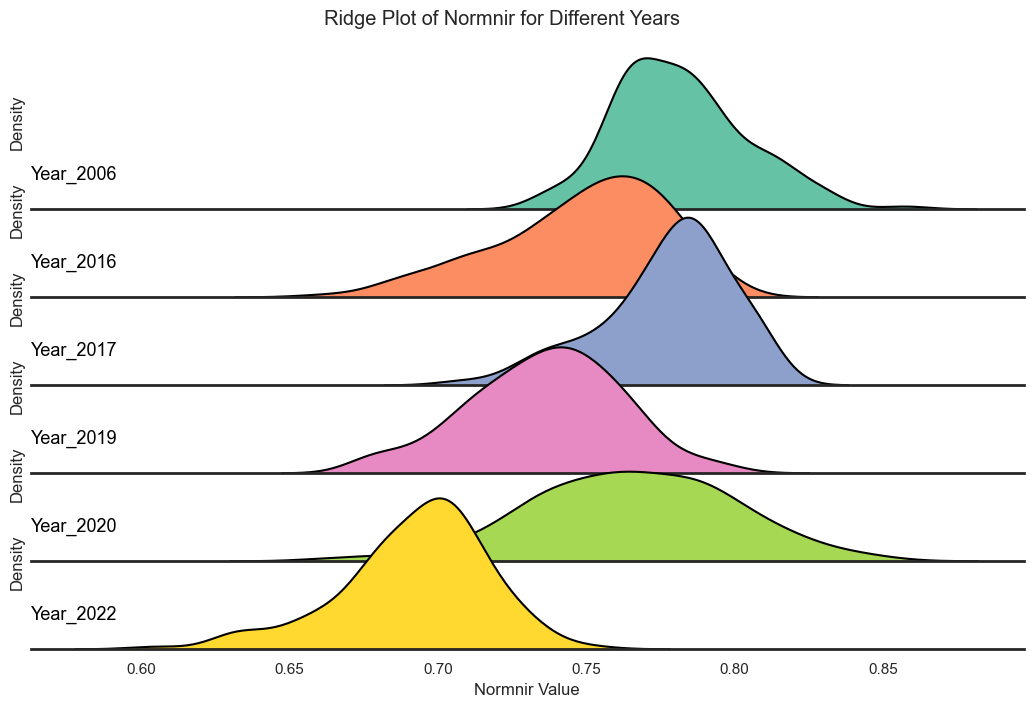

In [30]:
plot_ridge_histograms(dataframes, 'NormNIR', years)

Kruskal-Wallis Test - Statistic: 485.1684823453752, p-value: 1.2686533928640929e-102
One-way ANOVA - Statistic: 232.26521372481542, p-value: 1.9036102845417195e-157
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  1.669865e-21  6.803315e-01  1.787551e-37  7.307556e-06   
2  1.669865e-21  1.000000e+00  9.386198e-16  2.674032e-06  3.189490e-05   
3  6.803315e-01  9.386198e-16  1.000000e+00  2.065023e-26  1.134047e-03   
4  1.787551e-37  2.674032e-06  2.065023e-26  1.000000e+00  7.422751e-15   
5  7.307556e-06  3.189490e-05  1.134047e-03  7.422751e-15  1.000000e+00   
6  6.832229e-52  4.665070e-39  6.967161e-42  2.378386e-33  5.181855e-45   

              6  
1  6.832229e-52  
2  4.665070e-39  
3  6.967161e-42  
4  2.378386e-33  
5  5.181855e-45  
6  1.000000e+00  


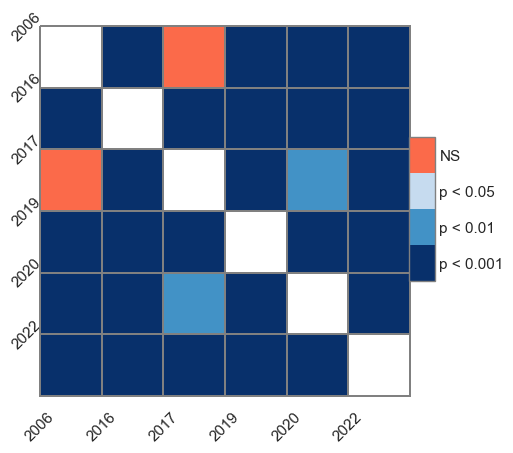

In [93]:
statistical_test(dataframes, 'NormNIR')

# 31. Normalized Red (NormR)

NormR=Red/(NIR+Green+Red)

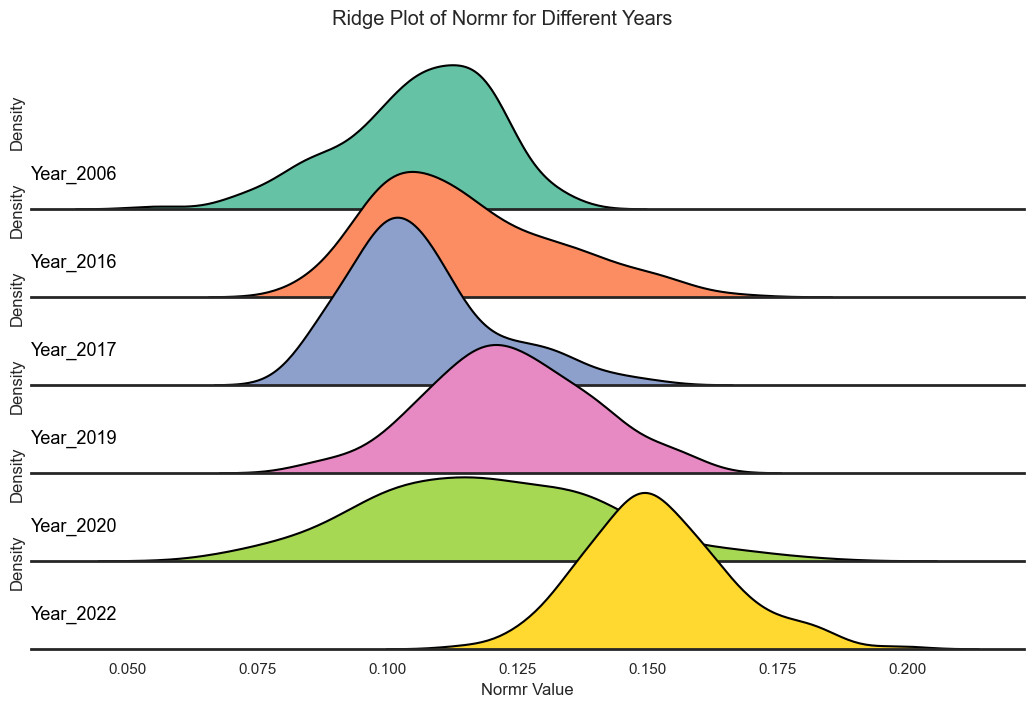

In [31]:
plot_ridge_histograms(dataframes, 'NormR', years)

Kruskal-Wallis Test - Statistic: 380.50220055175896, p-value: 4.718143360585238e-80
One-way ANOVA - Statistic: 153.59311320790502, p-value: 6.494037186272457e-117
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  7.448546e-04  2.922938e-01  1.056778e-18  1.120188e-07   
2  7.448546e-04  1.000000e+00  5.491060e-05  6.801225e-07  4.611578e-02   
3  2.922938e-01  5.491060e-05  1.000000e+00  1.072805e-16  2.199884e-07   
4  1.056778e-18  6.801225e-07  1.072805e-16  1.000000e+00  4.299444e-02   
5  1.120188e-07  4.611578e-02  2.199884e-07  4.299444e-02  1.000000e+00   
6  3.994470e-51  8.262366e-41  2.389325e-40  2.563071e-36  4.216163e-33   

              6  
1  3.994470e-51  
2  8.262366e-41  
3  2.389325e-40  
4  2.563071e-36  
5  4.216163e-33  
6  1.000000e+00  


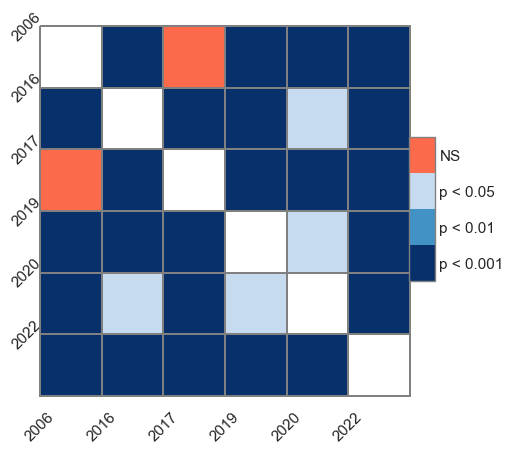

In [94]:
statistical_test(dataframes, 'NormR')

# 32.Red-Green Ratio Index, RGRI
RGRI=Red/Green

Assessment of rice leaf chlorophyll content using visible bands at different growth stages at both the leaf and canopy scale
Author links open overlay panelM.M. Saberioon, M.S.M. Amin a, A.R. Anuar, A. Gholizadeh , A. Wayayok , S. Khairunniza-Bejo 
https://doi.org/10.1016/j.jag.2014.03.018

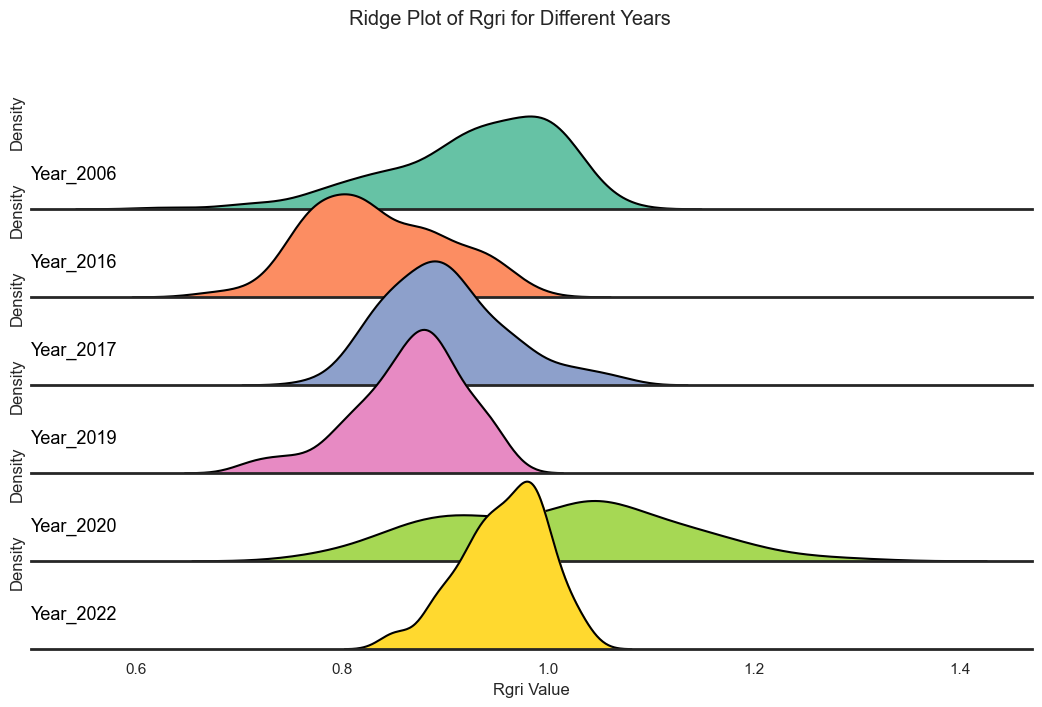

In [32]:
plot_ridge_histograms(dataframes, 'RGRI', years)

Kruskal-Wallis Test - Statistic: 351.3475836717862, p-value: 8.973643123806494e-74
One-way ANOVA - Statistic: 113.5183469776699, p-value: 2.2503954166686415e-92
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  1.503269e-22  3.431448e-05  8.304583e-16  3.172375e-10   
2  1.503269e-22  1.000000e+00  3.189865e-13  6.324527e-06  2.318637e-34   
3  3.431448e-05  3.189865e-13  1.000000e+00  7.713818e-05  2.038682e-15   
4  8.304583e-16  6.324527e-06  7.713818e-05  1.000000e+00  9.004472e-28   
5  3.172375e-10  2.318637e-34  2.038682e-15  9.004472e-28  1.000000e+00   
6  1.896413e-02  1.666407e-39  3.244983e-16  5.732179e-37  5.435642e-06   

              6  
1  1.896413e-02  
2  1.666407e-39  
3  3.244983e-16  
4  5.732179e-37  
5  5.435642e-06  
6  1.000000e+00  


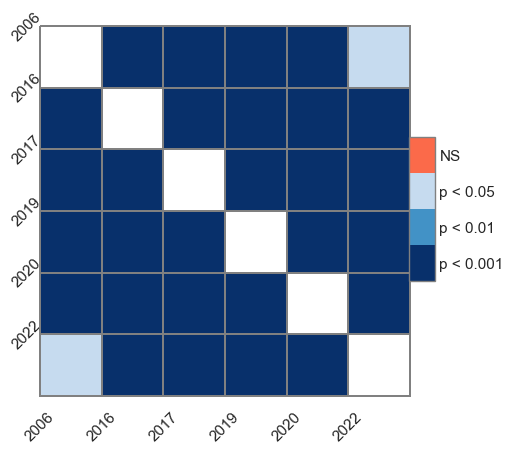

In [95]:
statistical_test(dataframes, 'RGRI')

# 33. Redness Index

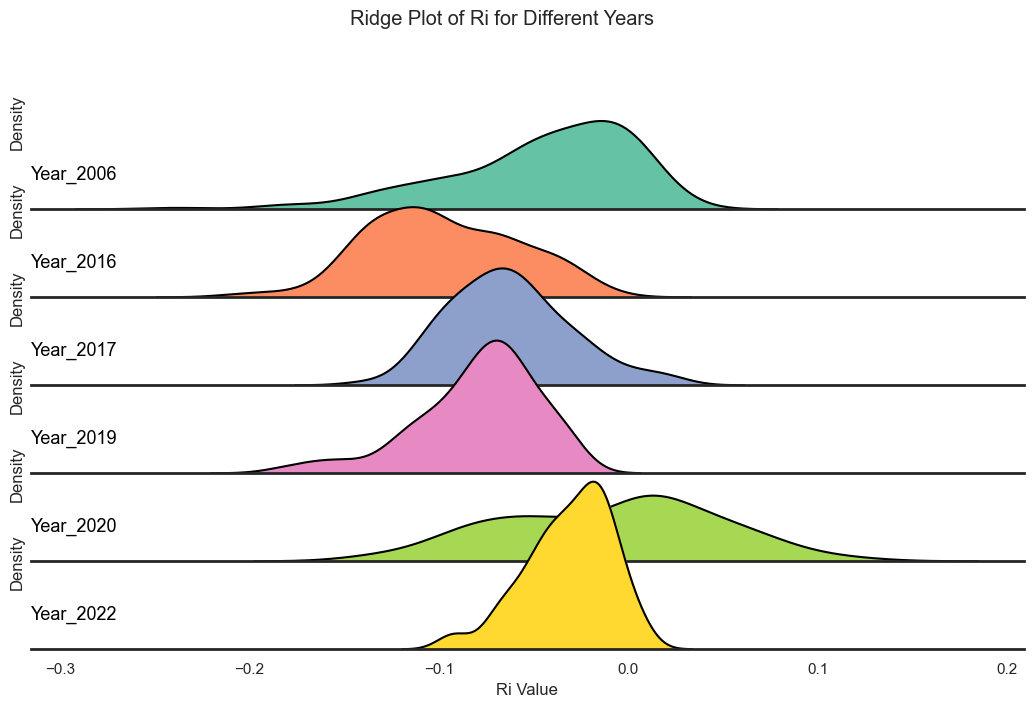

In [33]:
plot_ridge_histograms(dataframes, 'RI', years)

Kruskal-Wallis Test - Statistic: 324.73894460881274, p-value: 4.78586449414572e-68
One-way ANOVA - Statistic: 97.79534882813265, p-value: 8.248610755024855e-82
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  2.797417e-21  7.005586e-06  1.228163e-14  1.589915e-08   
2  2.797417e-21  1.000000e+00  7.224606e-12  4.991475e-06  1.707305e-32   
3  7.005586e-06  7.224606e-12  1.000000e+00  1.554333e-03  1.503529e-14   
4  1.228163e-14  4.991475e-06  1.554333e-03  1.000000e+00  5.893754e-25   
5  1.589915e-08  1.707305e-32  1.503529e-14  5.893754e-25  1.000000e+00   
6  1.541894e-01  1.107981e-37  3.430449e-16  3.226110e-34  2.050592e-05   

              6  
1  1.541894e-01  
2  1.107981e-37  
3  3.430449e-16  
4  3.226110e-34  
5  2.050592e-05  
6  1.000000e+00  


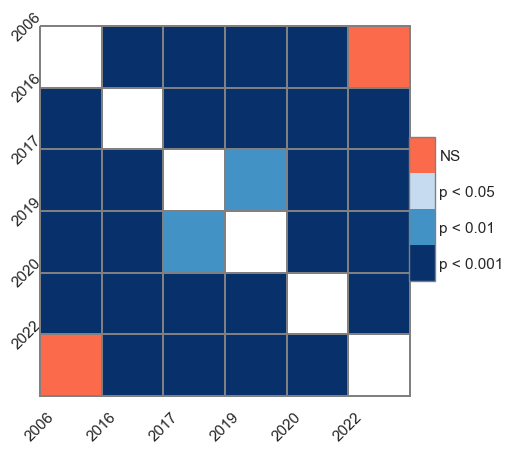

In [96]:
statistical_test(dataframes, 'RI')

# 34. Simple Ratio (800 and 550 nm)

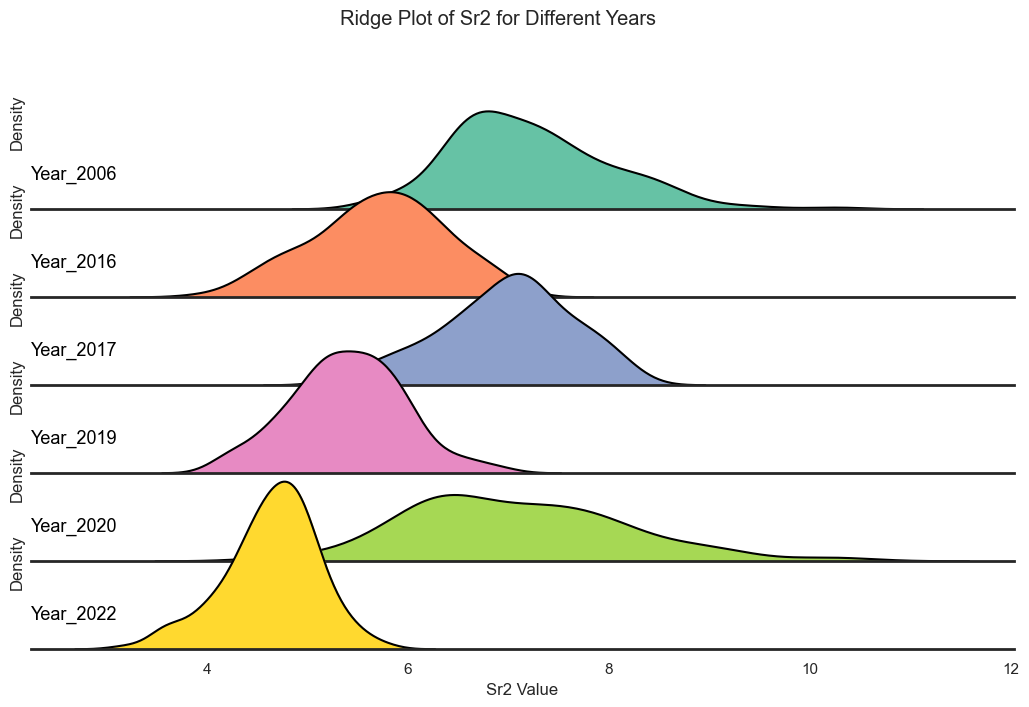

In [34]:
plot_ridge_histograms(dataframes, 'SR2', years)

Kruskal-Wallis Test - Statistic: 614.275099545508, p-value: 1.6647131085702308e-130
One-way ANOVA - Statistic: 322.4928220870763, p-value: 2.9679907159302774e-195
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  2.110369e-41  5.582904e-02  2.551254e-48  8.557657e-02   
2  2.110369e-41  1.000000e+00  1.737190e-29  7.805456e-06  2.489292e-29   
3  5.582904e-02  1.737190e-29  1.000000e+00  1.330130e-36  7.709162e-01   
4  2.551254e-48  7.805456e-06  1.330130e-36  1.000000e+00  1.337095e-39   
5  8.557657e-02  2.489292e-29  7.709162e-01  1.337095e-39  1.000000e+00   
6  5.513957e-52  2.430772e-34  1.460802e-42  6.462289e-27  3.380385e-50   

              6  
1  5.513957e-52  
2  2.430772e-34  
3  1.460802e-42  
4  6.462289e-27  
5  3.380385e-50  
6  1.000000e+00  


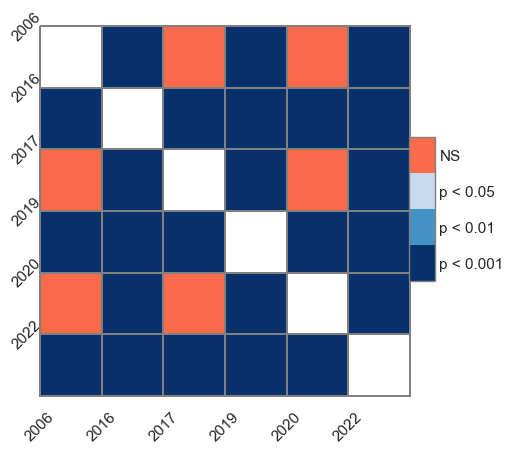

In [97]:
statistical_test(dataframes, 'SR2')

# 35. Vegetation Index Green

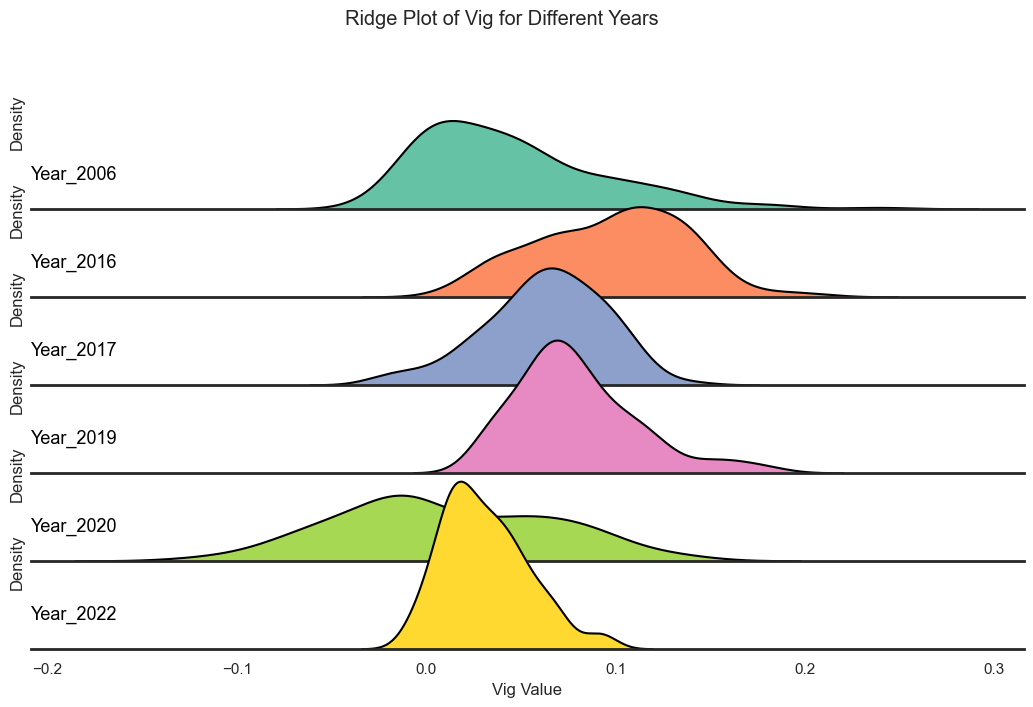

In [35]:
plot_ridge_histograms(dataframes, 'VIG', years)

Kruskal-Wallis Test - Statistic: 324.73894460881274, p-value: 4.78586449414572e-68
One-way ANOVA - Statistic: 97.79534882813265, p-value: 8.248610755024855e-82
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  2.797417e-21  7.005586e-06  1.228163e-14  1.589915e-08   
2  2.797417e-21  1.000000e+00  7.224606e-12  4.991475e-06  1.707305e-32   
3  7.005586e-06  7.224606e-12  1.000000e+00  1.554333e-03  1.503529e-14   
4  1.228163e-14  4.991475e-06  1.554333e-03  1.000000e+00  5.893754e-25   
5  1.589915e-08  1.707305e-32  1.503529e-14  5.893754e-25  1.000000e+00   
6  1.541894e-01  1.107981e-37  3.430449e-16  3.226110e-34  2.050592e-05   

              6  
1  1.541894e-01  
2  1.107981e-37  
3  3.430449e-16  
4  3.226110e-34  
5  2.050592e-05  
6  1.000000e+00  


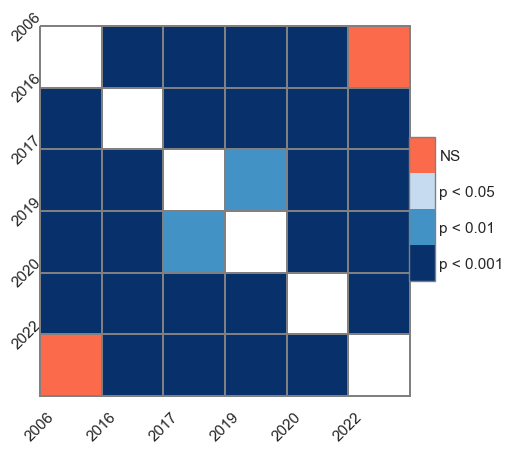

In [98]:
statistical_test(dataframes, 'VIG')

# 36. Transformed Vegetation Index

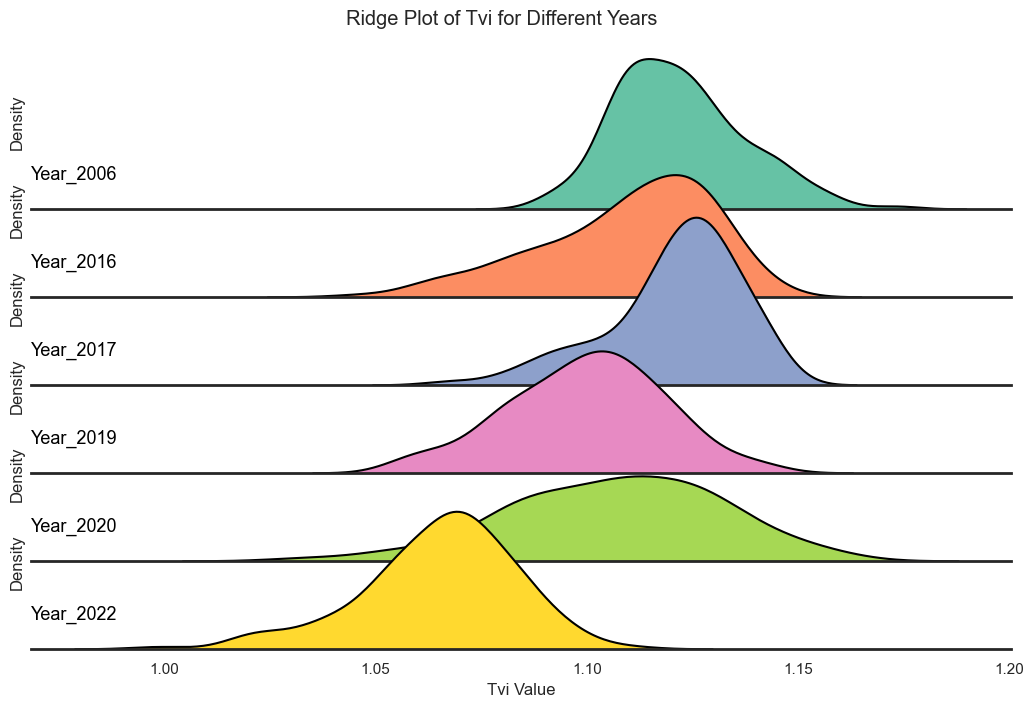

In [36]:
plot_ridge_histograms(dataframes, 'TVI', years)

Kruskal-Wallis Test - Statistic: 399.4643849950323, p-value: 3.8699407657167145e-84
One-way ANOVA - Statistic: 175.33405720821116, p-value: 5.218024505028585e-129
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  4.841437e-06  4.730949e-01  5.584744e-23  3.273125e-08   
2  4.841437e-06  1.000000e+00  2.048165e-06  8.671757e-07  2.434529e-01   
3  4.730949e-01  2.048165e-06  1.000000e+00  3.391591e-18  4.120909e-07   
4  5.584744e-23  8.671757e-07  3.391591e-18  1.000000e+00  2.837824e-03   
5  3.273125e-08  2.434529e-01  4.120909e-07  2.837824e-03  1.000000e+00   
6  1.670927e-51  7.076185e-41  1.137592e-40  4.097801e-36  3.486146e-36   

              6  
1  1.670927e-51  
2  7.076185e-41  
3  1.137592e-40  
4  4.097801e-36  
5  3.486146e-36  
6  1.000000e+00  


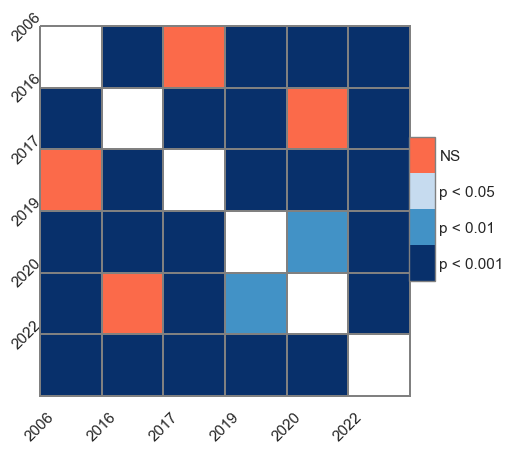

In [99]:
statistical_test(dataframes, 'TVI')

# 37. Triangular Vegetation Index

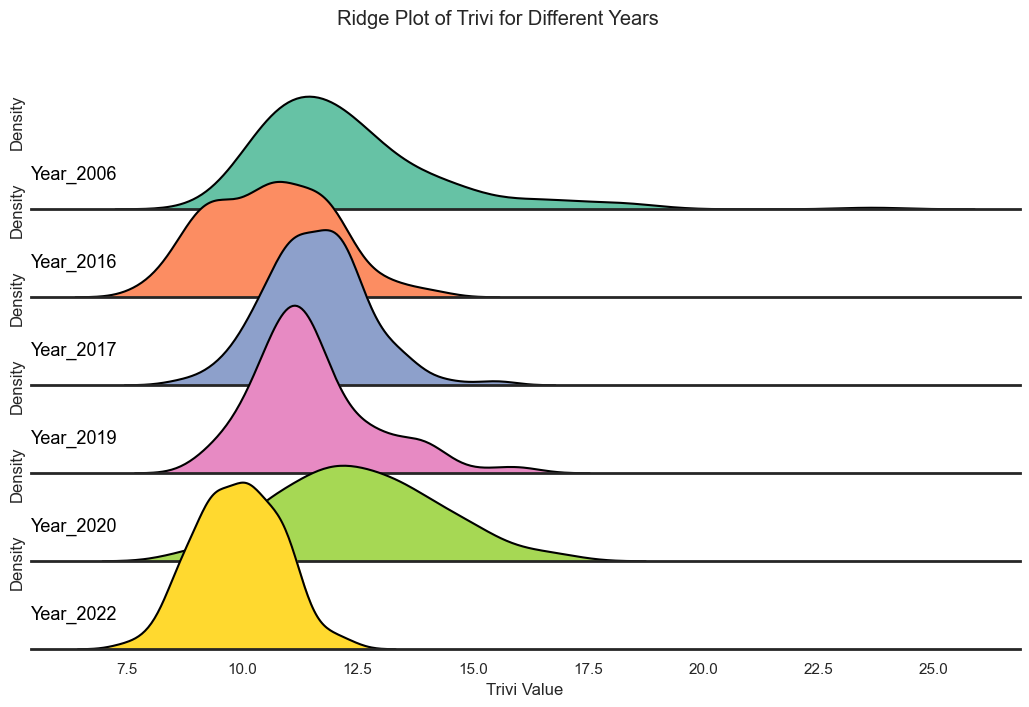

In [37]:
plot_ridge_histograms(dataframes, 'TriVI', years)

Kruskal-Wallis Test - Statistic: 291.0039978037871, p-value: 8.598475688234615e-61
One-way ANOVA - Statistic: 71.53729864417733, p-value: 9.419773495487741e-63
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  6.391223e-16  2.069682e-02  2.726805e-04  3.254494e-02   
2  6.391223e-16  1.000000e+00  2.543575e-09  1.096847e-07  9.220910e-21   
3  2.069682e-02  2.543575e-09  1.000000e+00  1.835135e-01  3.666257e-06   
4  2.726805e-04  1.096847e-07  1.835135e-01  1.000000e+00  1.712684e-08   
5  3.254494e-02  9.220910e-21  3.666257e-06  1.712684e-08  1.000000e+00   
6  8.464477e-36  1.571824e-06  2.656200e-26  1.432316e-27  3.215262e-36   

              6  
1  8.464477e-36  
2  1.571824e-06  
3  2.656200e-26  
4  1.432316e-27  
5  3.215262e-36  
6  1.000000e+00  


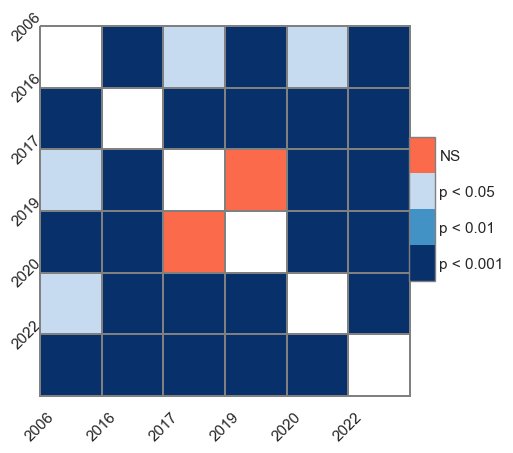

In [100]:
statistical_test(dataframes, 'TriVI')

# 38. Modified Triangular Vegetation Index 1

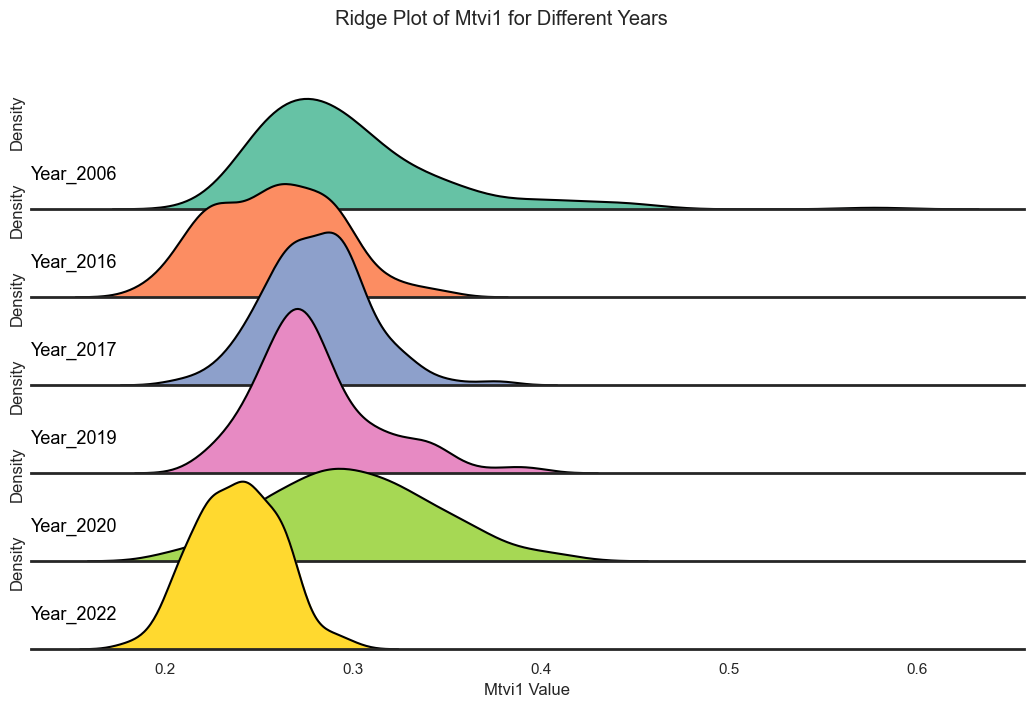

In [38]:
plot_ridge_histograms(dataframes, 'MTVI1', years)

Kruskal-Wallis Test - Statistic: 268.41408831022545, p-value: 6.130458486711739e-56
One-way ANOVA - Statistic: 63.64585665838043, p-value: 1.23330521045047e-56
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  2.337755e-13  3.766198e-02  3.008532e-03  1.064675e-01   
2  2.337755e-13  1.000000e+00  8.191764e-08  7.409160e-07  1.995024e-16   
3  3.766198e-02  8.191764e-08  1.000000e+00  3.299448e-01  1.076957e-04   
4  3.008532e-03  7.409160e-07  3.299448e-01  1.000000e+00  5.846248e-06   
5  1.064675e-01  1.995024e-16  1.076957e-04  5.846248e-06  1.000000e+00   
6  2.770571e-35  4.070345e-08  3.235943e-26  3.230816e-29  1.492713e-33   

              6  
1  2.770571e-35  
2  4.070345e-08  
3  3.235943e-26  
4  3.230816e-29  
5  1.492713e-33  
6  1.000000e+00  


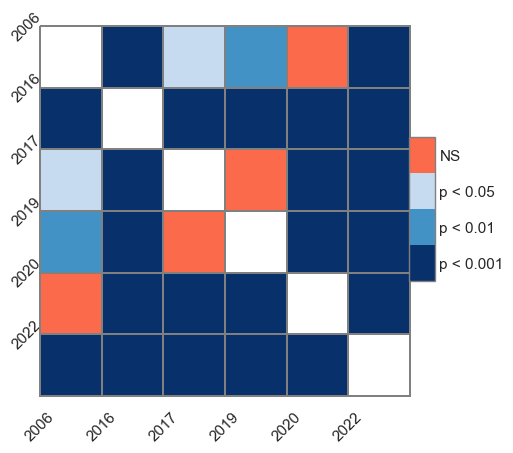

In [101]:
statistical_test(dataframes, 'MTVI1')

# 39.MSR_Rededge= ((NIR/RE)-1)/(np.sqrt((NIR/RE)+1)

[34] C. Wu, Z. Niu, Q. Tang, and W. Huang, “Estimating chlorophyll content
from hyperspectral vegetation indices: Modeling and validation,” Agricultural Forest Meteorol., vol. 148, no. 8-9, pp. 1230–1241, 2008.

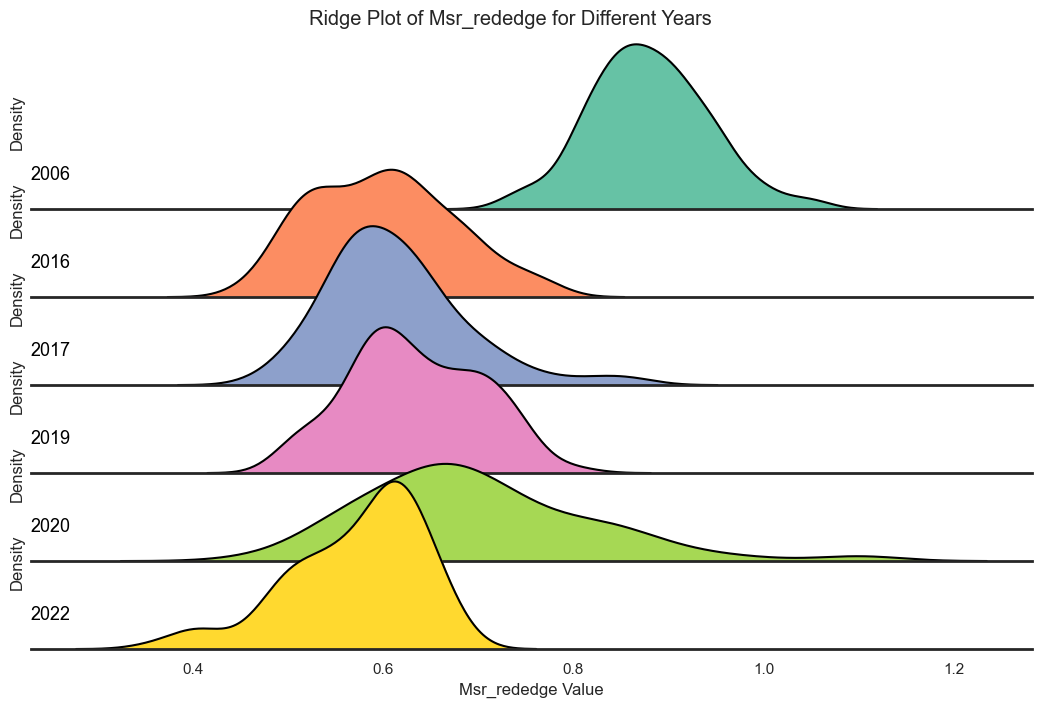

In [19]:
plot_ridge_histograms(dataframes, 'MSR_Rededge', years)

Kruskal-Wallis Test - Statistic: 444.38776561006625, p-value: 7.976516740943379e-94
One-way ANOVA - Statistic: 299.5764059105266, p-value: 2.4141193859914207e-186
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  9.698879e-52  3.591681e-41  1.298212e-51  2.599154e-35   
2  9.698879e-52  1.000000e+00  2.513465e-01  8.615467e-05  8.379352e-15   
3  3.591681e-41  2.513465e-01  1.000000e+00  5.054820e-03  1.503227e-10   
4  1.298212e-51  8.615467e-05  5.054820e-03  1.000000e+00  1.007456e-06   
5  2.599154e-35  8.379352e-15  1.503227e-10  1.007456e-06  1.000000e+00   
6  5.303067e-52  1.118379e-02  7.226516e-04  6.774473e-11  3.805966e-23   

              6  
1  5.303067e-52  
2  1.118379e-02  
3  7.226516e-04  
4  6.774473e-11  
5  3.805966e-23  
6  1.000000e+00  


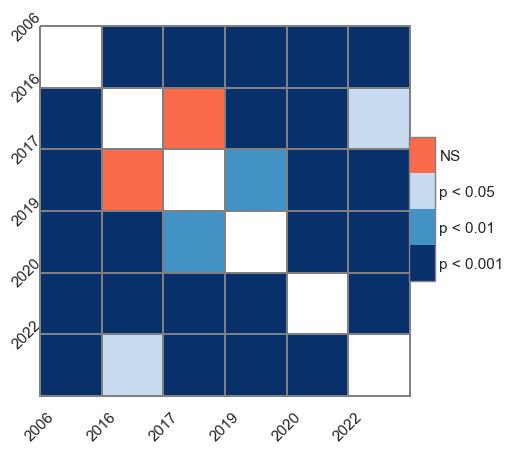

In [20]:
statistical_test(dataframes, 'MSR_Rededge')

# 40.   MGRVI=((p1_np[0])**2-(p1_np[1])**2)/((p1_np[0])**2+(p1_np[1])**2)
        
 https://www.frontiersin.org/articles/10.3389/fpls.2022.928953/full       


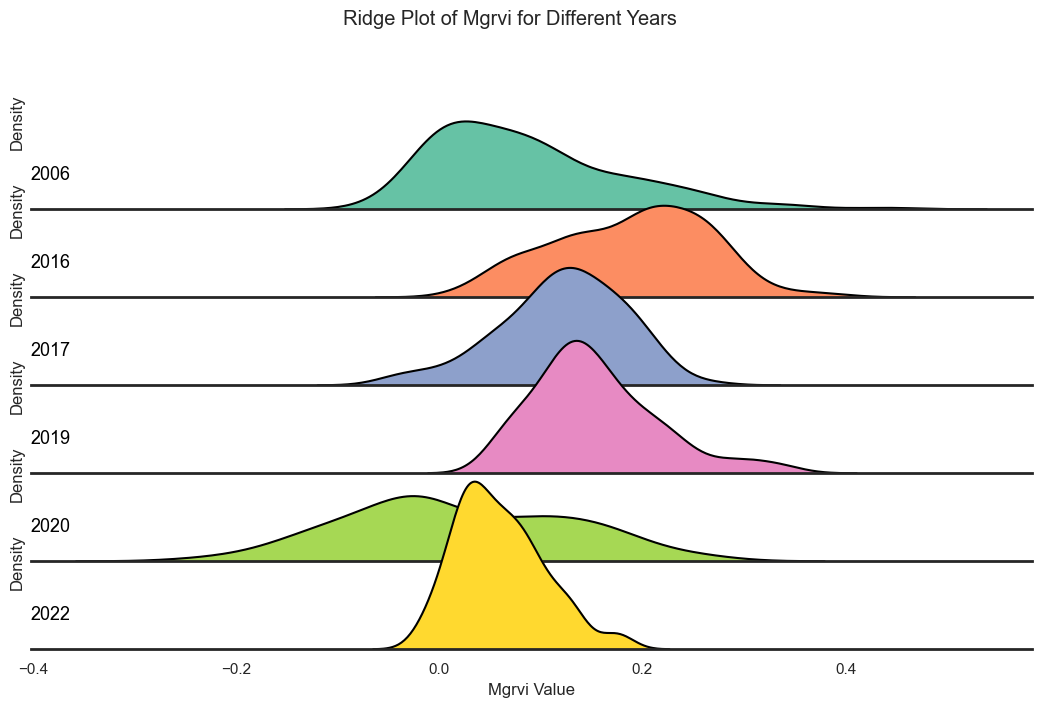

In [21]:
plot_ridge_histograms(dataframes, 'MGRVI', years)

Kruskal-Wallis Test - Statistic: 329.9783948732734, p-value: 3.5693687469931534e-69
One-way ANOVA - Statistic: 100.95611803948653, p-value: 5.561509264160697e-84
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  8.050280e-22  6.321645e-06  5.366408e-15  1.844639e-08   
2  8.050280e-22  1.000000e+00  4.003634e-12  4.610323e-06  9.833832e-33   
3  6.321645e-06  4.003634e-12  1.000000e+00  1.037546e-03  1.234682e-14   
4  5.366408e-15  4.610323e-06  1.037546e-03  1.000000e+00  2.503836e-25   
5  1.844639e-08  9.833832e-33  1.234682e-14  2.503836e-25  1.000000e+00   
6  1.305581e-01  3.590200e-38  2.076869e-16  6.142295e-35  2.589616e-05   

              6  
1  1.305581e-01  
2  3.590200e-38  
3  2.076869e-16  
4  6.142295e-35  
5  2.589616e-05  
6  1.000000e+00  


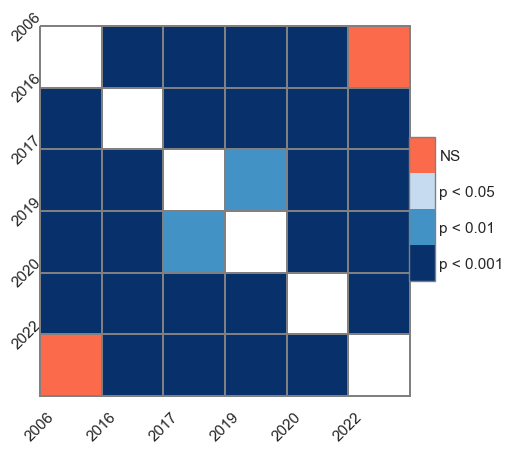

In [22]:
statistical_test(dataframes, 'MGRVI')

# 41. RERVI=(p1_np[3]/p1_np[2])

https://www.frontiersin.org/articles/10.3389/fpls.2022.928953/full

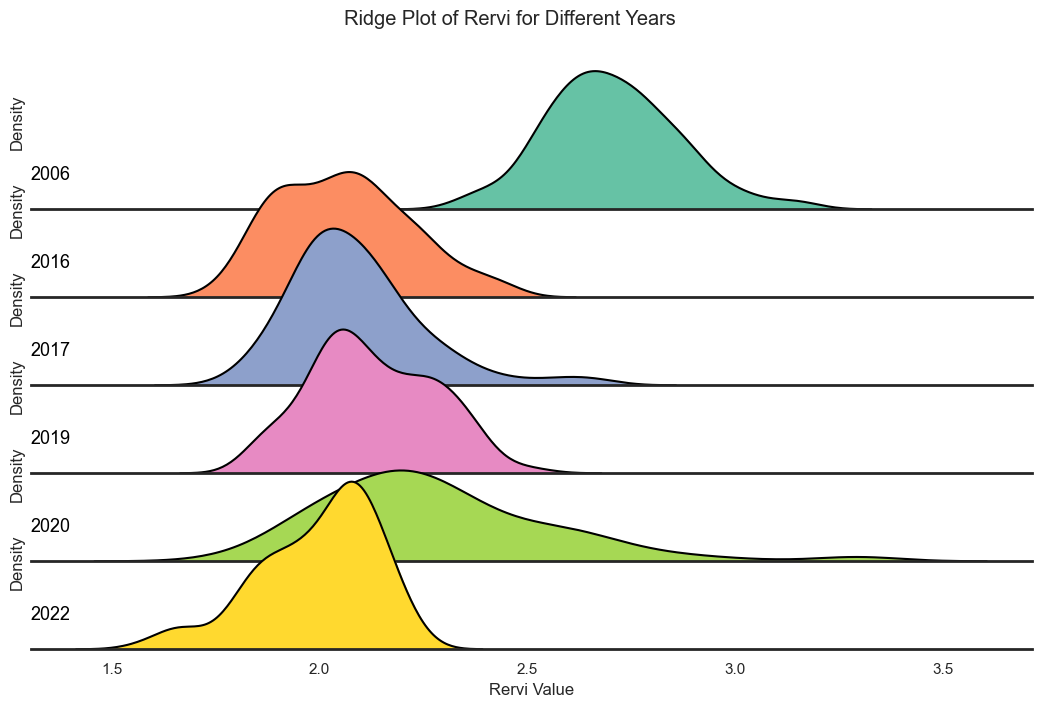

In [23]:
plot_ridge_histograms(dataframes, 'RERVI', years)

Kruskal-Wallis Test - Statistic: 446.26730704223564, p-value: 3.136268180967254e-94
One-way ANOVA - Statistic: 313.6310817672609, p-value: 7.386858305860138e-192
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  9.698879e-52  3.758307e-41  1.248739e-51  5.764143e-35   
2  9.698879e-52  1.000000e+00  2.424430e-01  2.266400e-04  5.421221e-15   
3  3.758307e-41  2.424430e-01  1.000000e+00  1.272535e-02  1.331691e-10   
4  1.248739e-51  2.266400e-04  1.272535e-02  1.000000e+00  2.367894e-07   
5  5.764143e-35  5.421221e-15  1.331691e-10  2.367894e-07  1.000000e+00   
6  5.303067e-52  5.163198e-03  2.680961e-04  6.832557e-11  5.842419e-24   

              6  
1  5.303067e-52  
2  5.163198e-03  
3  2.680961e-04  
4  6.832557e-11  
5  5.842419e-24  
6  1.000000e+00  


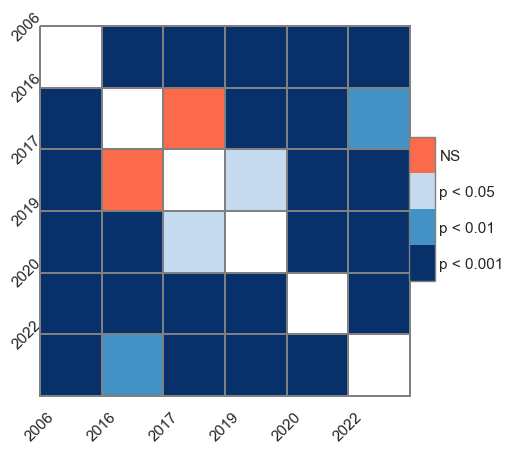

In [24]:
statistical_test(dataframes, 'RERVI')

# 42. sCCCI=NDRE/NDVI

https://www.frontiersin.org/articles/10.3389/fpls.2022.928953/full

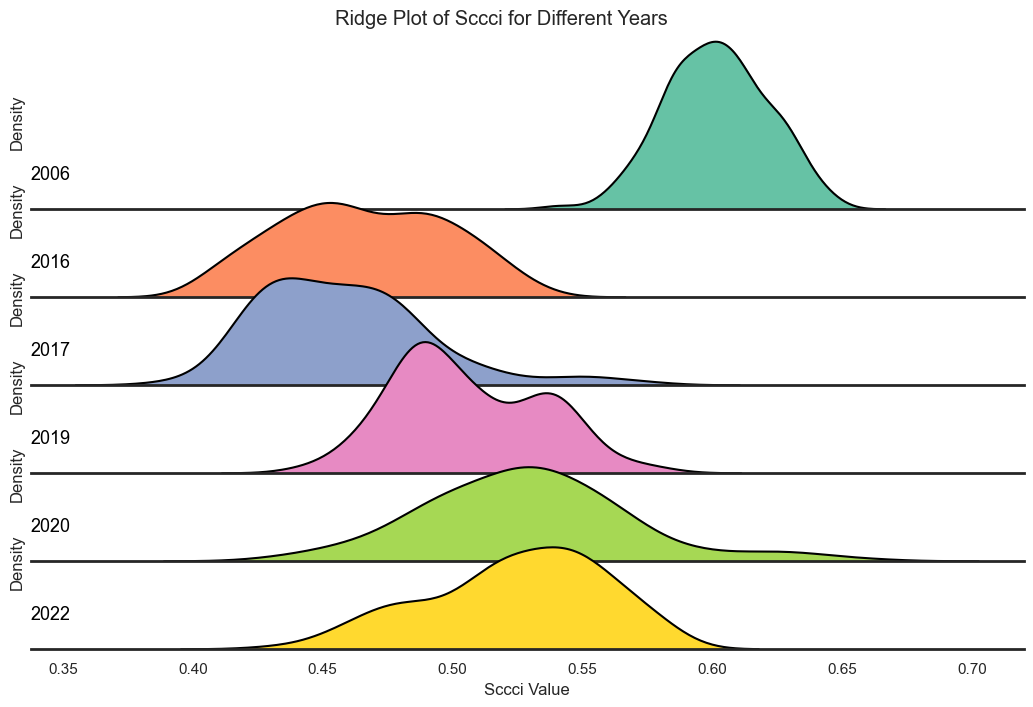

In [25]:
plot_ridge_histograms(dataframes, 'sCCCI', years)

Kruskal-Wallis Test - Statistic: 576.9461017257413, p-value: 1.9342997761666493e-122
One-way ANOVA - Statistic: 387.88483733415427, p-value: 1.3726571873409915e-218
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  5.303067e-52  1.427486e-42  1.487244e-51  6.836514e-41   
2  5.303067e-52  1.000000e+00  1.997081e-02  4.036932e-21  3.668830e-33   
3  1.427486e-42  1.997081e-02  1.000000e+00  7.026429e-25  1.866361e-30   
4  1.487244e-51  4.036932e-21  7.026429e-25  1.000000e+00  4.982269e-08   
5  6.836514e-41  3.668830e-33  1.866361e-30  4.982269e-08  1.000000e+00   
6  5.886409e-50  2.957904e-32  2.494488e-29  1.900568e-07  7.955359e-01   

              6  
1  5.886409e-50  
2  2.957904e-32  
3  2.494488e-29  
4  1.900568e-07  
5  7.955359e-01  
6  1.000000e+00  


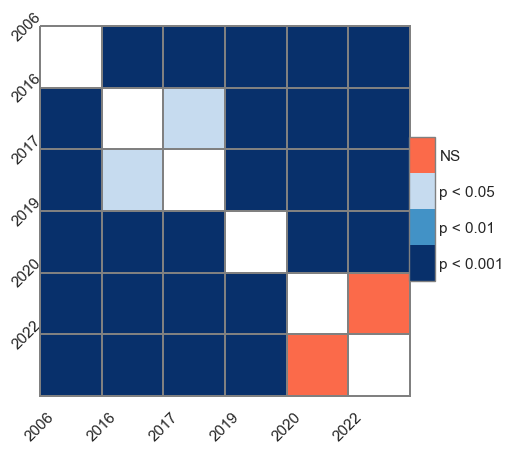

In [26]:
statistical_test(dataframes, 'sCCCI')

# 43. Enhanced Vegetation Index 2 (EVI2) 
EVI2=(NIR-Red)/(1+NIR+2.4*Red])

Jiang Z, Huete AR, Didan K, Miura T. Development of a two-band enhanced vegetation index without a blue band. Remote sensing of Environment. 2008 Oct 15;112(10):3833-45.

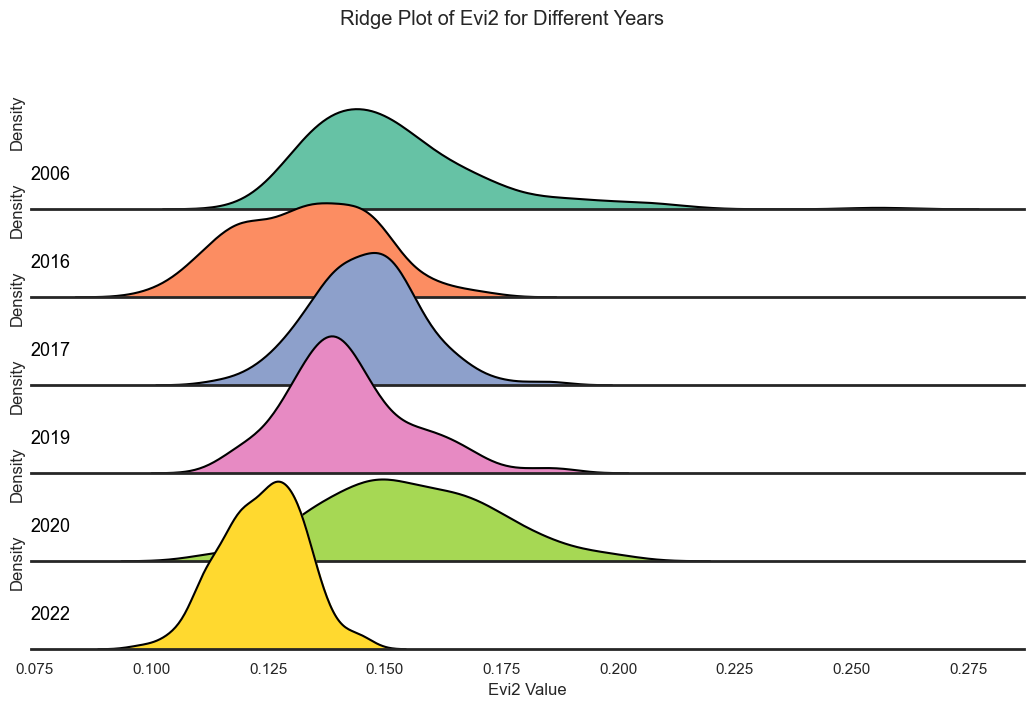

In [27]:
plot_ridge_histograms(dataframes, 'EVI2', years)

Kruskal-Wallis Test - Statistic: 349.9899137746804, p-value: 1.7590381002092347e-73
One-way ANOVA - Statistic: 94.89471667486082, p-value: 8.52764475584782e-80
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  2.777989e-18  4.220191e-02  8.959718e-07  2.926628e-02   
2  2.777989e-18  1.000000e+00  1.243177e-11  1.347666e-06  1.429183e-22   
3  4.220191e-02  1.243177e-11  1.000000e+00  4.139997e-03  1.823979e-05   
4  8.959718e-07  1.347666e-06  4.139997e-03  1.000000e+00  4.153188e-11   
5  2.926628e-02  1.429183e-22  1.823979e-05  4.153188e-11  1.000000e+00   
6  4.497138e-44  2.225400e-09  3.132965e-33  5.601174e-32  6.813109e-42   

              6  
1  4.497138e-44  
2  2.225400e-09  
3  3.132965e-33  
4  5.601174e-32  
5  6.813109e-42  
6  1.000000e+00  


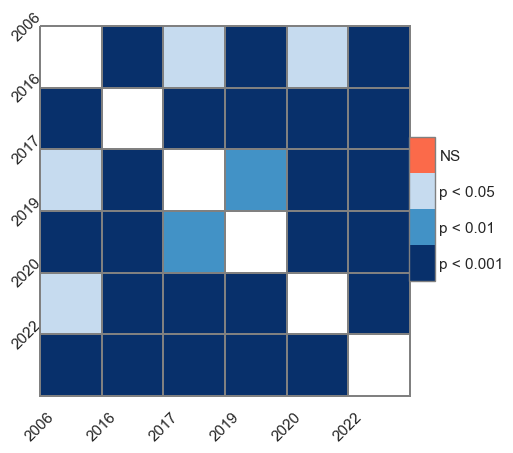

In [28]:
statistical_test(dataframes, 'EVI2')

# 44. MERIS Terrestrial Chlorophyll Index (MTCI) 
Dash J, Curran PJ. The MERIS terrestrial chlorophyll index.

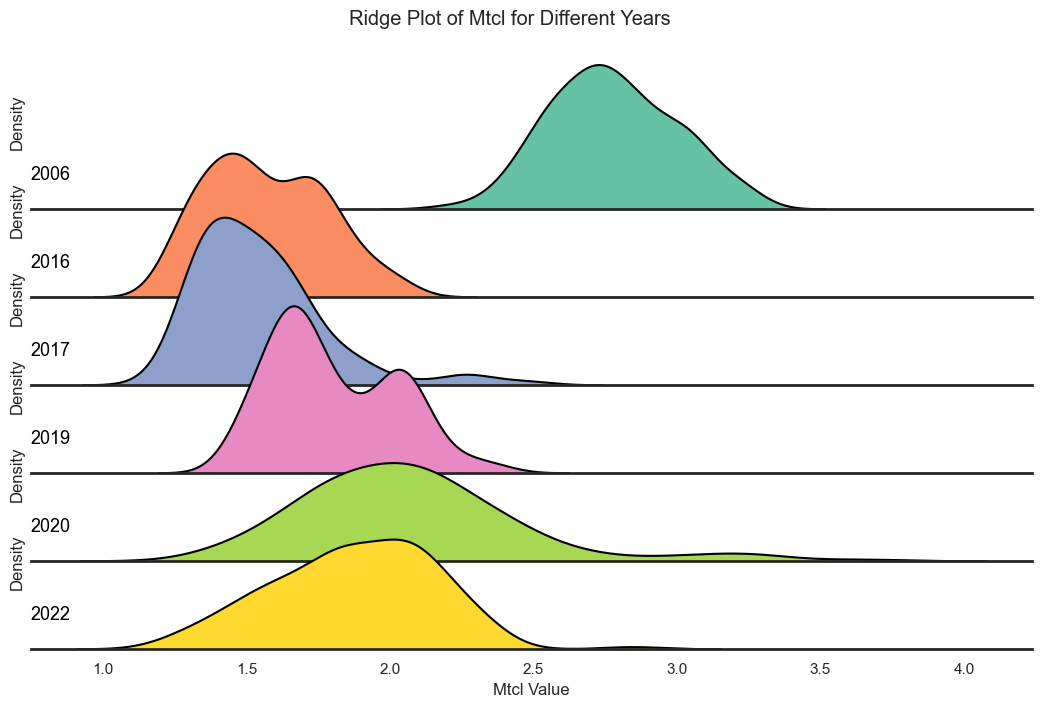

In [29]:
plot_ridge_histograms(dataframes, 'MTCl', years)

Kruskal-Wallis Test - Statistic: 541.9745430752598, p-value: 6.916910796315072e-115
One-way ANOVA - Statistic: 428.69103112196774, p-value: 8.17266407997224e-232
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  5.303067e-52  1.494891e-42  6.198053e-52  2.353782e-40   
2  5.303067e-52  1.000000e+00  1.285972e-01  3.854663e-16  2.453241e-33   
3  1.494891e-42  1.285972e-01  1.000000e+00  1.410793e-18  8.697642e-29   
4  6.198053e-52  3.854663e-16  1.410793e-18  1.000000e+00  1.405640e-12   
5  2.353782e-40  2.453241e-33  8.697642e-29  1.405640e-12  1.000000e+00   
6  5.235073e-51  1.567309e-20  6.558225e-19  4.490758e-03  1.766081e-05   

              6  
1  5.235073e-51  
2  1.567309e-20  
3  6.558225e-19  
4  4.490758e-03  
5  1.766081e-05  
6  1.000000e+00  


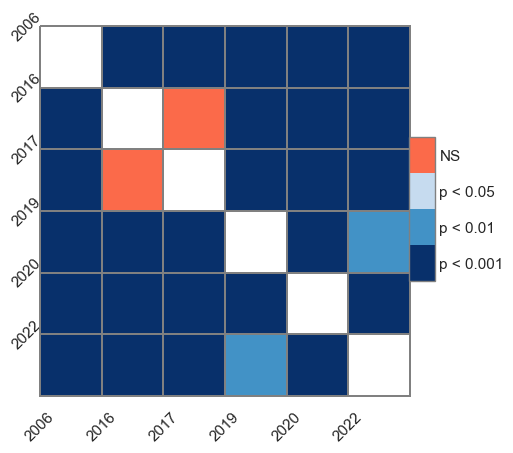

In [30]:
statistical_test(dataframes, 'MTCl')

# 45.    Red-edge Simple Ratio, RESR
RESR=(p1_np[3] / p1_np[2])
https://eva.fld.czu.cz/en/r-13571-levels-of-study/r-13714-sp-5-acquisition-of-productive-ecological-environmental-and-sociological-data-in-forest-environment

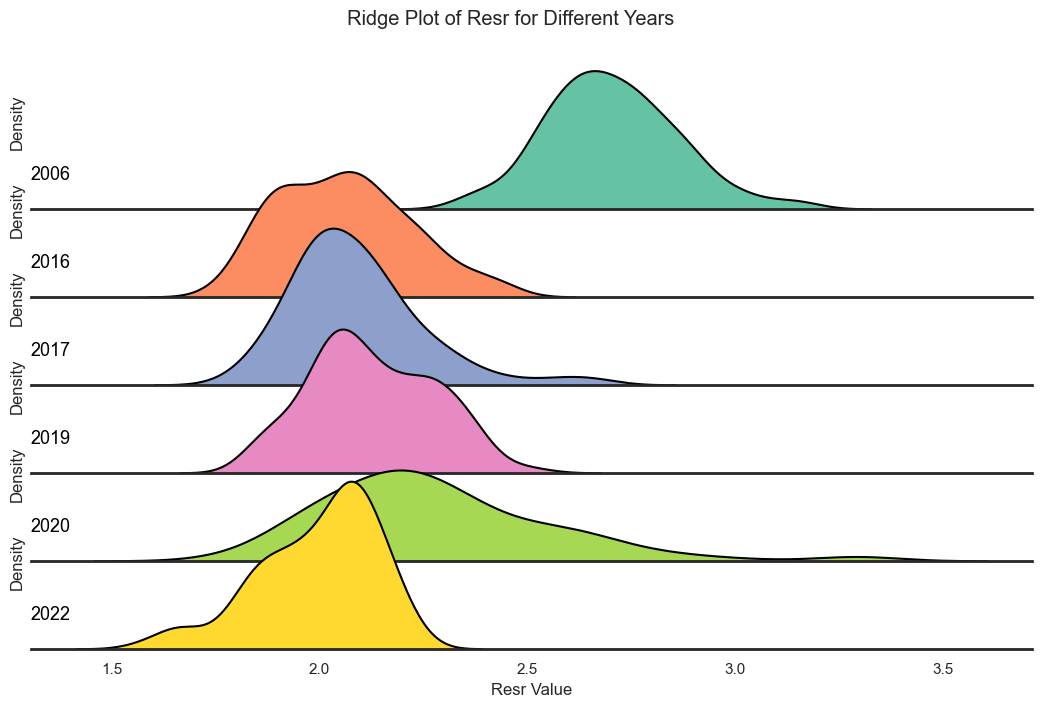

In [31]:
plot_ridge_histograms(dataframes, 'RESR', years)

Kruskal-Wallis Test - Statistic: 446.26730704223564, p-value: 3.136268180967254e-94
One-way ANOVA - Statistic: 313.6310817672609, p-value: 7.386858305860138e-192
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  9.698879e-52  3.758307e-41  1.248739e-51  5.764143e-35   
2  9.698879e-52  1.000000e+00  2.424430e-01  2.266400e-04  5.421221e-15   
3  3.758307e-41  2.424430e-01  1.000000e+00  1.272535e-02  1.331691e-10   
4  1.248739e-51  2.266400e-04  1.272535e-02  1.000000e+00  2.367894e-07   
5  5.764143e-35  5.421221e-15  1.331691e-10  2.367894e-07  1.000000e+00   
6  5.303067e-52  5.163198e-03  2.680961e-04  6.832557e-11  5.842419e-24   

              6  
1  5.303067e-52  
2  5.163198e-03  
3  2.680961e-04  
4  6.832557e-11  
5  5.842419e-24  
6  1.000000e+00  


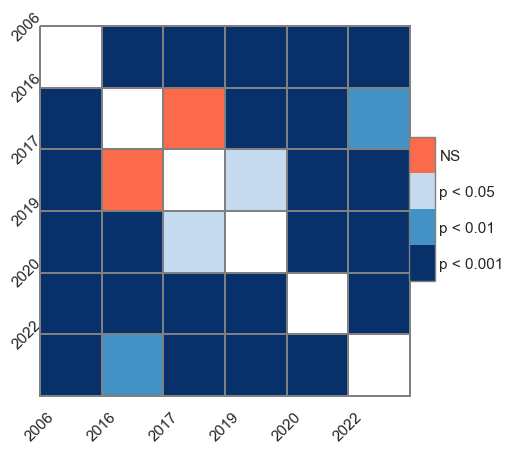

In [32]:
statistical_test(dataframes, 'RESR')

# 46. Plant Senescence Reflectance, PSRI
PSRI=(Red-Green)/(RE)

An increase in PSRI indicates increased canopy stress (carotenoid pigment), the onset of canopy senescence, and plant fruit ripening. Applications include vegetation health monitoring, plant physiological stress detection, and crop production and yield analysis.

https://eva.fld.czu.cz/en/r-13571-levels-of-study/r-13714-sp-5-acquisition-of-productive-ecological-environmental-and-sociological-data-in-forest-environment
       

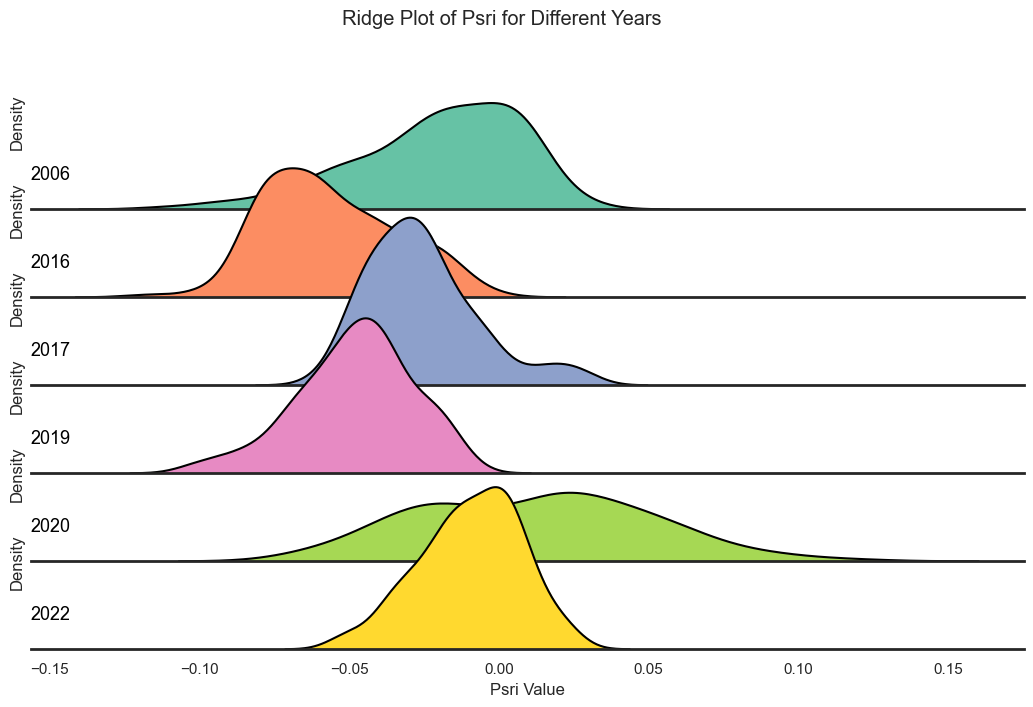

In [33]:
plot_ridge_histograms(dataframes, 'PSRI', years)

Kruskal-Wallis Test - Statistic: 422.08880927987957, p-value: 5.135553648258982e-89
One-way ANOVA - Statistic: 153.74996703580442, p-value: 5.2775518166063206e-117
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  3.659271e-26  2.686062e-03  1.458208e-20  8.756791e-13   
2  3.659271e-26  1.000000e+00  6.440308e-22  1.036804e-04  1.248260e-40   
3  2.686062e-03  6.440308e-22  1.000000e+00  5.197266e-16  4.402868e-16   
4  1.458208e-20  1.036804e-04  5.197266e-16  1.000000e+00  3.284167e-37   
5  8.756791e-13  1.248260e-40  4.402868e-16  3.284167e-37  1.000000e+00   
6  3.033669e-03  1.053295e-41  2.339723e-12  5.433688e-40  1.450654e-07   

              6  
1  3.033669e-03  
2  1.053295e-41  
3  2.339723e-12  
4  5.433688e-40  
5  1.450654e-07  
6  1.000000e+00  


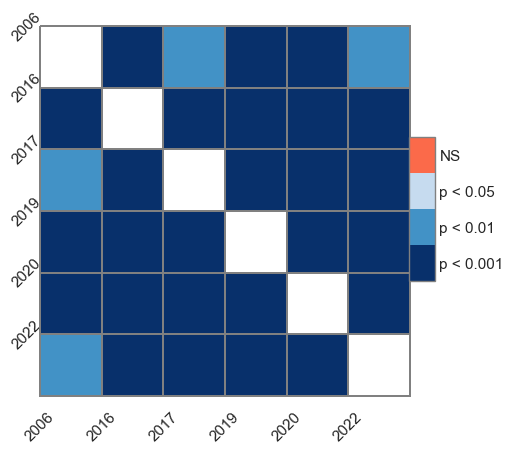

In [34]:
statistical_test(dataframes, 'PSRI')

# 47.  Modified Canopy Chlorophyll Content Index, M3Cl

M3Cl=(NIR+Red-RE)/(NIR-Red+RE)

https://eva.fld.czu.cz/en/r-13571-levels-of-study/r-13714-sp-5-acquisition-of-productive-ecological-environmental-and-sociological-data-in-forest-environment


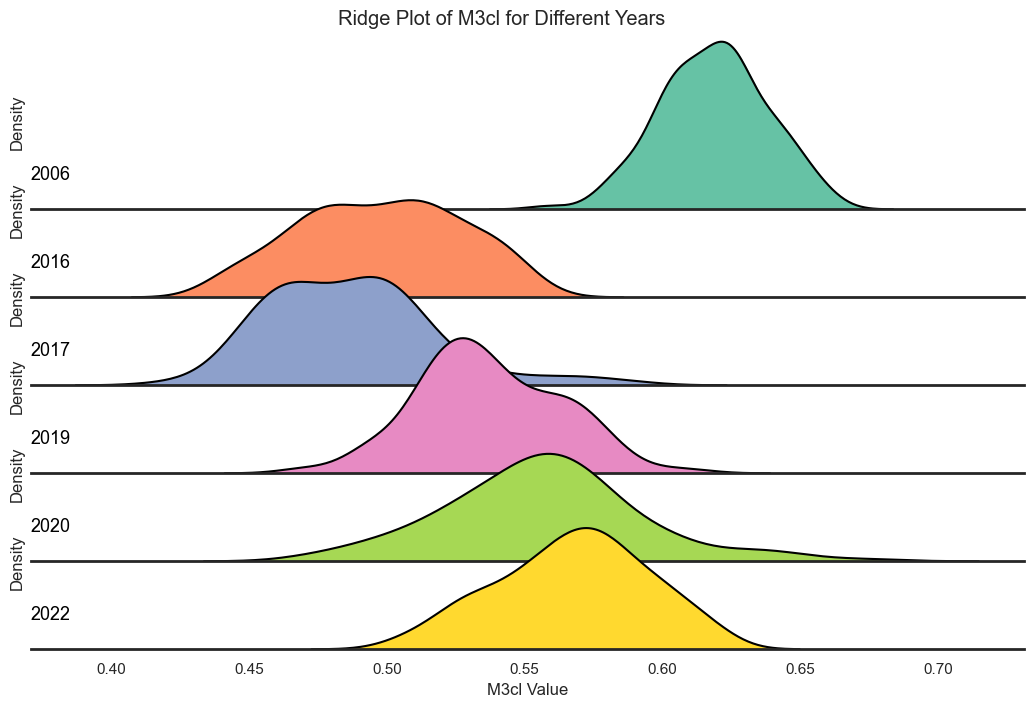

In [35]:
plot_ridge_histograms(dataframes, 'M3Cl', years)

Kruskal-Wallis Test - Statistic: 617.7493148813305, p-value: 2.9551889744472835e-131
One-way ANOVA - Statistic: 414.83840959912635, p-value: 1.9907814038335438e-227
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  5.303067e-52  1.427486e-42  1.131797e-50  1.128569e-39   
2  5.303067e-52  1.000000e+00  8.360965e-04  5.332459e-24  1.538865e-34   
3  1.427486e-42  8.360965e-04  1.000000e+00  1.710223e-28  2.398526e-32   
4  1.131797e-50  5.332459e-24  1.710223e-28  1.000000e+00  1.176533e-07   
5  1.128569e-39  1.538865e-34  2.398526e-32  1.176533e-07  1.000000e+00   
6  8.262366e-41  3.692630e-44  1.029205e-37  1.488365e-18  5.184346e-04   

              6  
1  8.262366e-41  
2  3.692630e-44  
3  1.029205e-37  
4  1.488365e-18  
5  5.184346e-04  
6  1.000000e+00  


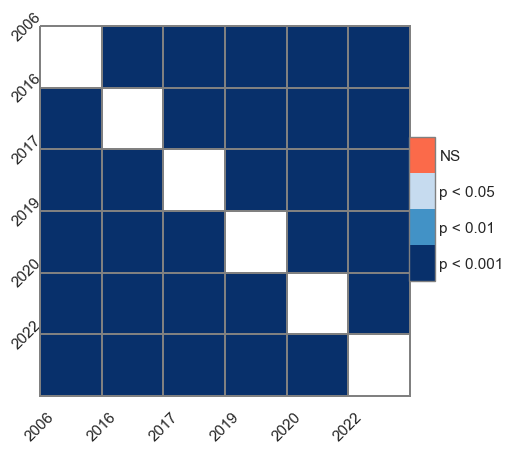

In [36]:
statistical_test(dataframes, 'M3Cl')

# 48. RedEdge/Red Simple Ratio, SRrr

SRrr= (p1_np[2] / p1_np[1])  

Ehammer A, Fritsch S, Conrad C, Lamers J, Dech S. Statistical derivation of fPAR and LAI for irrigated cotton and rice in arid Uzbekistan by combining multi-temporal RapidEye data and ground measurements. InRemote Sensing for Agriculture, Ecosystems, and Hydrology XII 2010 Oct 22 (Vol. 7824, pp. 66-75). SPIE.

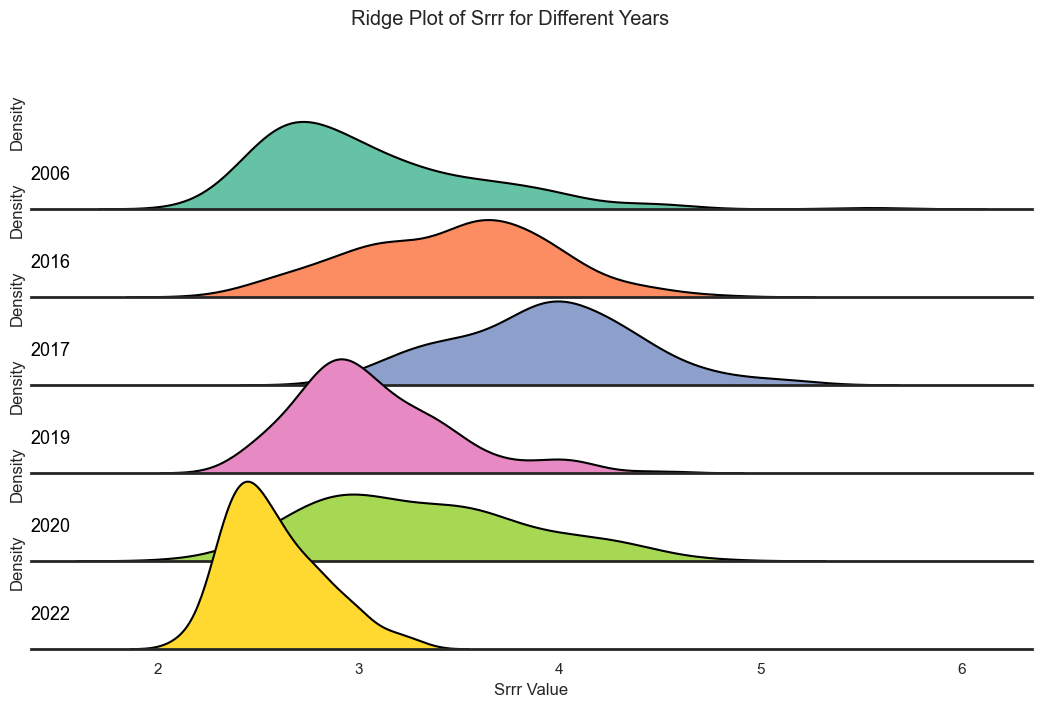

In [37]:
plot_ridge_histograms(dataframes, 'SRrr', years)

Kruskal-Wallis Test - Statistic: 401.7149611542595, p-value: 1.2666003381548255e-84
One-way ANOVA - Statistic: 133.5120446574737, p-value: 5.167685467314907e-105
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  2.523144e-13  3.304453e-27  8.985294e-02  3.473234e-06   
2  2.523144e-13  1.000000e+00  2.606256e-12  5.070494e-14  1.577195e-03   
3  3.304453e-27  2.606256e-12  1.000000e+00  1.170857e-30  2.330491e-17   
4  8.985294e-02  5.070494e-14  1.170857e-30  1.000000e+00  8.300337e-05   
5  3.473234e-06  1.577195e-03  2.330491e-17  8.300337e-05  1.000000e+00   
6  1.684476e-20  4.177448e-42  3.423368e-42  6.141673e-30  3.329082e-34   

              6  
1  1.684476e-20  
2  4.177448e-42  
3  3.423368e-42  
4  6.141673e-30  
5  3.329082e-34  
6  1.000000e+00  


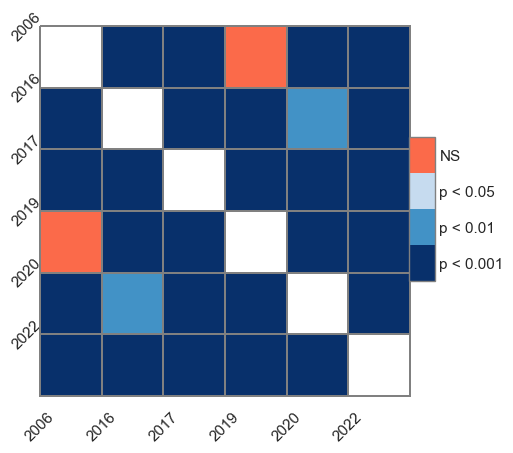

In [38]:
statistical_test(dataframes, 'SRrr')

# 49.  Red edge position, REP
REP=   p1_np[1]+(p1_np[3])/2  
Guyot G, Baret F, Jacquemoud S. Imaging spectroscopy for vegetation studies. Kluwer Academic Publishers: Norwell, MA, USA; 1992.

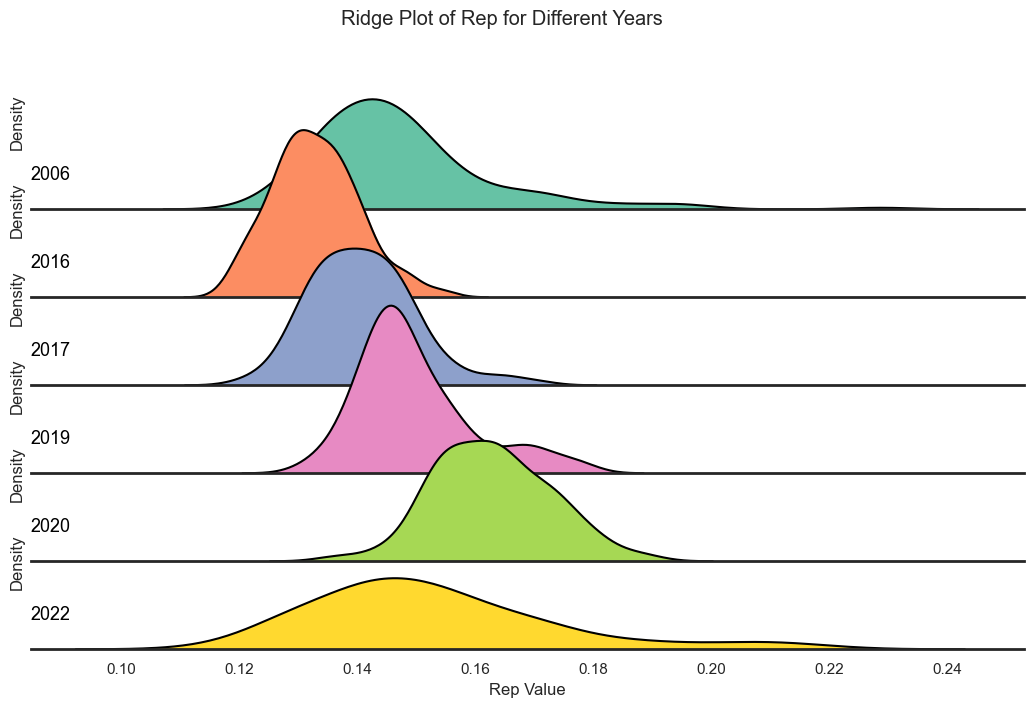

In [39]:
plot_ridge_histograms(dataframes, 'REP', years)

Kruskal-Wallis Test - Statistic: 385.493444538371, p-value: 3.966265579230776e-81
One-way ANOVA - Statistic: 93.16514148923575, p-value: 1.3873241497694596e-78
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  2.734616e-24  5.509443e-04  9.996831e-04  3.609627e-26   
2  2.734616e-24  1.000000e+00  1.534743e-12  1.531154e-39  1.694763e-50   
3  5.509443e-04  1.534743e-12  1.000000e+00  2.025551e-12  3.740405e-35   
4  9.996831e-04  1.531154e-39  2.025551e-12  1.000000e+00  1.307132e-24   
5  3.609627e-26  1.694763e-50  3.740405e-35  1.307132e-24  1.000000e+00   
6  1.035405e-02  2.305015e-24  2.406712e-07  6.920673e-01  7.159405e-12   

              6  
1  1.035405e-02  
2  2.305015e-24  
3  2.406712e-07  
4  6.920673e-01  
5  7.159405e-12  
6  1.000000e+00  


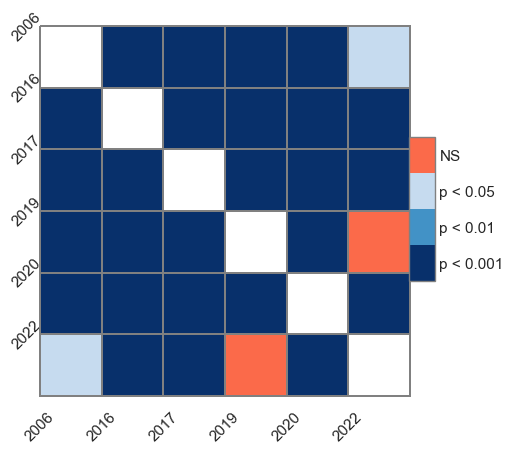

In [40]:
statistical_test(dataframes, 'REP')

# 50. Red edge normalized vegetation index,RENDVI
RENDVI=(RE-Green)/(RE+Green)

It capitalizes on the sensitivity of the vegetation red edge to small changes in canopy foliage content, gap fraction, and senescence. The value of this index ranges from -1 to 1. The common range for green vegetation is 0.2 to 0.9.

Sims, D. A., and Gamon, J. A. (2002). Relationships between leaf pigment content and spectral reflectance across a wide range of species, leaf structures and developmental stages. Remote Sens. Environ. 81, 337–354. doi: 10.1016/S0034-4257(02)00010-X

source:
Identification and Comprehensive Evaluation of Resistant Weeds Using Unmanned Aerial Vehicle-Based Multispectral Imagery
Fulin Xia2 Longzhe Quan1,2* Zhaoxia Lou2 Deng Sun2 Hailong Li1 Xiaolan Lv3

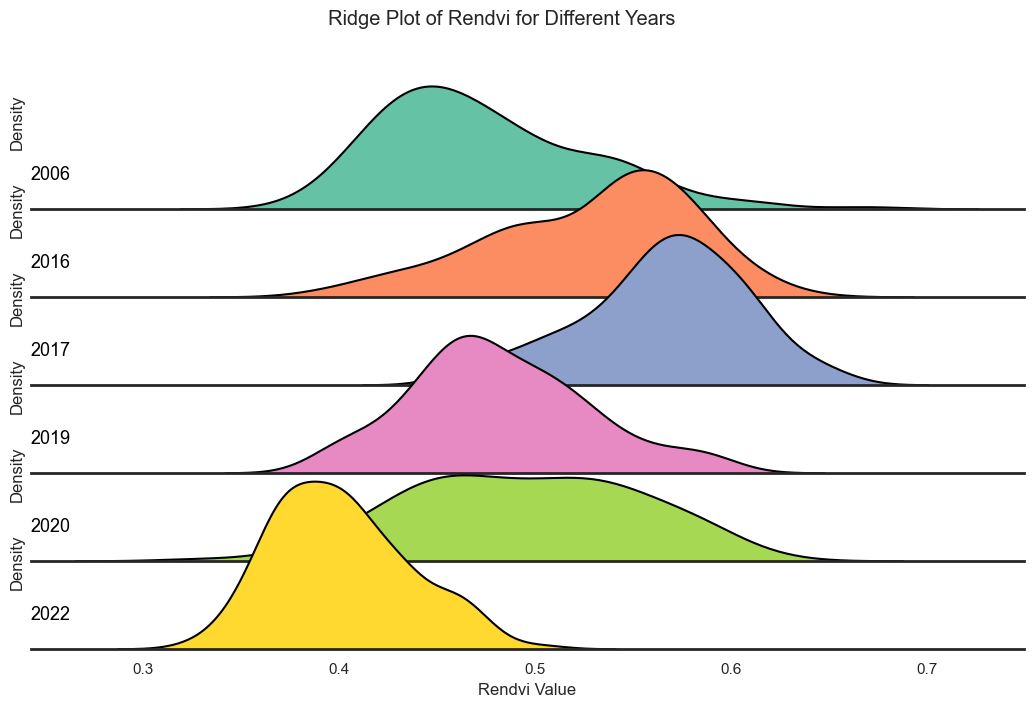

In [41]:
plot_ridge_histograms(dataframes, 'RENDVI', years)

Kruskal-Wallis Test - Statistic: 443.8674162521773, p-value: 1.0328705497740877e-93
One-way ANOVA - Statistic: 181.28755845131036, p-value: 3.4332487341528913e-132
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  1.469860e-17  9.737789e-29  3.740205e-02  4.990170e-04   
2  1.469860e-17  1.000000e+00  1.606028e-08  5.880023e-15  1.401029e-07   
3  9.737789e-29  1.606028e-08  1.000000e+00  2.440037e-28  6.210823e-20   
4  3.740205e-02  5.880023e-15  2.440037e-28  1.000000e+00  3.740205e-02   
5  4.990170e-04  1.401029e-07  6.210823e-20  3.740205e-02  1.000000e+00   
6  3.341167e-32  1.674004e-46  2.112205e-42  5.762768e-38  3.430213e-36   

              6  
1  3.341167e-32  
2  1.674004e-46  
3  2.112205e-42  
4  5.762768e-38  
5  3.430213e-36  
6  1.000000e+00  


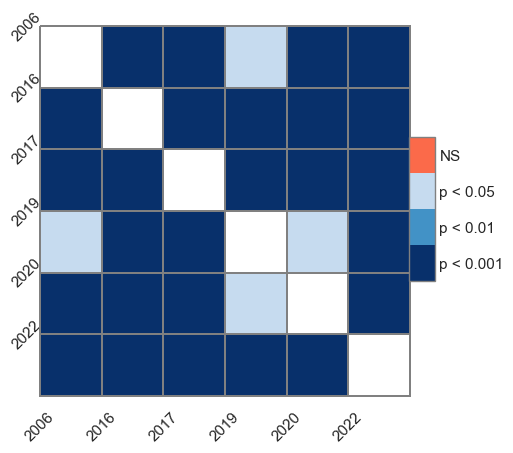

In [42]:
statistical_test(dataframes, 'RENDVI')


# 51. Transformed Chlorophyll Absorption in Reflectance,TCARI
TCARI = 3 * ((p1_np[2] - p1_np[1]) - 0.2* (p1_np[2] - p1_np[0]) * (p1_np[2] / p1_np[1]))


A. Sharifi, "Using Sentinel-2 Data to Predict Nitrogen Uptake in Maize Crop," in IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing, vol. 13, pp. 2656-2662, 2020, doi: 10.1109/JSTARS.2020.2998638.

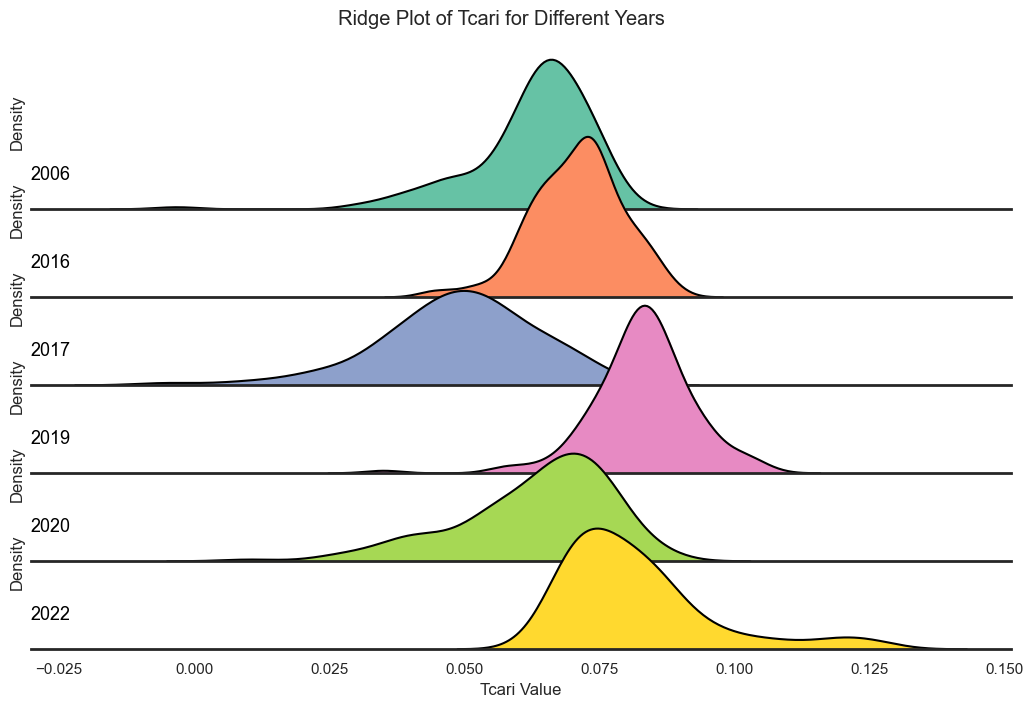

In [43]:
plot_ridge_histograms(dataframes, 'TCARI', years)

Kruskal-Wallis Test - Statistic: 465.9115360835508, p-value: 1.814106664442065e-98
One-way ANOVA - Statistic: 154.61326569033332, p-value: 1.6880990458514027e-117
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  5.089291e-12  6.569516e-16  2.469946e-42  2.287793e-01   
2  5.089291e-12  1.000000e+00  4.454336e-30  1.272194e-26  1.200071e-06   
3  6.569516e-16  4.454336e-30  1.000000e+00  5.231774e-40  2.923995e-14   
4  2.469946e-42  1.272194e-26  5.231774e-40  1.000000e+00  4.815989e-36   
5  2.287793e-01  1.200071e-06  2.923995e-14  4.815989e-36  1.000000e+00   
6  2.906463e-35  8.671284e-14  3.779713e-39  6.785403e-04  2.279117e-25   

              6  
1  2.906463e-35  
2  8.671284e-14  
3  3.779713e-39  
4  6.785403e-04  
5  2.279117e-25  
6  1.000000e+00  


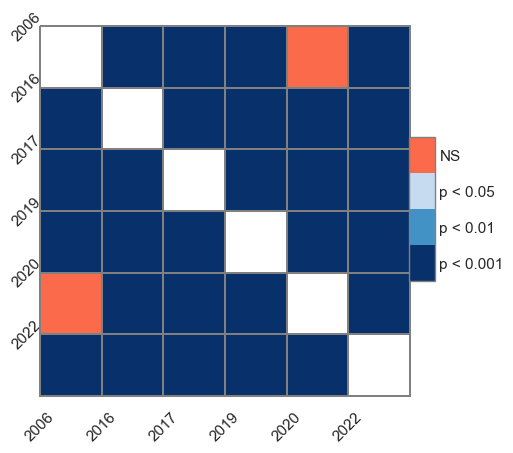

In [44]:
statistical_test(dataframes, 'TCARI')

# 52. Modified Chlorophyll Absorption in Reflectance index, MCARI

MCARI = ((p1_np[2] - p1_np[1]) - 0.2 (p1_np[2] - p1_np[0])) * (p1_np[2] / p1_np[1])

A. Sharifi, "Using Sentinel-2 Data to Predict Nitrogen Uptake in Maize Crop," in IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing, vol. 13, pp. 2656-2662, 2020, doi: 10.1109/JSTARS.2020.2998638.

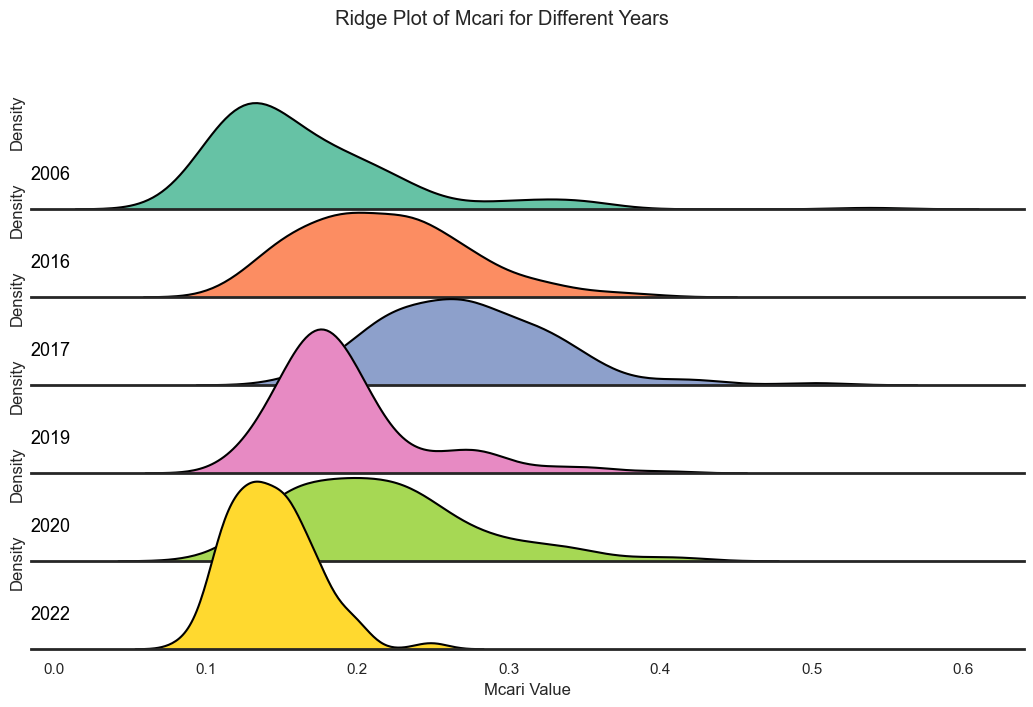

In [45]:
plot_ridge_histograms(dataframes, 'MCARI', years)

Kruskal-Wallis Test - Statistic: 348.3391286959827, p-value: 3.987276570639339e-73
One-way ANOVA - Statistic: 89.14130536235385, p-value: 9.78165070252753e-76
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  1.593870e-16  2.780669e-28  3.724639e-09  5.421221e-15   
2  1.593870e-16  1.000000e+00  8.665721e-13  1.050692e-05  4.740140e-01   
3  2.780669e-28  8.665721e-13  1.000000e+00  2.449790e-24  1.376565e-13   
4  3.724639e-09  1.050692e-05  2.449790e-24  1.000000e+00  3.846689e-04   
5  5.421221e-15  4.740140e-01  1.376565e-13  3.846689e-04  1.000000e+00   
6  1.388890e-02  1.510596e-32  8.485166e-41  2.863438e-25  5.303972e-30   

              6  
1  1.388890e-02  
2  1.510596e-32  
3  8.485166e-41  
4  2.863438e-25  
5  5.303972e-30  
6  1.000000e+00  


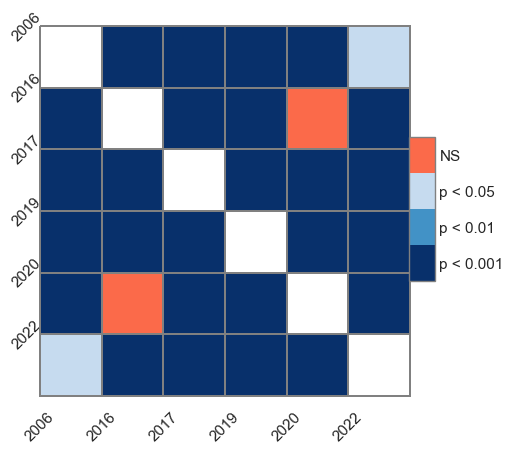

In [46]:
statistical_test(dataframes, 'MCARI')

# 53.  LCI (Leaf Chlorophyll index)

https://www.frontiersin.org/articles/10.3389/fpls.2023.1233349/full

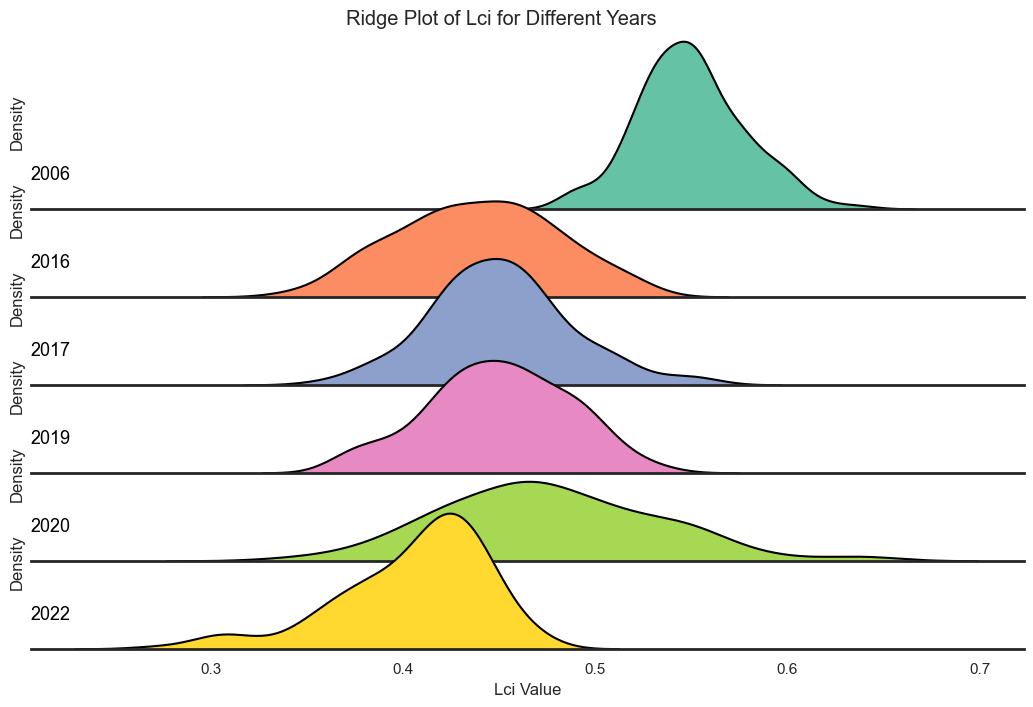

In [47]:
plot_ridge_histograms(dataframes, 'LCI', years)

Kruskal-Wallis Test - Statistic: 453.7767468222428, p-value: 7.526301363065886e-96
One-way ANOVA - Statistic: 223.64692572952598, p-value: 2.087761900015036e-153
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  1.481483e-50  2.173668e-39  4.862439e-50  3.170634e-30   
2  1.481483e-50  1.000000e+00  3.453595e-02  1.844943e-02  1.770803e-09   
3  2.173668e-39  3.453595e-02  1.000000e+00  9.071465e-01  7.447634e-05   
4  4.862439e-50  1.844943e-02  9.071465e-01  1.000000e+00  1.321207e-05   
5  3.170634e-30  1.770803e-09  7.447634e-05  1.321207e-05  1.000000e+00   
6  5.303067e-52  9.682825e-11  1.467101e-17  1.313254e-19  1.977335e-27   

              6  
1  5.303067e-52  
2  9.682825e-11  
3  1.467101e-17  
4  1.313254e-19  
5  1.977335e-27  
6  1.000000e+00  


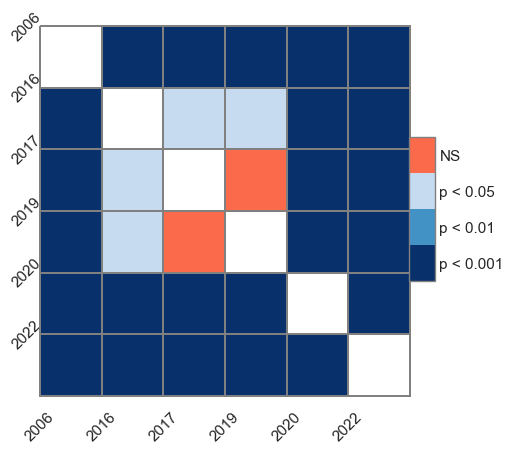

In [48]:
statistical_test(dataframes, 'LCI')

# 54. Enhanced Vegetation Index, EVI
EVI=2.5(NIR-Red)/(NIR+6Red-7.5Green+1)


https://www.semanticscholar.org/reader/46dac4a51258c2ff0461d986666c793c2194e430

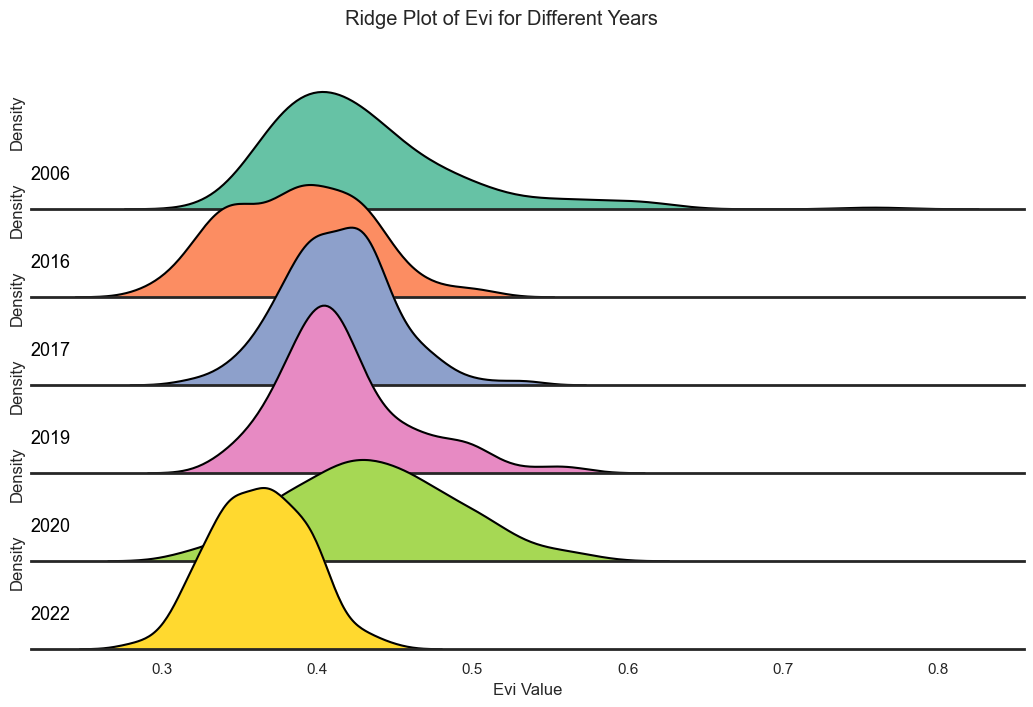

In [49]:
plot_ridge_histograms(dataframes, 'EVI', years)

Kruskal-Wallis Test - Statistic: 233.26855365444771, p-value: 2.1308532439038168e-48
One-way ANOVA - Statistic: 55.02411882039274, p-value: 1.005269905425875e-49
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  3.019198e-10  1.534782e-01  1.430417e-01  5.798661e-02   
2  3.019198e-10  1.000000e+00  2.099758e-06  2.467096e-07  1.561729e-14   
3  1.534782e-01  2.099758e-06  1.000000e+00  9.431385e-01  2.494887e-04   
4  1.430417e-01  2.467096e-07  9.431385e-01  1.000000e+00  2.908406e-04   
5  5.798661e-02  1.561729e-14  2.494887e-04  2.908406e-04  1.000000e+00   
6  1.102358e-29  6.624044e-07  4.641928e-23  5.571416e-28  3.316494e-31   

              6  
1  1.102358e-29  
2  6.624044e-07  
3  4.641928e-23  
4  5.571416e-28  
5  3.316494e-31  
6  1.000000e+00  


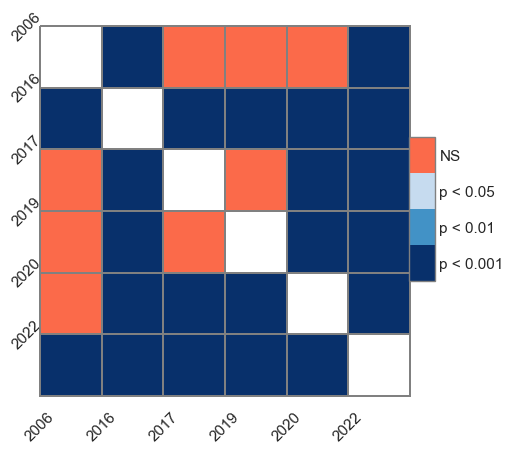

In [50]:
statistical_test(dataframes, 'EVI')

# 55. Modified Enhanced Vegetation Index, MEVI

MEVI= 2.5(NIR-RE)/(NIR+6RE-7.5Green+1)

https://www.semanticscholar.org/reader/46dac4a51258c2ff0461d986666c793c2194e430


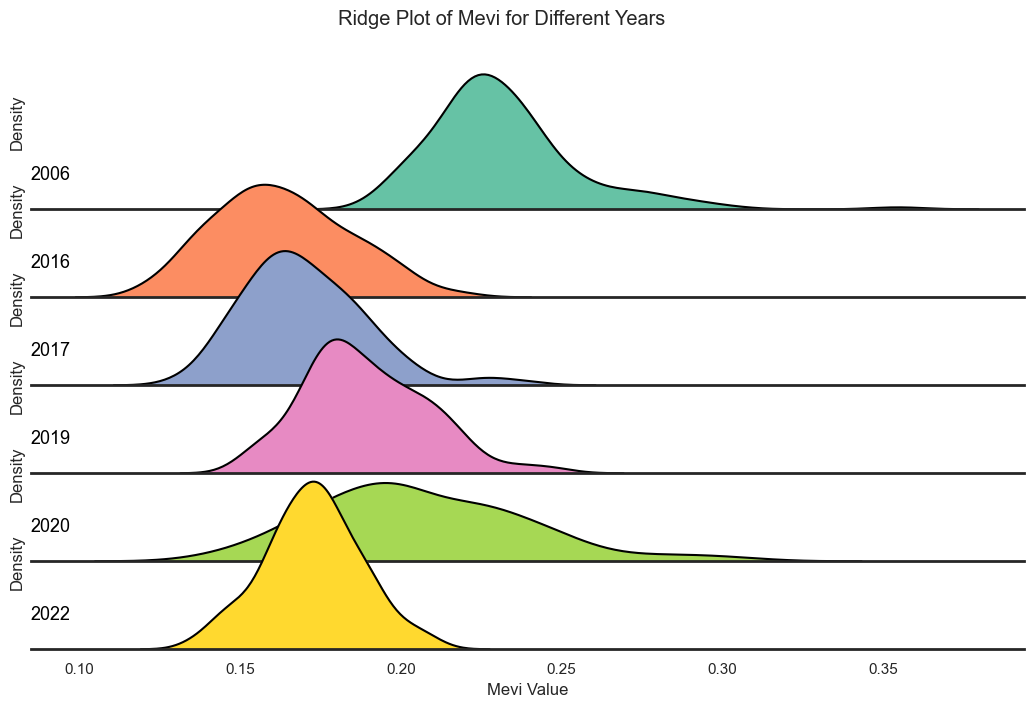

In [51]:
plot_ridge_histograms(dataframes, 'MEVI', years)

Kruskal-Wallis Test - Statistic: 476.05533451427664, p-value: 1.1747257168691775e-100
One-way ANOVA - Statistic: 205.10422833911167, p-value: 2.0700334002577525e-144
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  6.992342e-51  7.151239e-40  1.789663e-40  1.577411e-14   
2  6.992342e-51  1.000000e+00  7.639948e-03  2.278685e-22  3.124273e-30   
3  7.151239e-40  7.639948e-03  1.000000e+00  1.244104e-13  9.914634e-21   
4  1.789663e-40  2.278685e-22  1.244104e-13  1.000000e+00  4.444710e-07   
5  1.577411e-14  3.124273e-30  9.914634e-21  4.444710e-07  1.000000e+00   
6  3.769383e-51  2.864358e-06  6.451644e-02  9.014647e-14  1.008925e-23   

              6  
1  3.769383e-51  
2  2.864358e-06  
3  6.451644e-02  
4  9.014647e-14  
5  1.008925e-23  
6  1.000000e+00  


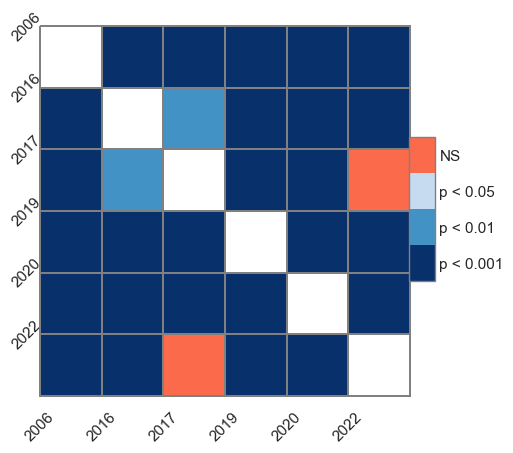

In [52]:
statistical_test(dataframes, 'MEVI')

# 56. Soil Adjusted Red Edge Index,SARE
SARE=(NIR-RE)/(NIR-RE+0.25) +0.25

https://www.semanticscholar.org/reader/46dac4a51258c2ff0461d986666c793c2194e430

Estimation and Validation of RapidEye-Based Time-Series of Leaf Area Index for Winter Wheat in the Rur Catchment (Germany)
DOI: 10.3390/rs70302808

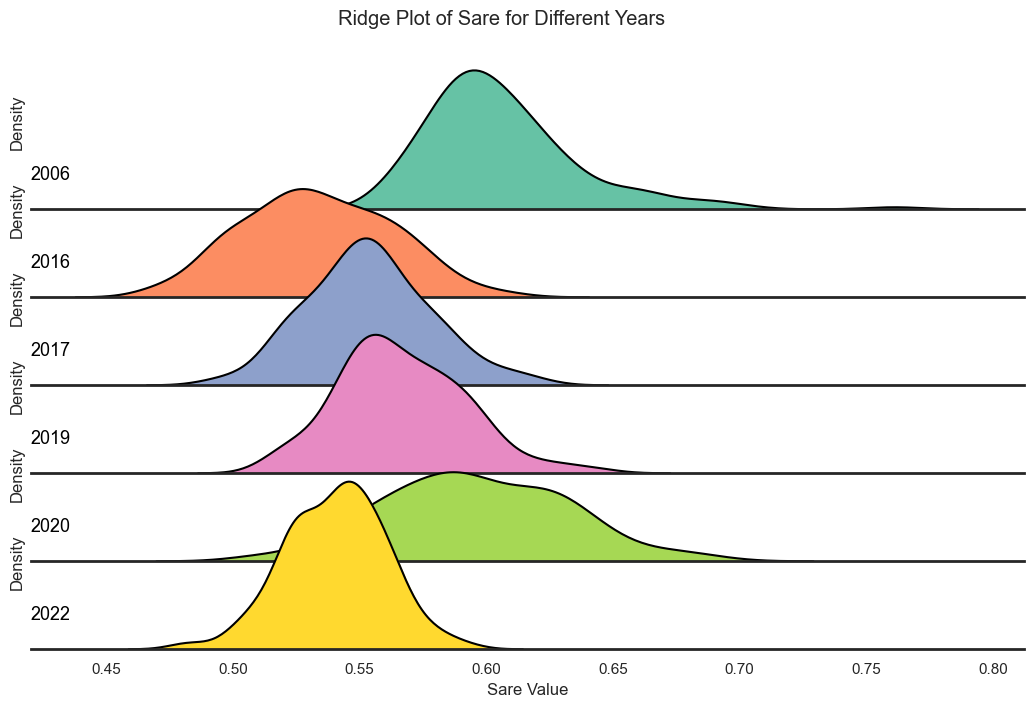

In [67]:
plot_ridge_histograms(dataframes, 'SARE', years)

Kruskal-Wallis Test - Statistic: 460.50056862123483, p-value: 2.667241388392952e-97
One-way ANOVA - Statistic: 169.6795668261191, p-value: 6.162684804688281e-126
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  6.179365e-47  9.718938e-33  3.440783e-28  1.715610e-02   
2  6.179365e-47  1.000000e+00  6.133021e-08  8.203577e-20  1.167247e-35   
3  9.718938e-33  6.133021e-08  1.000000e+00  9.378581e-05  6.020971e-20   
4  3.440783e-28  8.203577e-20  9.378581e-05  1.000000e+00  1.032498e-13   
5  1.715610e-02  1.167247e-35  6.020971e-20  1.032498e-13  1.000000e+00   
6  8.299756e-50  1.423941e-02  1.665679e-05  1.021120e-18  3.062883e-36   

              6  
1  8.299756e-50  
2  1.423941e-02  
3  1.665679e-05  
4  1.021120e-18  
5  3.062883e-36  
6  1.000000e+00  


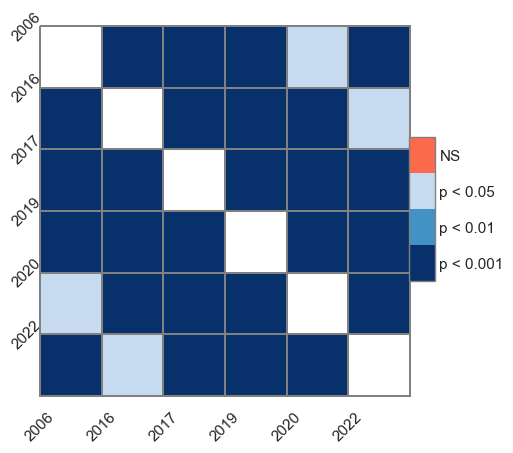

In [54]:
statistical_test(dataframes, 'SARE')

# 57. Red edge Triangular Vegetation Index (Core Only),RTVI_core
RTVI_core=100(NIR-RE)-10(NIR-Green)

https://www.semanticscholar.org/paper/ssessment-of-RapidEye-vegetation-indices-for-of-and-Kross-Mcnairn/cd02a6a0607d0b54061e41aaebf05137458a61d1

assessment of RapidEye vegetation indices for estimation of leaf area index and biomass in corn and soybean crops. Angela Kross, H. Mcnairn, +2 authors Champagne. Published 2014


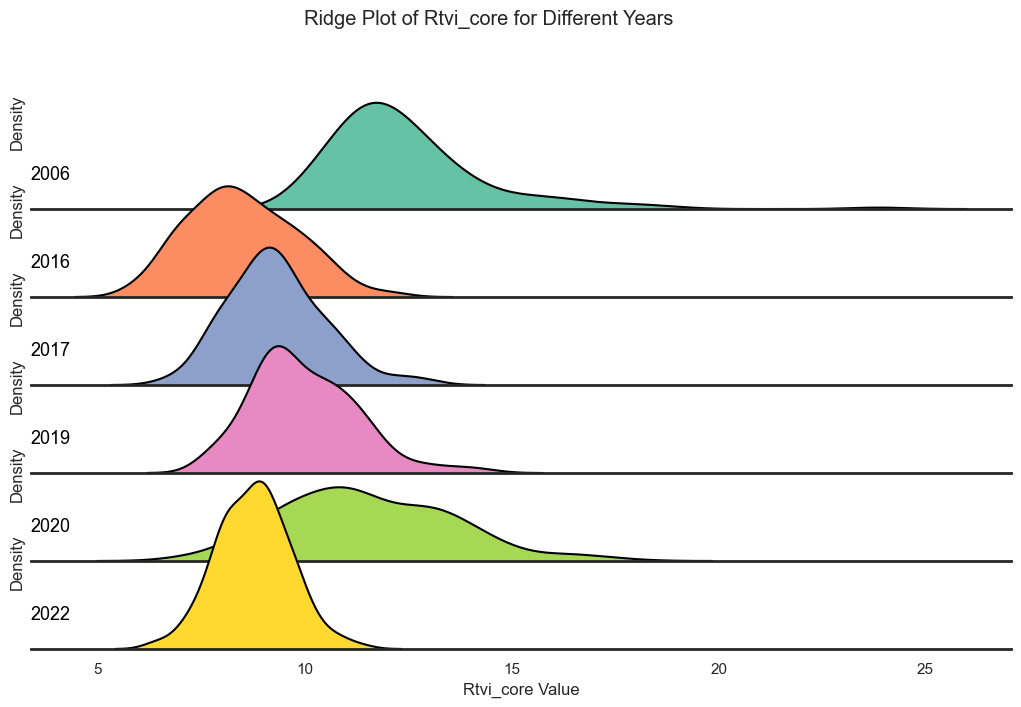

In [55]:
plot_ridge_histograms(dataframes, 'RTVI_core', years)

Kruskal-Wallis Test - Statistic: 467.3083972144177, p-value: 9.063169852846621e-99
One-way ANOVA - Statistic: 168.50886352817193, p-value: 2.704697322277188e-125
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  2.964645e-48  1.367470e-35  9.536422e-33  7.702471e-05   
2  2.964645e-48  1.000000e+00  7.421227e-07  4.259069e-19  3.277195e-34   
3  1.367470e-35  7.421227e-07  1.000000e+00  2.371680e-05  8.336676e-20   
4  9.536422e-33  4.259069e-19  2.371680e-05  1.000000e+00  8.127181e-13   
5  7.702471e-05  3.277195e-34  8.336676e-20  8.127181e-13  1.000000e+00   
6  1.246076e-50  1.566553e-02  1.767970e-04  5.643671e-18  1.004189e-34   

              6  
1  1.246076e-50  
2  1.566553e-02  
3  1.767970e-04  
4  5.643671e-18  
5  1.004189e-34  
6  1.000000e+00  


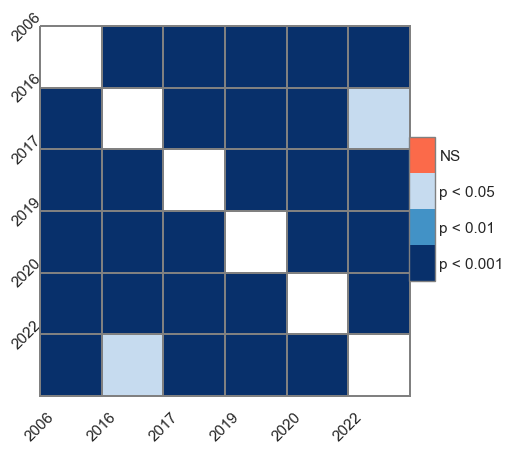

In [56]:
statistical_test(dataframes, 'RTVI_core')

# 58.Red Edge Green Normalized 

REGNDVI=(RE-Green) (RE+Green)

USE OF A MULTISPECTRAL UAV PHOTOGRAMMETRY FOR DETECTION AND TRACKING OF FOREST DISTURBANCE DYNAMICS.R. Minařík, J. Langhammer
Published 23 June 2016 Environmental Science
ISPRS - International Archives of the Photogrammetry, Remote Sensing and Spatial Information Sciences
 
https://www.semanticscholar.org/paper/USE-OF-A-MULTISPECTRAL-UAV-PHOTOGRAMMETRY-FOR-AND-Mina%C5%99%C3%ADk-Langhammer/1c6748fb169ba3e1f8477eaddbde1b90d7768be0

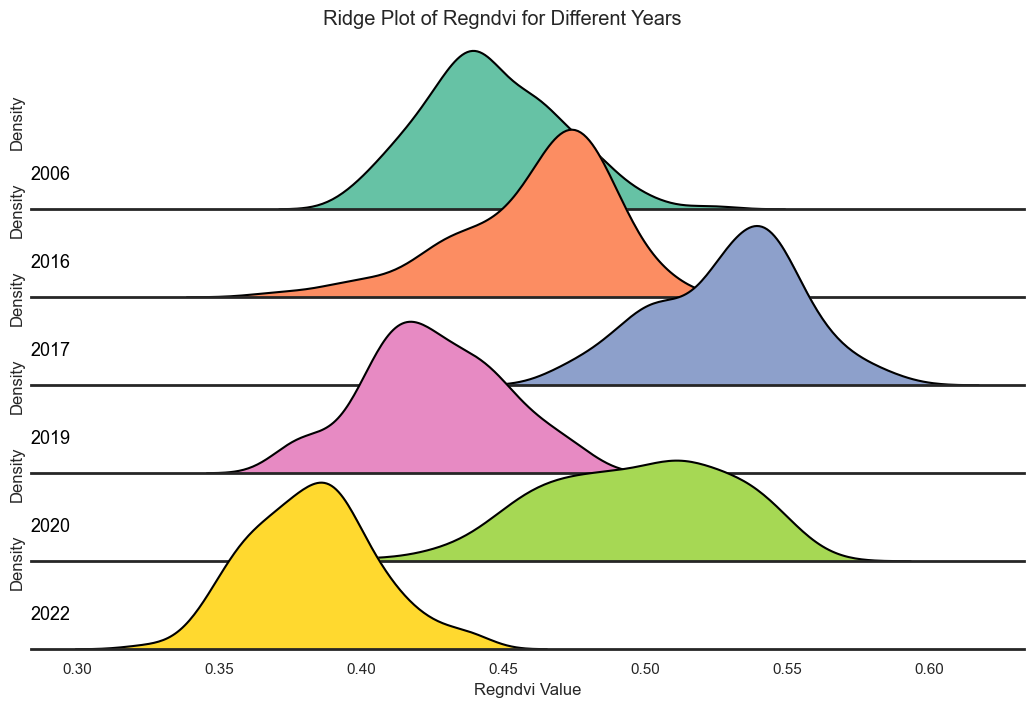

In [57]:
plot_ridge_histograms(dataframes, 'REGNDVI', years)

Kruskal-Wallis Test - Statistic: 654.3948109275793, p-value: 3.552551151976805e-139
One-way ANOVA - Statistic: 527.4930392093959, p-value: 1.8599805699615367e-260
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  4.806061e-09  3.758307e-41  2.668926e-11  1.581575e-32   
2  4.806061e-09  1.000000e+00  1.724438e-38  6.299647e-25  1.977717e-18   
3  3.758307e-41  1.724438e-38  1.000000e+00  1.565461e-42  5.718492e-14   
4  2.668926e-11  6.299647e-25  1.565461e-42  1.000000e+00  6.786444e-44   
5  1.581575e-32  1.977717e-18  5.718492e-14  6.786444e-44  1.000000e+00   
6  5.633317e-47  3.113117e-47  1.057326e-42  8.128831e-34  1.546121e-51   

              6  
1  5.633317e-47  
2  3.113117e-47  
3  1.057326e-42  
4  8.128831e-34  
5  1.546121e-51  
6  1.000000e+00  


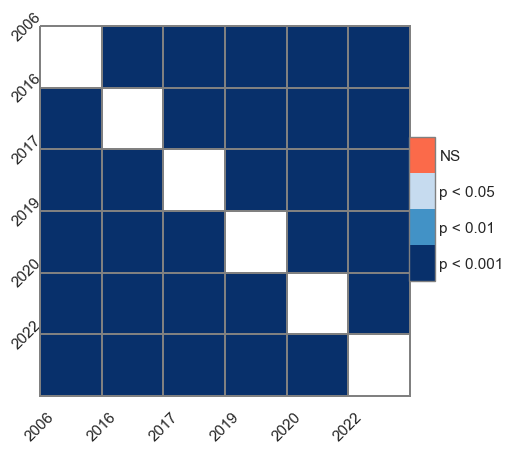

In [58]:
statistical_test(dataframes, 'REGNDVI')

# 59. ARI2=NIR((1/Green) -(1/RE))

https://www.semanticscholar.org/paper/USE-OF-A-MULTISPECTRAL-UAV-PHOTOGRAMMETRY-FOR-AND-Mina%C5%99%C3%ADk-Langhammer/1c6748fb169ba3e1f8477eaddbde1b90d7768be0

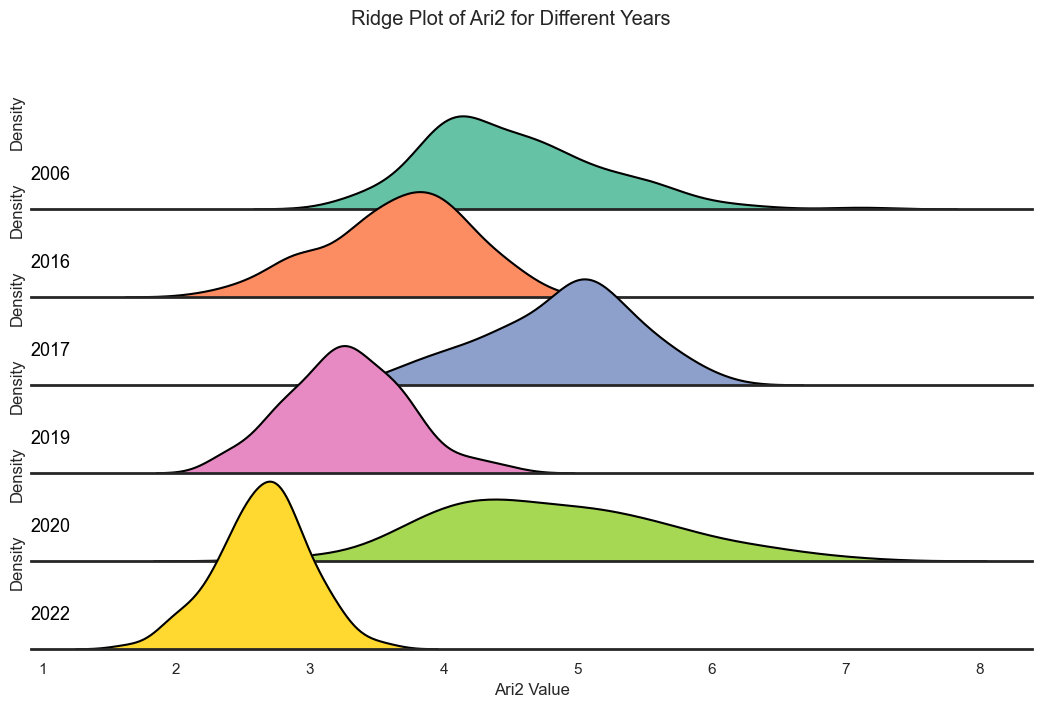

In [59]:
plot_ridge_histograms(dataframes, 'ARI2', years)

Kruskal-Wallis Test - Statistic: 627.8755500546927, p-value: 1.9153988290274656e-133
One-way ANOVA - Statistic: 352.04305576396, p-value: 3.713024533727416e-206
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  5.104260e-27  6.462563e-07  3.375967e-44  1.943923e-03   
2  5.104260e-27  1.000000e+00  4.785757e-34  3.094233e-11  7.883687e-31   
3  6.462563e-07  4.785757e-34  1.000000e+00  1.744650e-40  1.874144e-01   
4  3.375967e-44  3.094233e-11  1.744650e-40  1.000000e+00  8.714383e-44   
5  1.943923e-03  7.883687e-31  1.874144e-01  8.714383e-44  1.000000e+00   
6  6.966614e-52  6.018194e-40  1.082042e-42  2.315159e-29  4.072433e-51   

              6  
1  6.966614e-52  
2  6.018194e-40  
3  1.082042e-42  
4  2.315159e-29  
5  4.072433e-51  
6  1.000000e+00  


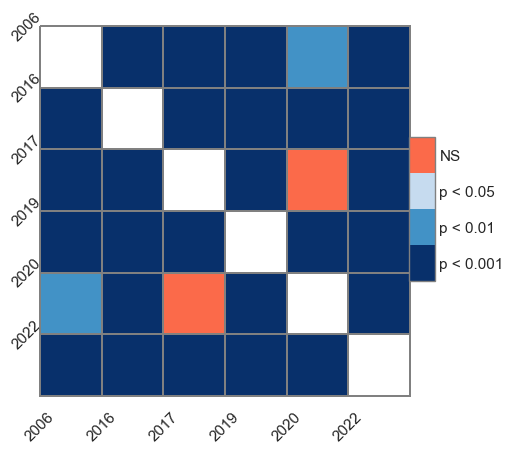

In [60]:
statistical_test(dataframes, 'ARI2')

# 60. ratio MCARI/OSAVI

https://www.semanticscholar.org/paper/Crop-Monitoring-Using-Satellite-UAV-Data-Fusion-and-Maimaitijiang-Sagan/33555487c5b45c1c432b734487a7684cc765ab09

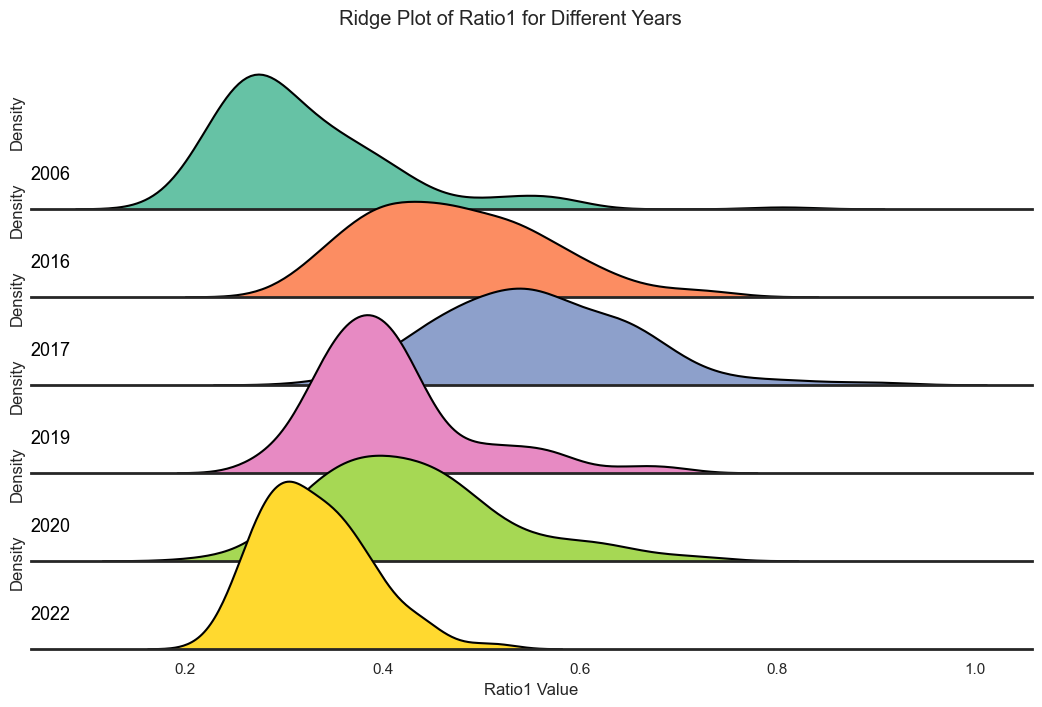

In [61]:
plot_ridge_histograms(dataframes, 'ratio1', years)

Kruskal-Wallis Test - Statistic: 416.591070026142, p-value: 7.868754506499097e-88
One-way ANOVA - Statistic: 138.73638118403696, p-value: 3.504882533715147e-108
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  2.213767e-32  1.519041e-35  4.730230e-21  2.336727e-22   
2  2.213767e-32  1.000000e+00  4.166113e-11  9.931973e-11  1.203033e-05   
3  1.519041e-35  4.166113e-11  1.000000e+00  1.246062e-26  8.595928e-21   
4  4.730230e-21  9.931973e-11  1.246062e-26  1.000000e+00  5.107799e-02   
5  2.336727e-22  1.203033e-05  8.595928e-21  5.107799e-02  1.000000e+00   
6  2.501422e-03  2.325536e-36  3.197965e-40  9.561474e-21  3.041842e-22   

              6  
1  2.501422e-03  
2  2.325536e-36  
3  3.197965e-40  
4  9.561474e-21  
5  3.041842e-22  
6  1.000000e+00  


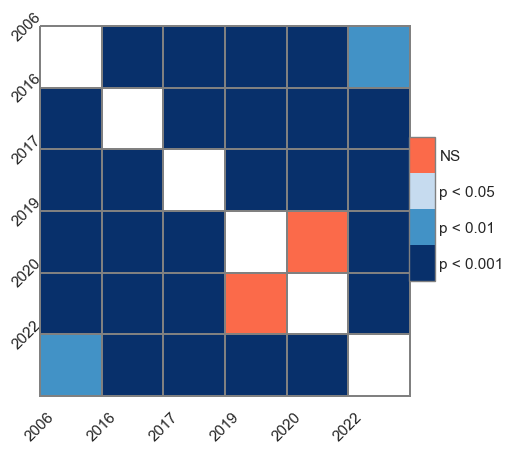

In [62]:
statistical_test(dataframes, 'ratio1')

# 61.ratio TCARI/OSAVI

https://www.semanticscholar.org/paper/Crop-Monitoring-Using-Satellite-UAV-Data-Fusion-and-Maimaitijiang-Sagan/33555487c5b45c1c432b734487a7684cc765ab09

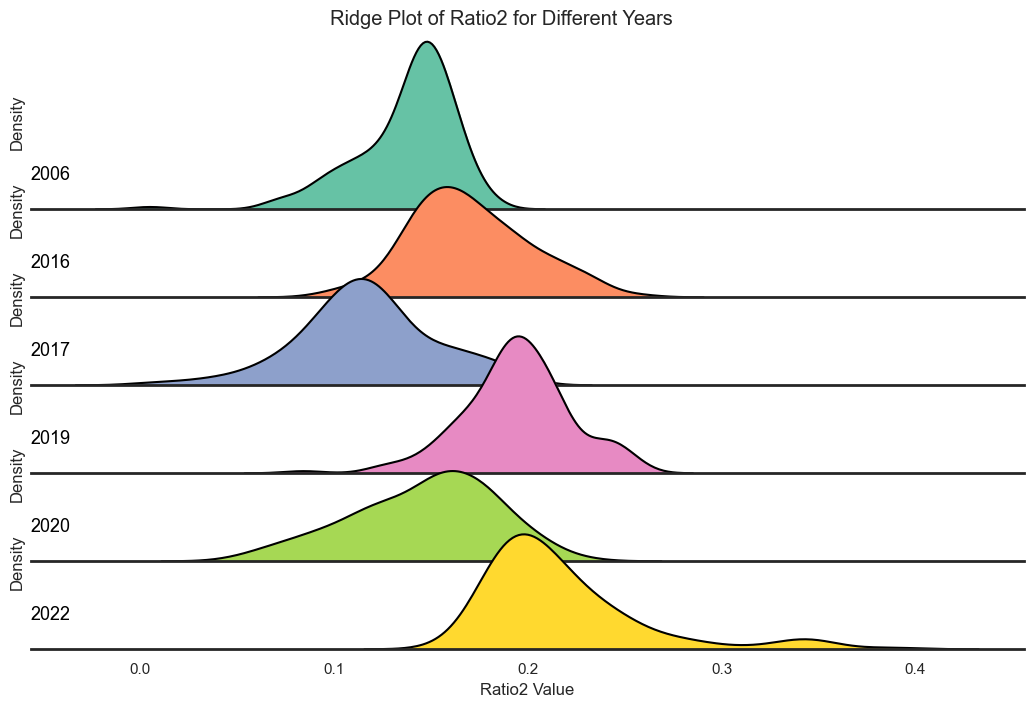

In [63]:
plot_ridge_histograms(dataframes, 'ratio2', years)

Kruskal-Wallis Test - Statistic: 493.9656122199949, p-value: 1.6022452087955237e-104
One-way ANOVA - Statistic: 176.9428879561988, p-value: 7.11867855429657e-130
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  6.602419e-19  4.087161e-08  2.943288e-42  2.544063e-03   
2  6.602419e-19  1.000000e+00  9.783107e-25  9.260180e-13  5.539286e-07   
3  4.087161e-08  9.783107e-25  1.000000e+00  5.639554e-36  1.470379e-09   
4  2.943288e-42  9.260180e-13  5.639554e-36  1.000000e+00  1.193219e-27   
5  2.544063e-03  5.539286e-07  1.470379e-09  1.193219e-27  1.000000e+00   
6  1.576424e-51  4.873124e-26  7.244610e-41  2.559300e-06  1.206111e-40   

              6  
1  1.576424e-51  
2  4.873124e-26  
3  7.244610e-41  
4  2.559300e-06  
5  1.206111e-40  
6  1.000000e+00  


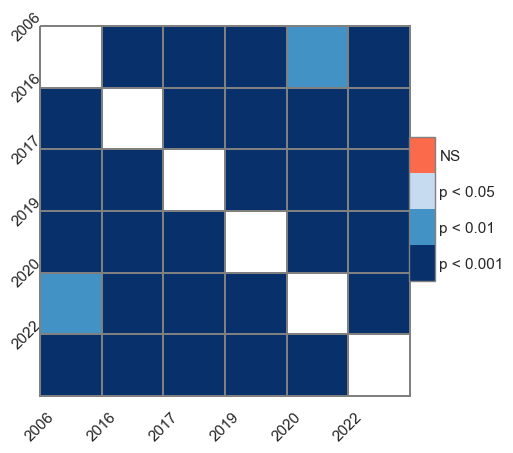

In [64]:
statistical_test(dataframes, 'ratio2')

# 62.GDVI_sq= (NIR^2-R^2)/(NIR^2+R^2)

Application of remote sensing technology to estimate productivity and assess phylogenetic heritability. 
DOI: 10.1002/aps3.11401


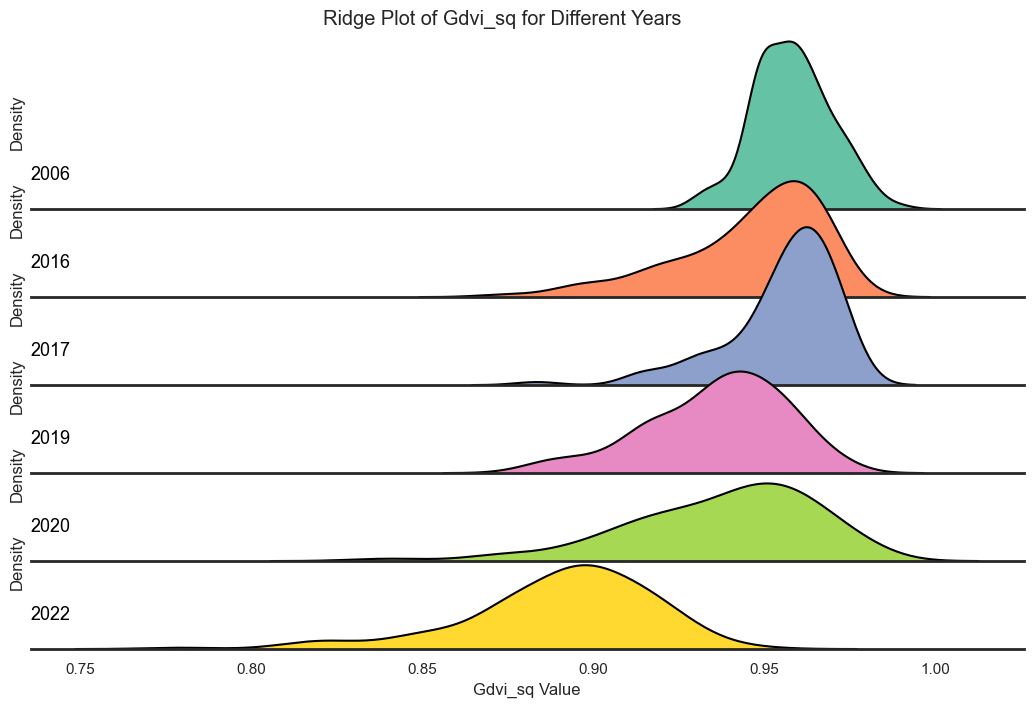

In [65]:
plot_ridge_histograms(dataframes, 'GDVI_sq', years)

Kruskal-Wallis Test - Statistic: 407.5928316081322, p-value: 6.850028669321663e-86
One-way ANOVA - Statistic: 194.51053192708005, p-value: 4.510836575731306e-139
posthoc_mannwhitney test:              1             2             3             4             5  \
1  1.000000e+00  3.204139e-06  9.351277e-01  3.159418e-24  1.392875e-13   
2  3.204139e-06  1.000000e+00  1.269572e-04  9.136892e-07  3.743030e-03   
3  9.351277e-01  1.269572e-04  1.000000e+00  8.765036e-16  3.027463e-09   
4  3.159418e-24  9.136892e-07  8.765036e-16  1.000000e+00  1.973127e-01   
5  1.392875e-13  3.743030e-03  3.027463e-09  1.973127e-01  1.000000e+00   
6  9.149084e-52  1.244643e-42  3.127106e-40  9.869667e-38  1.257877e-33   

              6  
1  9.149084e-52  
2  1.244643e-42  
3  3.127106e-40  
4  9.869667e-38  
5  1.257877e-33  
6  1.000000e+00  


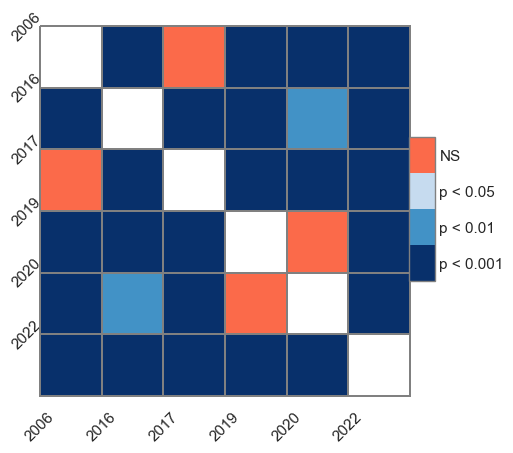

In [66]:
statistical_test(dataframes, 'GDVI_sq')

# Variogram DVI

In [69]:
# Calculation variogram :mean_Green, mean_Red; mean_RedEdge ;mean_NIR
#2006_burnplot18
V = skg.Variogram(coordinates=df1[['x', 'y']].values, values=df1['DVI'].values)
print(V)


spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   6.25
Sill:              0.00
Nugget:            0.00
        


C:\Users\mc5545\.conda\envs\ag_env\lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

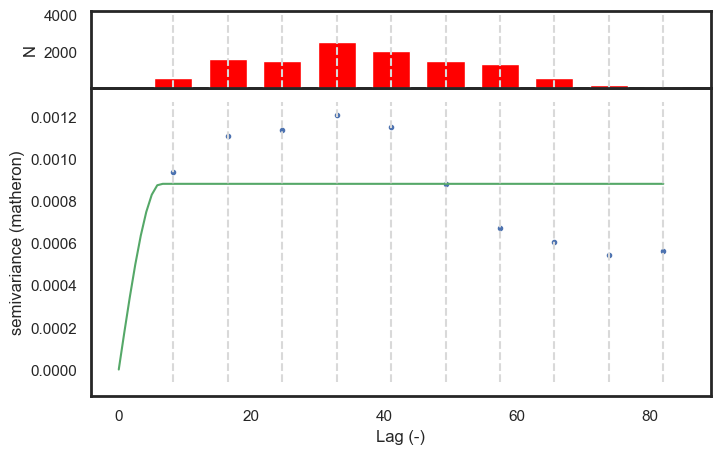

In [70]:
# Variogram visualization
V.plot()
plt.close

In [71]:
# Calculation variogram :mean_Green, mean_Red; mean_RedEdge ;mean_NIR
#2006_burnplot18
V = skg.Variogram(coordinates=df2[['x', 'y']].values, values=df2['DVI'].values)
print(V)


spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   68.86
Sill:              0.00
Nugget:            0.00
        


C:\Users\mc5545\.conda\envs\ag_env\lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

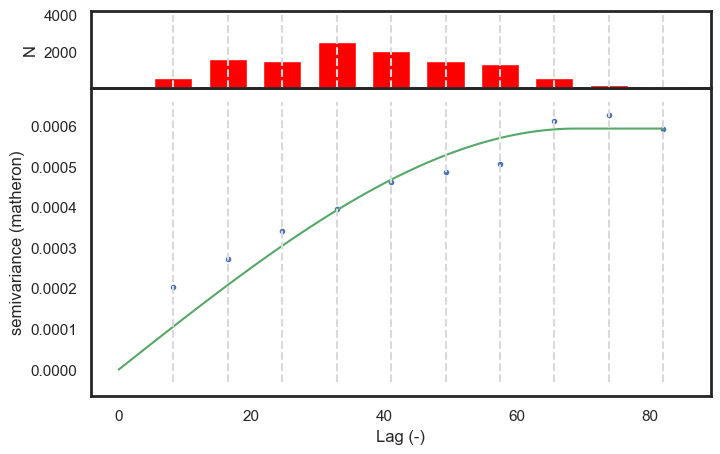

In [72]:
# Variogram visualization
V.plot()
plt.close

In [74]:
# Calculation variogram :mean_Green, mean_Red; mean_RedEdge ;mean_NIR
#2006_burnplot18
V = skg.Variogram(coordinates=df3[['x', 'y']].values, values=df3['DVI'].values)
print(V)


spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   89.02
Sill:              0.00
Nugget:            0.00
        


C:\Users\mc5545\.conda\envs\ag_env\lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

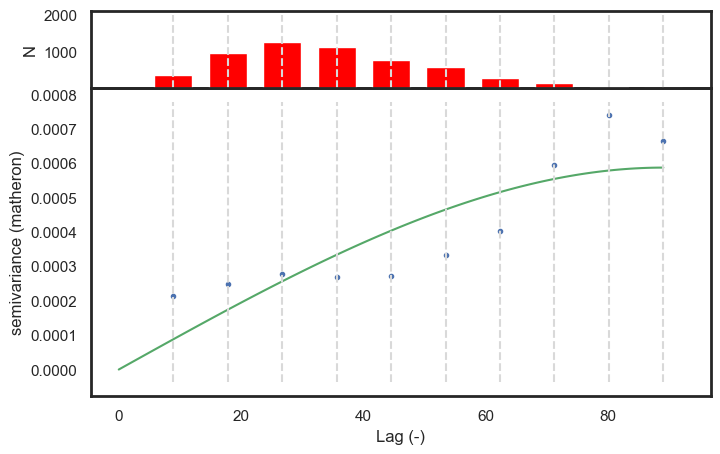

In [75]:
# Variogram visualization
V.plot()
plt.close

In [76]:
# Calculation variogram :mean_Green, mean_Red; mean_RedEdge ;mean_NIR
#2006_burnplot18
V = skg.Variogram(coordinates=df4[['x', 'y']].values, values=df4['DVI'].values)
print(V)


spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   41.69
Sill:              0.00
Nugget:            0.00
        


C:\Users\mc5545\.conda\envs\ag_env\lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

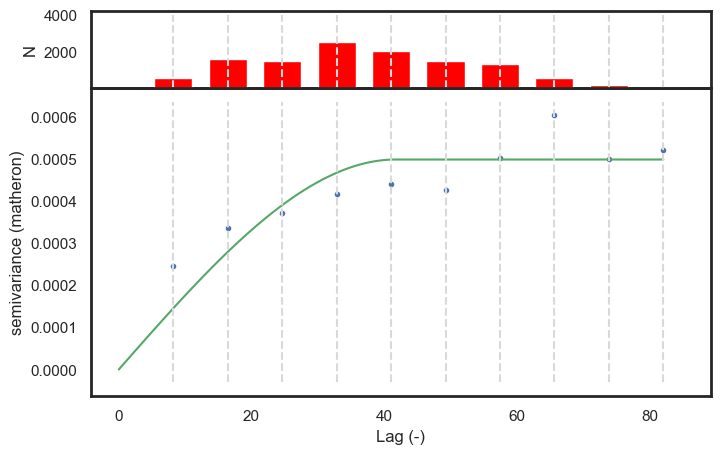

In [77]:
# Variogram visualization
V.plot()
plt.close

In [78]:
# Calculation variogram :mean_Green, mean_Red; mean_RedEdge ;mean_NIR
#2006_burnplot18
V = skg.Variogram(coordinates=df5[['x', 'y']].values, values=df5['DVI'].values)
print(V)


spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   28.37
Sill:              0.00
Nugget:            0.00
        


C:\Users\mc5545\.conda\envs\ag_env\lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

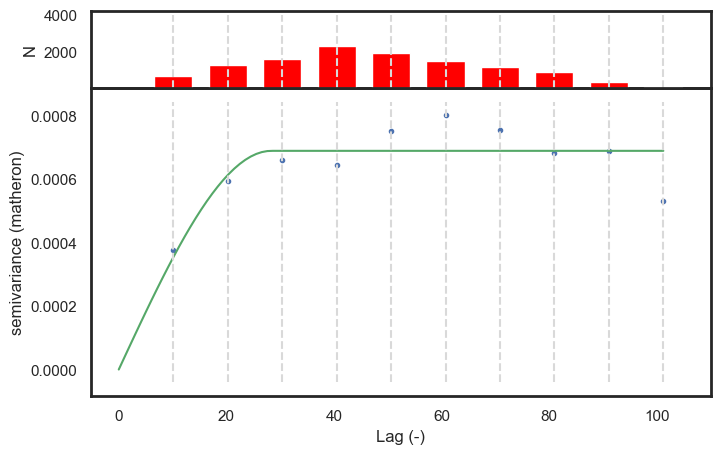

In [79]:
# Variogram visualization
V.plot()
plt.close

In [80]:
# Calculation variogram :mean_Green, mean_Red; mean_RedEdge ;mean_NIR
#2006_burnplot18
V = skg.Variogram(coordinates=df6[['x', 'y']].values, values=df6['DVI'].values)
print(V)


spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   48.35
Sill:              0.00
Nugget:            0.00
        


C:\Users\mc5545\.conda\envs\ag_env\lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

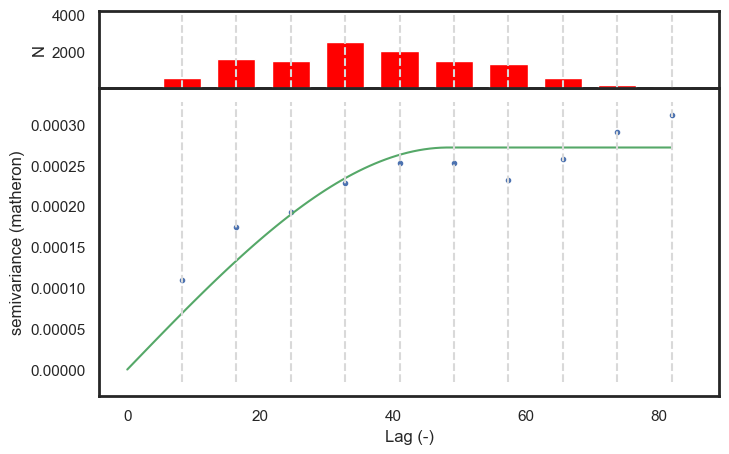

In [81]:
# Variogram visualization
V.plot()
plt.close